# *The Road to Net Zero: Analyzing Australia’s Energy Transition & Emissions Pathway (1990-2023)*

# Objective

This study aims to assess whether Australia is on track to meet its **2050 net zero emission target**
by analyzing historical trends in:
* greenhouse gas emissions
* energy generation
* economic growth
  
In doing so, the topics of decoupling between emissions and GDP, the effectiveness of renewable energy adoption, and policy impacts will be explored using data between the years of 1990-2023

## Research Questions

1.	Emissions Trajectory
    * How have Australia’s total and sectoral greenhouse gas emissions changed since 1990?
      <br>
2.	Energy Transition Progress
    * How has Australia’s electricity generation mix evolved, and what is the share of renewables today?
<br>
3.	Economic Growth vs. Emissions
    * Is there evidence of decoupling between economic growth and emissions?
<br>
4.	Policy Effectiveness
   *  What impact have key policies had on emissions, energy investment, and renewables uptake?
<br>
5.  Net Zero Alignment
    * Based on current trends, is Australia on track to meet its 2050 net zero target?


## Data Sources

### Datasets

The following datasets were downloaded, preprocessed and renamed before being imported into this notebook.

- Carbon Emissions (historical/projections):
  *Australia’s Emissions Projections 2024* <br>
  Source: Department of Climate Change, Energy, the Environment and Water (DCCEEW)<br>
  File(s): `australias-emissions-projections-2024-chart-data` <br> 
  URL: https://www.dcceew.gov.au/climate-change/publications/australias-emissions-projections-2024<br>
  cleaned dataset: `emissions_1990_2023.csv`

- Electricity Generation Mix:<br>
  *Australian Energy Statistics 2024 machines readable files*<br>
  File(s): `AES 2024 Table O FY - machine-readable` <br>
  URL: https://www.energy.gov.au/publications/australian-energy-statistics-2024-machine-readable-files<br>
  cleaned dataset: `energy_mix_1990_2023.csv`

- Population & GDP (context):<br>
  *Australian Energy Update 2024*<br> 
  File(s): `australian_energy_statistics_2024_table_b`<br>
  URL: https://www.energy.gov.au/publications/australian-energy-update-2024<br>
  cleaned dataset: `economics_1990_2023.csv`
  
- Policies:<br>
 Source: Analyst-compiled<br>
 File(s):`policies_1990_2023.xlsx`, `renewable_policies.xlsx`

### Emissions Budget and Target Pathway Method
- 2013 to 2050 budget: <br>
  Climate Change Authority (CCA), *Targets and Progress Review* (2014), Chapter 8<br>
  budget: **10.1 Gt CO₂-e**
  URL: https://unfccc.int/sites/default/files/NDC/2022-06/Australias%20NDC%20June%202022%20Update%20%283%29.pdf
  
- 2021-2030 NDC Budget & trajectory method:<br>
  *Australia’s Nationally Determined Contribution (2022 Update)*<br>
  Budget: **4,381 Mt CO₂-e** (Table 1.1.2)<br>
  Method: Straight-line trajectory from the 2020 target to the 2030 target (Table 1.4.7)
  URL: https://www.climatechangeauthority.gov.au/sites/default/files/Targets%20and%20Progress%20Review%20Final%20Report_Chapter%208.pdf

### License
All data and sources used were released under [**CC BY 4.0**](https://creativecommons.org/licenses/by/4.0/)

## Data Dictionary

- **Population**- Australian population measured on the 30th June each year
- **GDP**- Gross Domestic Product given in chain volume measures- \$ million
- **Energy consumption**- Measure of the amount of energy used by the Australian economy- PJ
- **Energy Consumption Per Capita**- Amount of energy used per person in Australia- GJ/person
- **Energy Intensity**- Amount of energy used to produce a unit of economic output-GJ/\$ million
- **Energy productivity**- Relationship between energy use and economic output- $ million/PJ
- **Electricity**- Annual emissions from the electricity sector- MtCO2-e
- **Agriculture**- Annual emissions from the agriculture sector- MtCO2-e
- **Stationary Energy**- Annual emissions from the stationary energy sector- MtCO2-e
- **Transport**- Annual emissions from the transport sector- MtCO2-e
- **Fugitives**- Annual emissions from the fugitives sector- MtCO2-e
- **Industrial Processes**- Annual emissions from the industrial processes sector- MtCO2-e
- **Waste**- Annual emissions from the waste sector- MtCO2-e
- **LULUCF**- Annual emissions from the lulucf sector- MtCO2-e
- **Total Emissions**- Total annual emissions from all sectors- MtCO2-e
- **Biomass (Bagasse, Wood)**- Electricity generation from biomass (bagasse, wood) each financial year- GWh
- **Biogas**- Electricity generation from biogas each financial year- GWh
- **Black Coal**- Electricity generation from black coal each financial year- GWh
- **Brown Coal**- Electricity generation from brown coal each financial year- GWh
- **Geothermal**- Electricity generation from geothermal each financial year- GWh
- **Hydro**- Electricity generation from hyropower each financial year- GWh
- **Large-scale Solar PV**- Electricity generation from large-scale solar each financial year- GWh
- **Natural Gas**- Electricity generation from natural gas each financial year- GWh
- **Oil Products**- Electricity generation from oil products each financial year- GWh
- **Other**- Electricity generation from other sources each financial year- GWh
- **Small-scale solar PV**- Electricity generation from small-scale solar each financial year- GWh
- **Wind**- Electricity generation from wind each financial year- GWh
- **Total Renewable**- Total electricity generation from renewable sources each financial year- GWh
- **Total Non-Renewable**- Total electricity generation from non-renewable sources each financial year- GWh
- **Total Electricity**- Total electricity generation by Australia each financial year- GWh


# Data Analysis

## Importing Modules

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
import df2img

## Importing Datasets

In [12]:
emissions = pd.read_csv("data/emissions_1990_2023.csv", index_col = "Year")

emissions.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF,Total Emissions
Year,,,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46,178.27,619.18
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38,157.77,598.93
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12,113.48,558.42
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93,92.16,537.24
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16,81.79,527.12


In [13]:
economics = pd.read_csv("data/economics_1990_2023.csv", index_col = "Year")

economics.head()

,Population,GDP,Energy Consumption,Energy Consumption Per Capita,Energy Intensity,Energy Productivity
Year,,,,,,
1990,17065128,925958,3945.9,231.226,4261.424,234.663
1991,17284036,922422,3949.9,228.529,4282.096,233.530
1992,17478635,926367,3982.7,227.861,4299.268,232.598
1993,17634808,963840,4081.8,231.463,4234.935,236.131
1994,17805468,1002198,4181.9,234.866,4172.728,239.651


In [14]:
energy_mix_df = pd.read_csv("data/energy_mix_1990_2023.csv", index_col = "Year")

energy_mix_df.head()

,"Biomass (Bagasse, Wood)",Biogas,Black Coal,Brown Coal,Geothermal,Hydro,Large-scale Solar PV,Natural Gas,Oil Products,Other,Small-scale solar PV,Wind,Total Renewable,Total Non-Renewable,Total Electricity
Year,,,,,,,,,,,,,,,
1990,750.0,0.0,87573.0,33594.0,0.0,14880.0,0.0,14359.0,3552.0,0.0,0.0,0.0,15630.0,139078.0,154708.0
1991,769.0,0.0,89511.0,36048.0,0.0,16103.0,0.0,10772.0,3396.0,0.0,0.0,0.0,16872.0,139727.0,156599.0
1992,670.0,0.0,94325.1,34559.0,0.0,15768.0,0.0,11633.0,2362.0,0.0,10.9,0.0,16448.9,142879.1,159328.0
1993,670.0,0.0,97872.7,33248.0,0.0,16953.0,0.0,12295.0,2421.0,0.0,13.3,0.0,17636.3,145836.7,163473.0
1994,670.0,0.0,100544.1,34890.0,0.0,16649.0,0.0,12199.0,2320.0,0.0,15.9,4.0,17338.9,149953.1,167292.0


In [15]:
aus_policies = pd.read_excel("data/policies.xlsx")

aus_policies.head()

,Year,Policy,Abbreviation,Scope
0,1992,National Greenhouse Response Strategy (NGRS),NGRS,Domestic
1,1997,Kyoto Protocol (KP) Signed,KP Signed,International
2,2001,Mandatory Renewable Energy Target (MRET),MRET,Domestic
3,2004,White Paper on Energy (WP EP),WP EP,Domestic
4,2007,KP Ratified,KP Ratified,International


In [16]:
renewable_policies = pd.read_excel("data/renewable_policies.xlsx")

r_year = renewable_policies["Year"]
r_policy = renewable_policies["Policy"]

renewable_policies.head()

,Year,Policy,Abbreviation
0,2001,MRET,MRET
1,2009,RET including Solar Credits Scheme,RET including Solar Credits Scheme
2,2012,ARENA and CEFC Established,ARENA & CEFC
3,2016,Paris Agreement,CMA
4,2020,Technology Investment Roadmap,LETS


## Summary Statistics

### Emissions DataFrame

In [19]:
display(emissions.info())
display(emissions.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Electricity           34 non-null     float64
 1   Agriculture           34 non-null     float64
 2   Stationary Energy     34 non-null     float64
 3   Transport             34 non-null     float64
 4   Fugitives             34 non-null     float64
 5   Industrial Processes  34 non-null     float64
 6   Waste                 34 non-null     float64
 7   LULUCF                34 non-null     float64
 8   Total Emissions       34 non-null     float64
dtypes: float64(9)
memory usage: 2.7 KB


None

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF,Total Emissions
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,174.863529,86.067647,83.037941,82.060000,44.900294,29.144412,16.938235,35.038529,552.050588
std,24.627053,4.231973,11.309904,12.363821,4.553067,3.343912,3.548409,69.208032,55.392424
min,129.530000,77.370000,66.170000,60.800000,38.250000,24.310000,12.710000,-88.530000,438.400000
25%,154.197500,83.265000,73.627500,71.807500,41.127500,25.545000,13.612500,-6.222500,515.167500
50%,181.980000,85.550000,82.080000,84.200000,43.980000,30.305000,15.955000,56.485000,555.360000
75%,194.822500,88.707500,92.610000,92.765000,47.520000,31.897500,19.180000,78.737500,594.890000
max,211.630000,94.960000,102.310000,100.200000,56.220000,34.260000,23.460000,178.270000,649.790000


### Economics DataFrame

In [21]:
display(economics.info())
display(economics.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Population                     34 non-null     int64  
 1   GDP                            34 non-null     int64  
 2   Energy Consumption             34 non-null     float64
 3   Energy Consumption Per Capita  34 non-null     float64
 4   Energy Intensity               34 non-null     float64
 5   Energy Productivity            34 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 1.9 KB


None

,Population,GDP,Energy Consumption,Energy Consumption Per Capita,Energy Intensity,Energy Productivity
count,3.400000e+01,3.400000e+01,34.000000,34.000000,34.000000,34.000000
mean,2.122952e+07,1.591162e+06,5301.674235,250.084941,3493.848588,294.410735
std,2.971995e+06,4.632521e+05,730.163269,15.643921,575.178608,51.922377
min,1.706513e+07,9.224220e+05,3945.900000,220.647000,2447.234000,232.598000
25%,1.865875e+07,1.190839e+06,4804.375000,236.763750,2979.185000,247.837750
50%,2.063929e+07,1.580119e+06,5635.366500,250.188000,3566.603000,280.381000
75%,2.373092e+07,1.977710e+06,5886.871750,261.395750,4035.448500,335.681000
max,2.665895e+07,2.403614e+06,6188.282000,274.827000,4299.268000,408.625000


### Energy Mix DataFrame

In [23]:
display(energy_mix_df.info())
display(energy_mix_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 1990 to 2023
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Biomass (Bagasse, Wood)  34 non-null     float64
 1   Biogas                   34 non-null     float64
 2   Black Coal               34 non-null     float64
 3   Brown Coal               34 non-null     float64
 4   Geothermal               34 non-null     float64
 5   Hydro                    34 non-null     float64
 6   Large-scale Solar PV     34 non-null     float64
 7   Natural Gas              34 non-null     float64
 8   Oil Products             34 non-null     float64
 9   Other                    34 non-null     float64
 10  Small-scale solar PV     34 non-null     float64
 11  Wind                     34 non-null     float64
 12  Total Renewable          34 non-null     float64
 13  Total Non-Renewable      34 non-null     float64
 14  Total Electricity        34 

None

,"Biomass (Bagasse, Wood)",Biogas,Black Coal,Brown Coal,Geothermal,Hydro,Large-scale Solar PV,Natural Gas,Oil Products,Other,Small-scale solar PV,Wind,Total Renewable,Total Non-Renewable,Total Electricity
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,1567.227676,754.747029,113376.727735,45149.803441,0.200500,15772.805971,1512.630588,32847.952353,3395.889647,151.329412,3910.658941,6621.130265,30139.400971,194921.702588,225061.103559
std,924.871806,536.483815,12312.385543,9193.488765,0.248719,1457.361631,3882.915205,16854.124358,1348.430814,441.456671,6812.146779,8974.980126,20117.671846,28555.120830,37753.922947
min,633.000000,0.000000,87573.000000,31459.126000,0.000000,11869.400000,0.000000,10772.000000,1388.700000,0.000000,0.000000,0.000000,15630.000000,139078.000000,154708.000000
25%,671.000000,284.500000,106130.053500,35125.500000,0.000000,15229.311000,0.000000,15185.000000,2376.750000,0.000000,34.550000,13.000000,17667.650000,179108.779500,197316.000000
50%,1647.013000,749.150000,115975.450000,47094.050000,0.000000,16041.600000,0.000000,31789.950000,3075.900000,0.000000,97.500000,2162.100000,20137.400000,206622.850000,237990.950000
75%,2127.549500,1287.063250,121562.542500,54508.550000,0.500000,16661.790500,92.835250,49657.253750,4623.712750,0.000000,5159.654000,11162.848500,35950.426250,217275.108750,252008.534000
max,3737.000000,1445.903000,134264.000000,56981.400000,0.600000,18420.900000,16059.820000,55216.284000,6828.450000,1817.000000,25908.682000,31384.874000,93112.224000,227487.400000,274474.842000


## Defining Colour Palettes

In [25]:
emission_colours_dict = {
    "Electricity": "#636363",
    "Stationary Energy": "#1f77b4",
    "Transport": "#e6550d",
    "Fugitives": "#66c2a5",
    "Agriculture": "#228b22",
    "Industrial Processes": "#9e9ac8",
    "Waste": "#ffcc00",
    "LULUCF": "#a50f15"
}

gen_colours_dict = {
    "Coal": "#333333",
    "Natural Gas": "#1f78b4",
    "Oil Products": "#bf812d",
    "Hydro": "#1c9099",
    "Wind": "#a6d854",
    "Solar": "#fdb462",
    "Bioenergy": "#bebada",
    "Geothermal": "#e41a1c",
    "Other": "#cccccc"
}

colours_dict2 = {"Total Renewable":"#228B22",
    "Total Non-Renewable":"#4C4C4C",
                }

colours_dict3 = {"Renewable_Share":"#228B22",
    "Fossil_Fuel_Share":"#4C4C4C",                
                }


## Policy Timeline

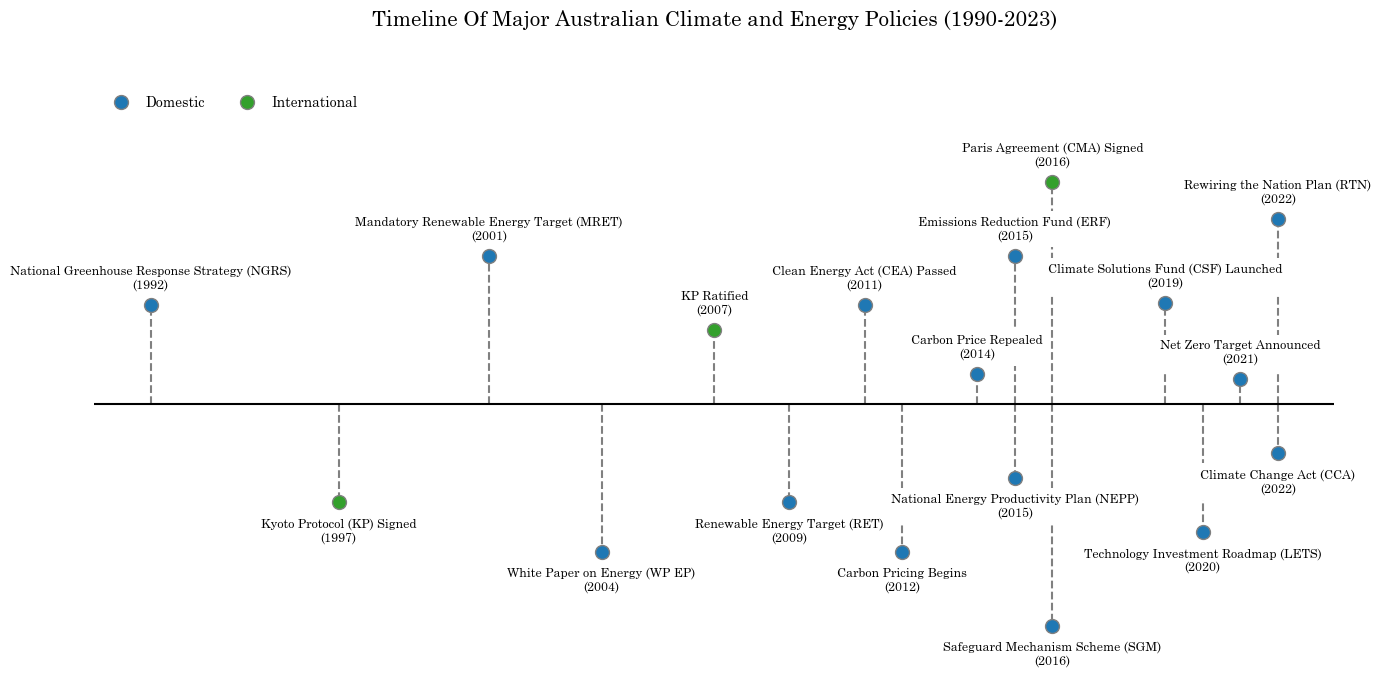

In [27]:
# Create a timeline of Australia's climate aligned policies between 1990-2023

plt.rcParams["font.family"] = "century schoolbook"

policy_years = aus_policies["Year"]
stem_heights = [0.4, -0.4, 0.6,-0.6, 0.3,-0.4,0.4,-0.6,0.12,-0.3,0.6,0.9,-0.9 ,0.41,-0.52, 0.1, -0.2,0.75]
policy = aus_policies["Policy"]
scope = aus_policies["Scope"]

# Create figure
fig, ax = plt.subplots(figsize = (16,8))

# Plot stem plot
for policy_years, stem_heights, policy, scope in zip(policy_years, stem_heights, policy, scope):
    markerline, stemlines, baseline = plt.stem(policy_years, stem_heights, linefmt = "grey", basefmt = "k")
    markerline.set_markersize(10)
    plt.setp(stemlines, linestyle = "--")
    if scope == "International":
        markerline.set_markerfacecolor("#33a02c")
    elif scope =="Domestic":
        markerline.set_markerfacecolor("#1f78b4")
# Annotate
    if stem_heights > 0:
        plt.annotate(f"{policy}\n({policy_years})", xy = (policy_years,stem_heights), xytext = (0,12), textcoords = "offset points", ha = "center", fontsize = 9, 
                    bbox= dict(alpha = 1, 
                               fc = "white", 
                               ec = "None"
                              ) )
    else :
        plt.annotate(f"{policy}\n({policy_years})", xy = (policy_years,stem_heights), xytext = (0,-28), textcoords = "offset points", ha = "center", fontsize = 9,
                      bbox= dict(alpha = 1, 
                               fc = "white", 
                               ec = "None"
                              ))
# Format
ax.set_title("Timeline Of Major Australian Climate and Energy Policies (1990-2023)", fontsize = 15)
ax.axhline(0, c = "black")
ax.set_ylim(-1, 1.5)
ax.set_yticks([])
ax.set_xticks([])
ax.axis("Off")


legend_elements = [plt.Line2D([0],[0], marker= "o", c = "white",mfc = "#1f78b4",mec = "grey", markersize = 10,label = "Domestic"),
                   plt.Line2D([0],[0], marker= "o", c = "white",mfc = "#33a02c",mec = "grey", markersize = 10, label = "International"),
                  ]

ax.legend(handles= legend_elements, loc = "upper left", ncols = 2, bbox_to_anchor = (0,.92),frameon = False)

plt.savefig("imgs/policies_timeline.png", bbox_inches ="tight")

## Emissions Trajectory

How have Australia’s total and sectoral greenhouse gas emissions changed since 1990?

In [29]:
emissions.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF,Total Emissions
Year,,,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46,178.27,619.18
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38,157.77,598.93
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12,113.48,558.42
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93,92.16,537.24
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16,81.79,527.12


In [30]:
# Create grouped DataFrame to handle duplicate policy dates

aus_policies_grouped = aus_policies.groupby(["Year"], as_index = False).agg({"Policy":" & ".join, "Abbreviation":" & ".join})

aus_policies_grouped

,Year,Policy,Abbreviation
0,1992,National Greenhouse Response Strategy (NGRS),NGRS
1,1997,Kyoto Protocol (KP) Signed,KP Signed
2,2001,Mandatory Renewable Energy Target (MRET),MRET
3,2004,White Paper on Energy (WP EP),WP EP
4,2007,KP Ratified,KP Ratified
5,2009,Renewable Energy Target (RET),RET
6,2011,Clean Energy Act (CEA) Passed,CEA
7,2012,Carbon Pricing Begins,Carbon Pricing
8,2014,Carbon Price Repealed,Carbon Pricing Repealed
9,2015,National Energy Productivity Plan (NEPP) & Emi...,NEPP & ERF


### Historical Greenhouse Gas Emissions

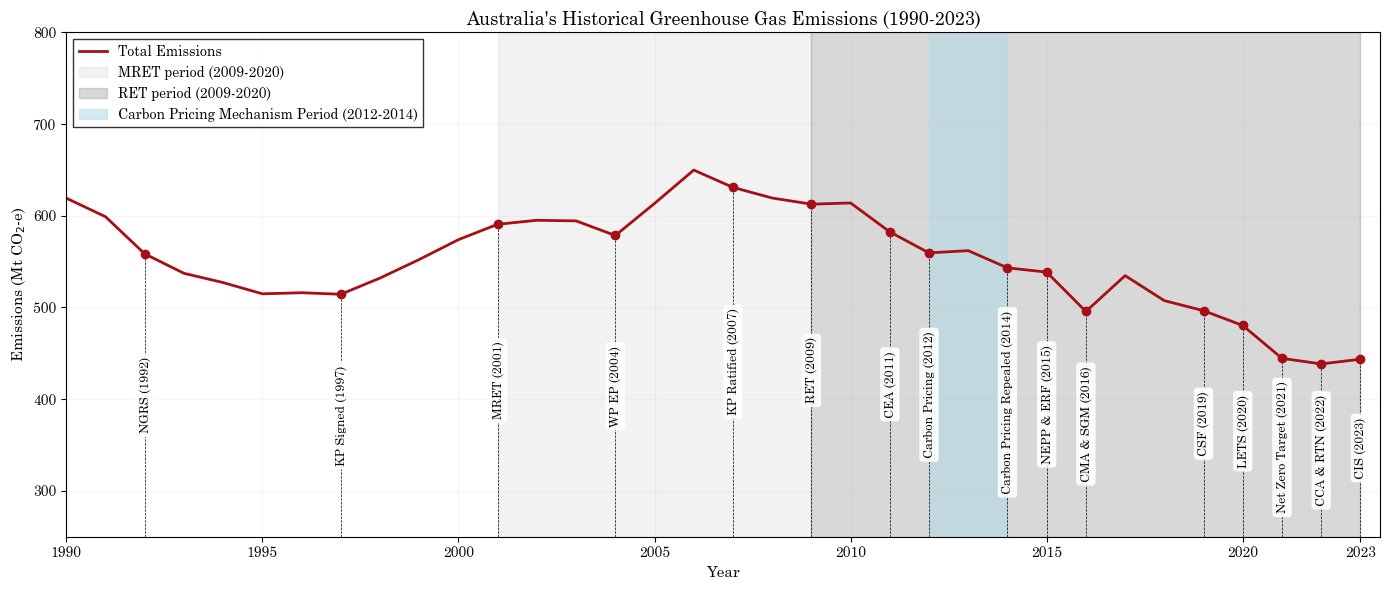

In [32]:
# Create figure
fig, ax = plt.subplots(figsize = (14,6))

# stem_heights
stem_heights = (emissions.loc[aus_policies_grouped["Year"], "Total Emissions"])

# Plot chart
ax.plot(emissions.index, emissions["Total Emissions"], label = "Total Emissions", color ="#a50f15", lw = 3, 
       path_effects = [path_effects.Stroke(linewidth = 2, foreground = "#a50f15")]
       )

# Plot policies and annotate
for year, policy, heights in zip(aus_policies_grouped["Year"], aus_policies_grouped["Abbreviation"], stem_heights):
    markerline, stemlines, baseline = plt.stem(year, heights, linefmt = "black", basefmt = "None",markerfmt = "o", bottom = 250)
    plt.setp(stemlines, linestyle = "--", lw = 0.5)
    markerline.set_markerfacecolor("#a50f15")
    markerline.set_markeredgecolor("#a50f15")
    plt.annotate(f"{policy} ({year})", xy = (year, 0.5*(heights+250)), fontsize = 9, rotation = 90, va = "center",ha = "center",
                 bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "None", alpha = 0.9)
                )
# Shading
ax.axvspan(2001, 2009, color = "grey",alpha = 0.1, label = "MRET period (2009-2020)")
ax.axvspan(2009, 2023, color = "grey",alpha = 0.3, label = "RET period (2009-2020)")
ax.axvspan(2012, 2014, color = "#ADD8E6",alpha = 0.5, label = "Carbon Pricing Mechanism Period (2012-2014)")

# Format chart
ax.set_title("Australia's Historical Greenhouse Gas Emissions (1990-2023)", fontsize = 13)
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 11)

ax.legend(frameon = True, fancybox = False, edgecolor = "black")
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1990, 2023.5)
ax.set_ylim(250, 800)
ax.grid(alpha = 0.1)

# ax.text(0.5,-0.17,"Figure 3: Historical Greenhouse Gas Emissions 1990-2023",fontsize = 11, transform=ax.transAxes, fontstyle = "italic", ha = "center", va = "center")

plt.tight_layout()

plt.savefig("imgs/historical_emissions.png", 
            bbox_inches = "tight"
           )

#### Emissions analysis

In [34]:
# Filter to find year with peak emissions and the associated value
max_emissions = emissions.iloc[[emissions["Total Emissions"].argmax()],[-1]]

print("Maximum emissions and associated year:")
display(max_emissions)


net_emissions_2023 = emissions.loc[[2023], ["Total Emissions"]]

print(f"Emissions 2023:")
display(net_emissions_2023)

pct_change_2006_2023 = (100*((max_emissions["Total Emissions"].values[0]-net_emissions_2023["Total Emissions"].values[0])
                            /max_emissions["Total Emissions"].values[0]
                           )).round(1)

print(f"Percentge decrease in emissions between 2006 to 2023: {pct_change_2006_2023}%")

net_emissions_2008 = emissions.loc[[2008], ["Total Emissions"]]
print(f"Emissions 2008:")
display(net_emissions_2008)

net_emissions_2012 = emissions.loc[[2012], ["Total Emissions"]]
print(f"Emissions 2012:")
display(net_emissions_2012)

pct_change_2008_2012 = (100*((net_emissions_2008["Total Emissions"].values[0]-net_emissions_2012["Total Emissions"].values[0])
                            /net_emissions_2008["Total Emissions"].values[0]
                           )).round(1)

print(f"Percentge decrease in emissions between 2008 to 2012: {pct_change_2008_2012}%")

Maximum emissions and associated year:


,Total Emissions
Year,
2006,649.79


Emissions 2023:


,Total Emissions
Year,
2023,443.57


Percentge decrease in emissions between 2006 to 2023: 31.7%
Emissions 2008:


,Total Emissions
Year,
2008,619.33


Emissions 2012:


,Total Emissions
Year,
2012,559.5


Percentge decrease in emissions between 2008 to 2012: 9.7%


### Sectoral Emissions

#### Assessing Land Use, Land Use Change and Forestry's Contribution to Emissions Reductions

In [37]:
# Create LULUCF dataframe
LULUCF_df = emissions.copy()
LULUCF_df["Total Emissions Excluding LULUCF"] = LULUCF_df.iloc[:,:7].sum(axis = 1)

# View a snapshot of the LULUCF_df
display(LULUCF_df.head())

# Calculate the Net Emissions reduction between 2015 and 2023
lulucf_emissions_2015_2023 = LULUCF_df.loc[2015:2023, ["LULUCF"]].sum().abs()
print(f"LULUCF Emissions reduction between 2015 and 2023 : {lulucf_emissions_2015_2023.values[0].round(2)} MtCO2-e")

print(f"Total Emissions in 2015 excluding LULUCF: {LULUCF_df.loc[2015,["Total Emissions Excluding LULUCF"]].values[0].round(2)} MtCO2-e")
print(f"Total Emissions in 2018 excluding LULUCF: {LULUCF_df.loc[2018,["Total Emissions Excluding LULUCF"]].values[0].round(2)} MtCO2-e")
print(f"Total Emissions in 2023 excluding LULUCF: {LULUCF_df.loc[2023,["Total Emissions Excluding LULUCF"]].values[0].round(2)} MtCO2-e")

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF,Total Emissions,Total Emissions Excluding LULUCF
Year,,,,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46,178.27,619.18,440.91
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38,157.77,598.93,441.16
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12,113.48,558.42,444.94
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93,92.16,537.24,445.08
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16,81.79,527.12,445.33


LULUCF Emissions reduction between 2015 and 2023 : 547.92 MtCO2-e
Total Emissions in 2015 excluding LULUCF: 548.21 MtCO2-e
Total Emissions in 2018 excluding LULUCF: 565.8 MtCO2-e
Total Emissions in 2023 excluding LULUCF: 531.94 MtCO2-e


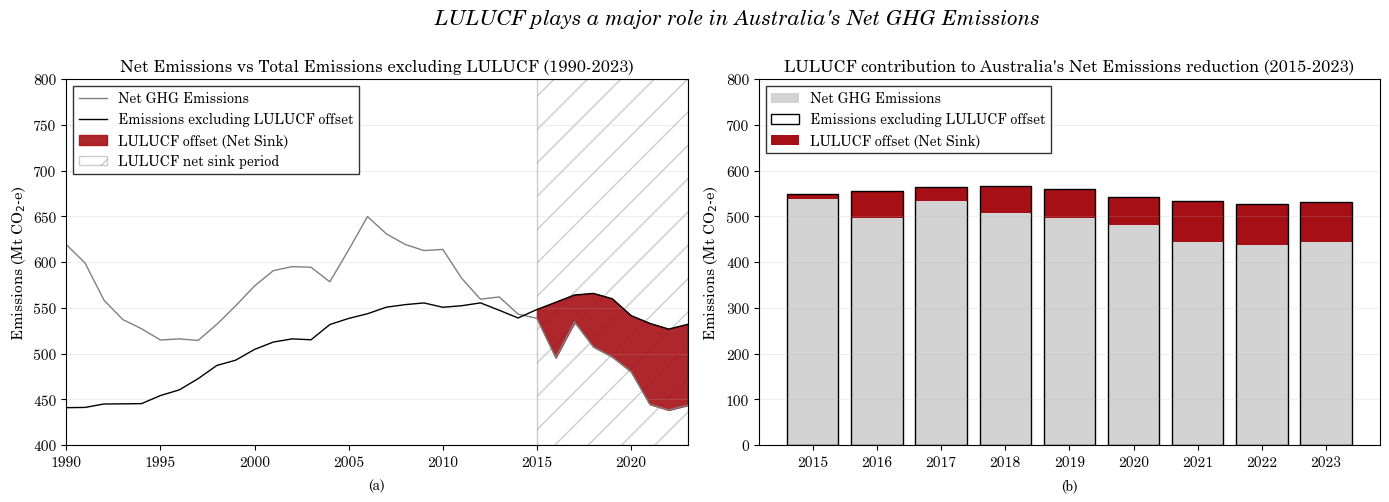

In [38]:
# Filter LULUCF_df to 2015 to 2023 time period 

LULUCF_2015_2023 = LULUCF_df.query("Year >= 2015")

fig,(ax1,ax2)= plt.subplots(1,2, figsize = (14,5))

ax1.plot(LULUCF_df.index,
         LULUCF_df["Total Emissions"],
         label = "Net GHG Emissions",
         c = "grey",
         lw = 1,
         ls = "-"
       )
ax1.plot(LULUCF_df.index,
         LULUCF_df["Total Emissions Excluding LULUCF"],
         label = "Emissions excluding LULUCF offset",
         c = "black",
         lw = 1,
         ls = "-"
       )
ax1.fill_between(LULUCF_2015_2023.index,
                 LULUCF_2015_2023["Total Emissions"],
                 LULUCF_2015_2023["Total Emissions Excluding LULUCF"],
                 label = "LULUCF offset (Net Sink)",
                 color = "#a50f15",
                 alpha = 0.9,
                )

# Land Use Sink Period
ax1.axvspan(2015,2023, label = "LULUCF net sink period", hatch = "/", edgecolor = "black", fill = False, alpha = 0.2, ls = "-", zorder = 0)

#Format
plt.suptitle("LULUCF plays a major role in Australia's Net GHG Emissions", fontsize = 15, fontstyle = "italic", y = 0.96, x = 0.51)
ax1.set_title("Net Emissions vs Total Emissions excluding LULUCF (1990-2023)", fontsize = 12)
# ax1.set_xlabel("Year", fontsize = 11)
ax1.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 11)

ax1.legend(frameon = True, fancybox = False, 
           edgecolor = "black",
           loc = "upper left",
           fontsize = 10)

ax1.set_xlim(1990,2023)
ax1.set_ylim(400,800)
ax1.grid(axis = "y", alpha = 0.2)




ax2.bar(LULUCF_2015_2023["Total Emissions"].index, 
        LULUCF_2015_2023["LULUCF"].abs(),
        width = 0.8, 
        color = "#a50f15",
        bottom = LULUCF_2015_2023["Total Emissions"],
        label = "LULUCF offset (Net Sink)",
        lw = 1,
        alpha = 1,
      )
ax2.bar(LULUCF_2015_2023["Total Emissions"].index, 
        LULUCF_2015_2023["Total Emissions"], 
        color = "lightgrey",
        width = 0.8, 
        label = "Net GHG Emissions",
        lw = 1,
        ls = "-"
      )
ax2.bar(LULUCF_2015_2023["Total Emissions"].index, 
        LULUCF_2015_2023["Total Emissions Excluding LULUCF"], 
        color = "None",
        width = 0.8, 
        label = "Emissions excluding LULUCF offset",
        edgecolor = "black",
        lw = 1,
        ls = "-",
        alpha = 1
      )

handles2,labels2 = ax2.get_legend_handles_labels()
order2 = [1,2,0]
ax2.legend([handles2[i] for i in order2],
           [labels2[i]for i in order2], 
           frameon = True, 
           fancybox = False, 
           edgecolor = "black",
           loc = "upper left",
           fontsize = 10)

# Format
plt.suptitle("LULUCF plays a major role in Australia's Net GHG Emissions", fontsize = 15,fontstyle = "italic", ha = "center", y = 1.00, x = 0.53)
ax2.set_title("LULUCF contribution to Australia's Net Emissions reduction (2015-2023)", fontsize = 12)
# ax2.set_xlabel("Year", fontsize = 11)
ax2.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 11)

ax2.set_ylim(0,800)
ax2.set_xticks([2015,2016,2017,2018,2019,2020,2021,2022,2023])

ax2.grid(axis = "y", alpha = 0.2)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center")
# fig.text(0.5,-0.02,"Figure 4: LULUCF's role in net GHG emissions",fontsize = 11,  fontstyle = "italic", ha = "center", va = "center")
plt.tight_layout()

plt.savefig("imgs/lulucf_analysis.png", 
            bbox_inches = "tight"
           )

#### Sector Emissions (Including LULUCF)

In [40]:
# Sector emissions including LULUCF
sector_emissions = emissions.iloc[:,:-1]

sector_emissions.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF
Year,,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46,178.27
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38,157.77
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12,113.48
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93,92.16
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16,81.79


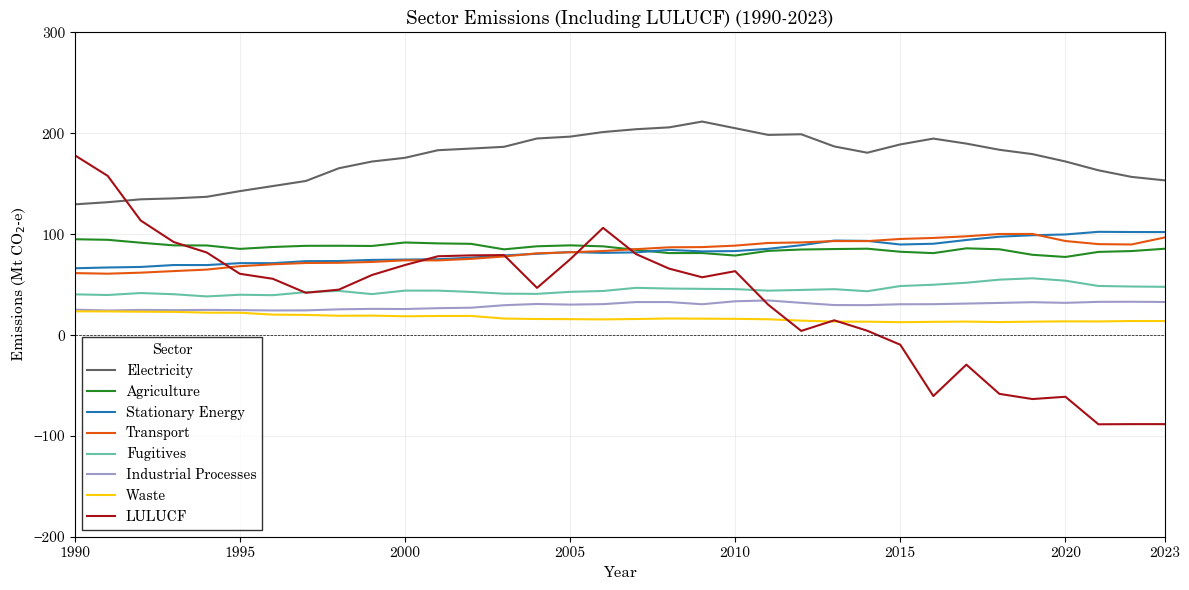

In [301]:
# Create the chart
fig, ax = plt.subplots(figsize = (12,6))

# Plot the chart
for col in sector_emissions.columns:
    ax.plot(sector_emissions[col],
            label = col,
            color = emission_colours_dict[col],
            lw = 1.5    
           )
    
# Create horizontal line at y = 0 
ax.axhline(y = 0, color = "black", lw = .5, ls = "--")

# Format chart
ax.set_title("Sector Emissions (Including LULUCF) (1990-2023)", fontsize = 13)
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 11)

ax.legend(title = "Sector", fancybox = False, edgecolor = "black", fontsize = 10)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1990,2023)
ax.set_ylim(-200,300)


ax.grid(alpha = 0.2)
plt.tight_layout()

plt.savefig("imgs/appendix_sectoral_emissions_inlulucf.png", bbox_inches = "tight")

#### Cumulative Historical Emissions by Sector

In [43]:
# Calculate sum of historical emissions for each sector
historical_sector_emissions = emissions.iloc[:,:-1].sum(axis = 0).sort_values(ascending = False)

# View the total emissions by sector
historical_sector_emissions

Electricity             5945.36
Agriculture             2926.30
Stationary Energy       2823.29
Transport               2790.04
Fugitives               1526.61
LULUCF                  1191.31
Industrial Processes     990.91
Waste                    575.90
dtype: float64

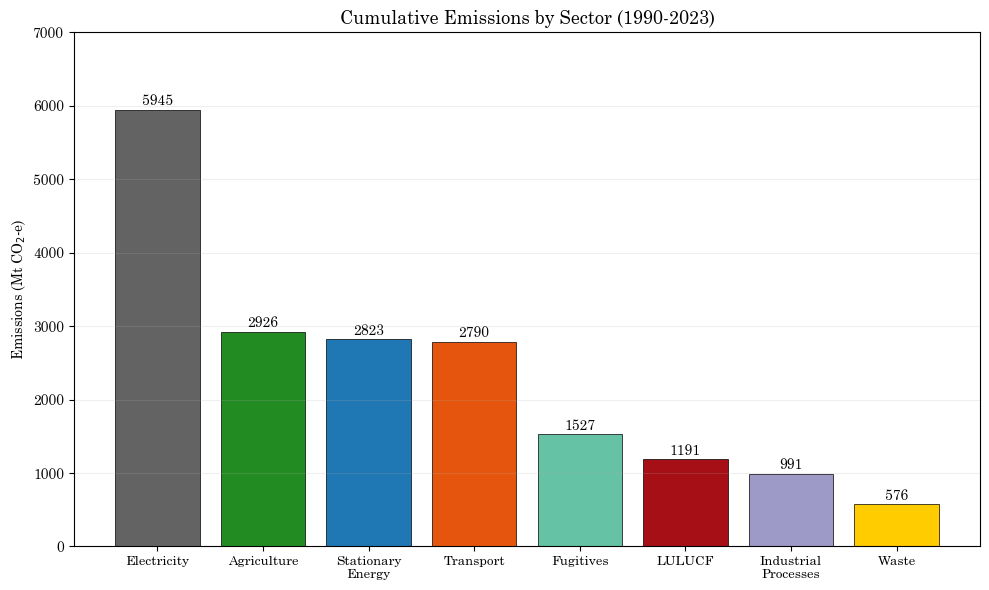

In [44]:
# Create figure
fig,ax = plt.subplots(figsize = (10,6))

# Plot chart
emissions_bar = ax.bar(historical_sector_emissions.index,
       historical_sector_emissions,
       label = historical_sector_emissions.index,
       color = [emission_colours_dict[col] for col in historical_sector_emissions.index],
        width = 0.8,
       lw = 0.5,
       ec = "black"
      )

# Add Bar value labels 
ax.bar_label(emissions_bar, fmt = "%1.0f", label_type = "edge", c = "black", padding = 1
             # font = "Crimson Pro"
            )
# Format
ax.set_title("Cumulative Emissions by Sector (1990-2023)", fontsize = 13)

ax1.legend(title = "Sector", fancybox = False, edgecolor = "black")

ax.set_ylabel("Emissions (Mt CO$_2$-e)")
ax.set_ylim(0,7000)
ax.grid(axis = "y", alpha = 0.2, zorder = 0)

ax.set_xticks([0,1,2,3,4,5,6,7])
ax.set_xticklabels(["Electricity","Agriculture","Stationary\nEnergy","Transport","Fugitives","LULUCF","Industrial\nProcesses","Waste"], fontsize = 9.5)

plt.tight_layout()

#### Sectoral emissions indexed 1990 = 100

In [46]:
# Create indexed sectoral emissions dataframe

sector_indexed = pd.DataFrame()
data_1990 = {}
for i in sector_emissions.columns:
    data_1990[i] = sector_emissions.loc[1990, i]
    sector_indexed[i] = (sector_emissions[i]/data_1990[i])*100

# View a snapshot of the sector_indexed dataframe
sector_indexed.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF
Year,,,,,,,,
1990,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1991,101.659847,99.389217,101.178782,99.071207,98.387497,96.814018,99.658994,88.500589
1992,103.867830,96.366891,101.964637,100.716963,103.200198,99.123855,98.550725,63.656252
1993,104.578090,93.586773,104.836028,103.275216,100.297693,98.128236,97.740835,51.696864
1994,105.790164,93.491997,104.805803,105.703112,94.889606,99.123855,94.458653,45.879845


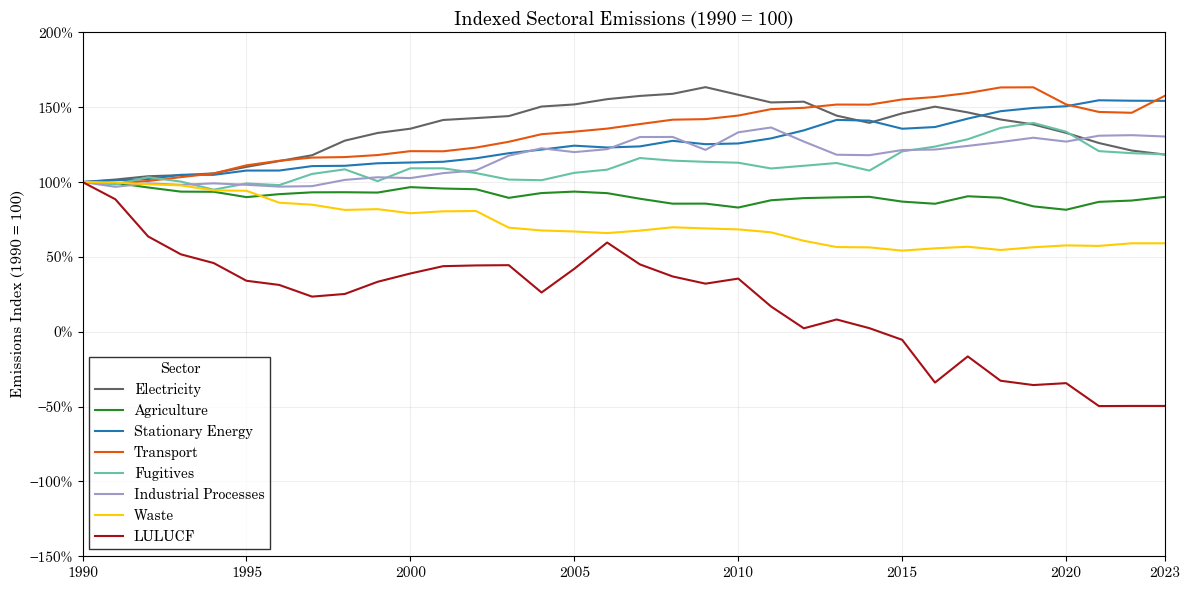

In [47]:
fig, ax = plt.subplots(figsize = (12,6))

for col in sector_indexed.columns:
    ax.plot(sector_indexed.index,
            sector_indexed[col],
            color = emission_colours_dict[col],
            label = col  
           )
    
ax.set_title("Indexed Sectoral Emissions (1990 = 100)", fontsize = 13)
ax.set_ylabel("Emissions Index (1990 = 100)", fontsize = 11)
# ax.set_xlabel("Year")

ax.legend(title = "Sector", fancybox = False, edgecolor= "black")

ax.set_xlim(1990, 2023)
ax.set_ylim(-150, 200)

plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.grid(alpha = 0.2)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax =100))

plt.tight_layout()

#### Sectoral Emissions (Excluding LULUCF)

In [49]:
# Create sectoral emissions excluding LULUCF dataframe
sector_emissions_exLULUCF= emissions.iloc[:,:-2]

sector_emissions_exLULUCF.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste
Year,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16


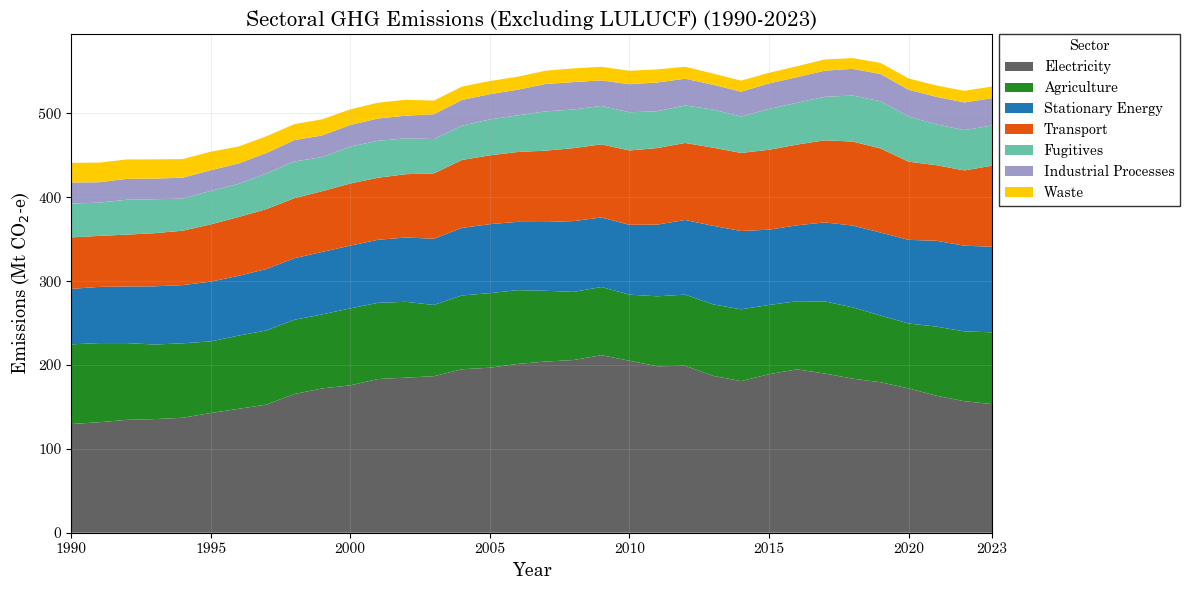

In [50]:
emission_labels = [i for i in sector_emissions_exLULUCF.columns]
emission_colours = [emission_colours_dict[i] for i in sector_emissions_exLULUCF.columns]

# Create figure 
fig, ax = plt.subplots(figsize = (12,6))

# Plot
ax.stackplot(sector_emissions_exLULUCF.index,
             [sector_emissions_exLULUCF[col] for col in sector_emissions_exLULUCF.columns], 
             labels =  emission_labels, 
             colors = emission_colours
            )
# Format
ax.set_title("Sectoral GHG Emissions (Excluding LULUCF) (1990-2023)", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 13)

ax.legend(title = "Sector",bbox_to_anchor = (1,1.015), loc = "upper left", fancybox = False, edgecolor = "black")

plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1990,2023)

ax.grid(alpha = 0.2)

plt.tight_layout()

##### 100% Stacked Area Chart

In [52]:
# Create percentage share df
sector_emissions_exLULUCF_perc = sector_emissions_exLULUCF.apply(lambda x: x*100/sum(x), axis = 1)

sector_emissions_exLULUCF_perc.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste
Year,,,,,,,
1990,29.377878,21.537275,15.007598,13.918940,9.142455,5.695040,5.320814
1991,29.848581,21.393599,15.175900,13.781848,8.989936,5.510472,5.299665
1992,30.237785,20.566818,15.163842,13.891761,9.349575,5.594013,5.196206
1993,30.434978,19.967197,15.585962,14.240137,9.083760,5.536083,5.151883
1994,30.770440,19.935778,15.572721,14.566726,8.589136,5.589114,4.976085


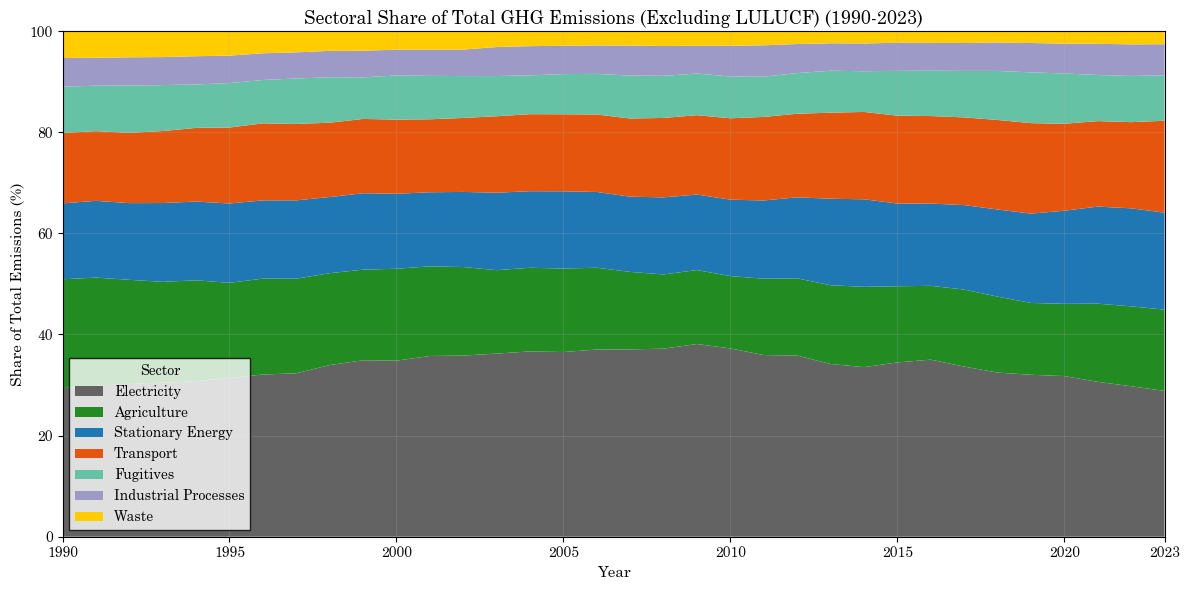

In [53]:
# Create figure 
fig, ax = plt.subplots(figsize = (12,6))

# Plot
ax.stackplot(sector_emissions_exLULUCF_perc.index,
             [sector_emissions_exLULUCF_perc[col] for col in sector_emissions_exLULUCF_perc.columns], 
             labels =  emission_labels, 
             colors = emission_colours,
             # edgecolor = "black",
             # linewidth = 0.25
            )
# Format
ax.set_title("Sectoral Share of Total GHG Emissions (Excluding LULUCF) (1990-2023)", fontsize = 13, pad = 5)
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Share of Total Emissions (%)", fontsize = 11)

ax.legend(title = "Sector", loc = "lower left", edgecolor = "black", fancybox = False, fontsize = 10)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1990,2023)
ax.set_ylim(0,100)

ax.grid(alpha = 0.2)

plt.tight_layout()

plt.savefig("imgs/appendix_sectoral_share_exlulucf.png", bbox_inches = "tight")

##### Sectoral Emissions Share 2023

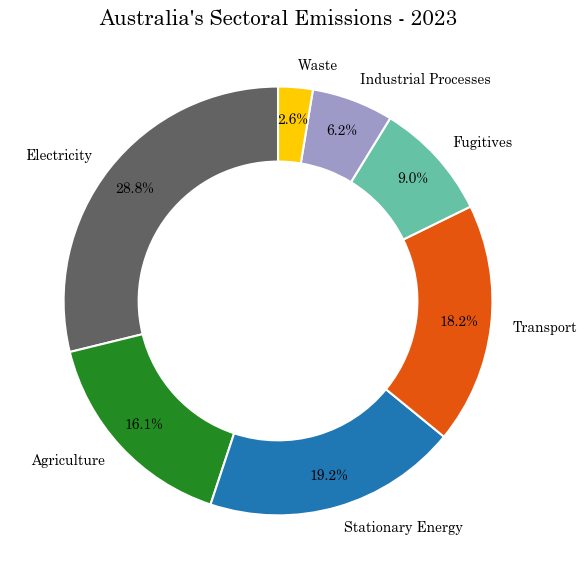

In [55]:
sector_emissions_exLULUCF_2023 = sector_emissions_exLULUCF.loc[2023]

fig,ax = plt.subplots(figsize = (6,6))
ax.pie(sector_emissions_exLULUCF_2023,
       labels = sector_emissions_exLULUCF_2023.index,
       startangle = 90,
       autopct = "%0.1f%%",
       colors = [emission_colours_dict[i]for i in sector_emissions_exLULUCF_2023.index], 
       pctdistance = 0.85,
       wedgeprops = dict(width=0.35,linewidth = 1.5, edgecolor= "white"),
      )

#Format the graph
ax.set_title("Australia's Sectoral Emissions - 2023", fontsize = 15)

plt.tight_layout()

#### Sectoral Emissions Report Figures

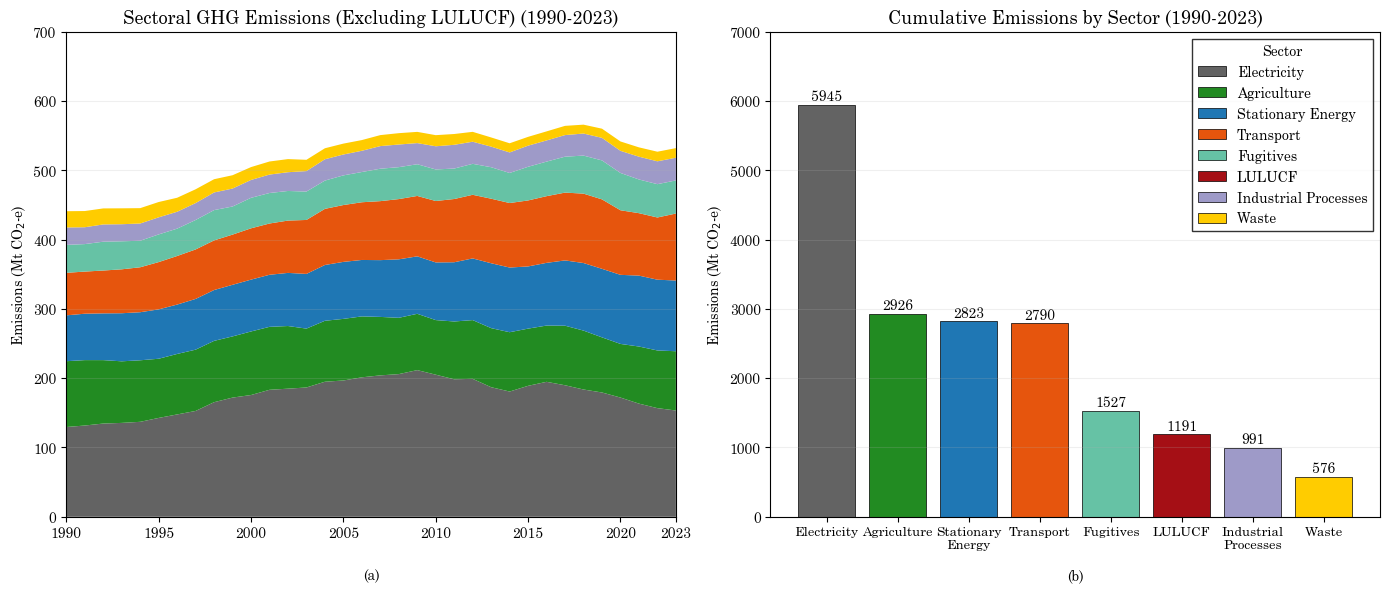

In [57]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize = (14,6))


ax1.stackplot(sector_emissions_exLULUCF.index,
             [sector_emissions_exLULUCF[col] for col in sector_emissions_exLULUCF.columns], 
             labels =  emission_labels, 
             colors = emission_colours, 
             # edgecolor = "white",
             # linewidth = 2
            )
# Format
ax1.set_title("Sectoral GHG Emissions (Excluding LULUCF) (1990-2023)", fontsize = 13)

ax1.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 10)

ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax1.set_xlim(1990,2023)
ax1.set_ylim(0,700)

ax1.grid(axis = "y", alpha = 0.2)

emissions_bar = ax2.bar(historical_sector_emissions.index,
                        historical_sector_emissions,
                        label = historical_sector_emissions.index,
                        color = [emission_colours_dict[col] for col in historical_sector_emissions.index],
                        width = 0.8,
                        lw = 0.5,
                        ec = "black"
                       )
# Add bar value labels 
ax2.bar_label(emissions_bar, fmt = "%1.0f", label_type = "edge", c = "black", padding = 1
            )
# Format
ax2.set_title("Cumulative Emissions by Sector (1990-2023)", fontsize = 13)

ax2.legend(title = "Sector", fancybox = False, edgecolor = "black")

ax2.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 10)
ax2.set_ylim(0,7000)
ax2.grid(axis = "y", alpha = 0.2, zorder = 0)


ax2.set_xticks([0,1,2,3,4,5,6,7])
ax2.set_xticklabels(["Electricity","Agriculture","Stationary\nEnergy","Transport","Fugitives","LULUCF","Industrial\nProcesses","Waste"], fontsize = 9.5)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center", va = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center", va = "center")

# fig.text(0.5,-0.02,"Figure 5: Sectoral and cumulative GHG emissions 1990-2023",fontsize = 11,  fontstyle = "italic", ha = "center", va = "center")

plt.tight_layout()

plt.savefig("imgs/sectoral_emissions.png", bbox_inches = "tight")

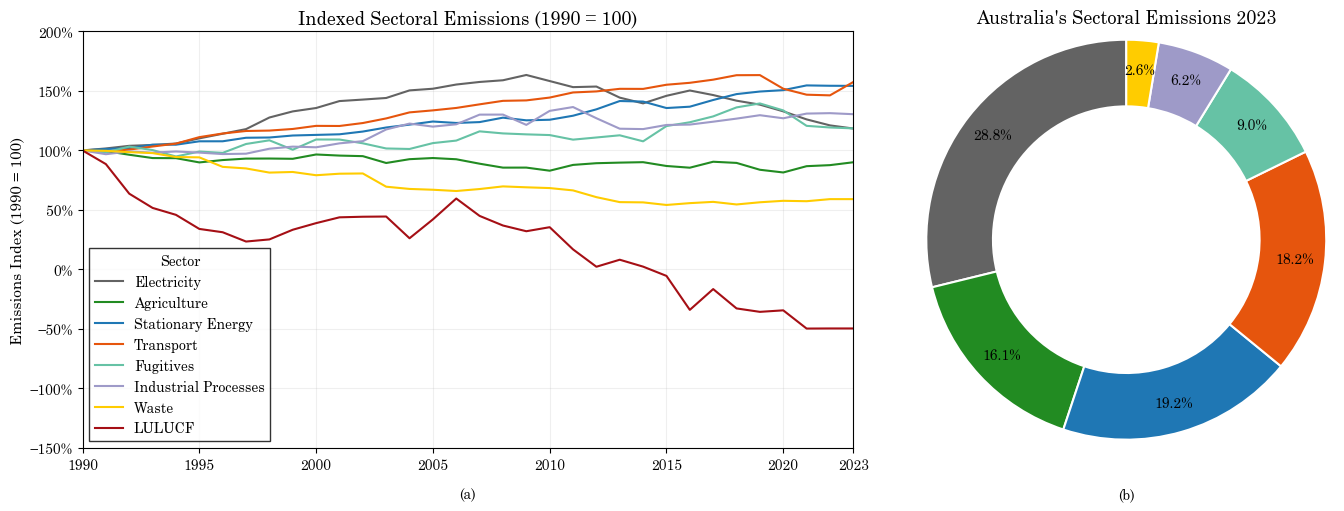

In [58]:
# Index and 2023 Sectoral Share Figure
fig = plt.figure(figsize = (14,5.2))
gs = gridspec.GridSpec(nrows = 1, ncols = 10,figure = fig)

ax1 = fig.add_subplot(gs[0,:6])
ax2 = fig.add_subplot(gs[0,6:])

for col in sector_indexed.columns:
    ax1.plot(sector_indexed.index,
            sector_indexed[col],
            color = emission_colours_dict[col],
            label = col  
           )
    
ax1.set_title("Indexed Sectoral Emissions (1990 = 100)", fontsize = 13)
ax1.set_ylabel("Emissions Index (1990 = 100)", fontsize = 11)


ax1.legend(title = "Sector", fancybox = False, edgecolor= "black", loc = ("lower left"))

ax1.set_xlim(1990, 2023)
ax1.set_ylim(-150, 200)

ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax1.grid(alpha = 0.2)
ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax =100))


ax2.pie(sector_emissions_exLULUCF_2023,
       startangle = 90,
       autopct = "%0.1f%%",
        radius = 1.2,
       colors = [emission_colours_dict[i]for i in sector_emissions_exLULUCF_2023.index], 
       pctdistance = 0.85,
       wedgeprops = dict(width=0.4,linewidth = 1.5, edgecolor= "white"),
      )

#Format the graph
ax2.set_title("Australia's Sectoral Emissions 2023", fontsize = 13)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center")

plt.tight_layout()

plt.savefig("imgs/sectoral_index_sectoral_emissions_2023.png", bbox_inches = "tight")

#### Sectoral Emissions Analysis

In [60]:
# Largest Historical Emitter: Electricity

electricity_1990 = sector_emissions["Electricity"].loc[1990]
electricity_2023 = sector_emissions["Electricity"].loc[2023]

electricity_mval = sector_emissions["Electricity"].max()
electricity_myear = sector_emissions["Electricity"].idxmax()
e_1990_2023 = (electricity_2023-electricity_1990)
e_perc_1990_2023 = (100*(electricity_2023-electricity_1990)/electricity_1990)
e_1990_2009 = (electricity_mval-electricity_1990)
e_perc_1990_2009 = (100*(electricity_mval-electricity_1990)/electricity_1990)
e_2009_2023 = (electricity_2023-electricity_mval)
e_perc_2009_2023 = (100*(electricity_2023-electricity_mval)/electricity_mval)
e_perc_min = round(sector_emissions_exLULUCF_perc["Electricity"].min())
e_perc_max = round(sector_emissions_exLULUCF_perc["Electricity"].max())

print(f"Emissions 1990: {electricity_1990}")
print(f"Emissions 2023: {electricity_2023}")
print(f"Maximum emissions from the Electricity sector: {electricity_mval}")
print(f"Max emissions year: {electricity_myear}")
print(f"Change in emissions between 1990 to 2023: {e_1990_2023.round(2)}")
print(f"Percentage change in emissions between 1990 to 2023: {e_perc_1990_2023.round(1)}%")
print(f"Change in emissions between 1990 to 2009: {e_1990_2009.round(2)}")
print(f"Percentage change in emissions between 1990 to peak in 2009: {e_perc_1990_2009.round(1)}%")
print(f"Change in emissions between 2009 to 2023: {e_2009_2023.round(2)}")
print(f"Percentage change in emissions between 2009 peak to 2023: {e_perc_2009_2023.round(1)}%")

print(f"Electricity sector emissions share range between 1990 to 2023: {e_perc_min}% to {e_perc_max}%")

Emissions 1990: 129.53
Emissions 2023: 153.34
Maximum emissions from the Electricity sector: 211.63
Max emissions year: 2009
Change in emissions between 1990 to 2023: 23.81
Percentage change in emissions between 1990 to 2023: 18.4%
Change in emissions between 1990 to 2009: 82.1
Percentage change in emissions between 1990 to peak in 2009: 63.4%
Change in emissions between 2009 to 2023: -58.29
Percentage change in emissions between 2009 peak to 2023: -27.5%
Electricity sector emissions share range between 1990 to 2023: 29% to 38%


In [61]:
sector_emissions_exLULUCF_2023

Electricity             153.34
Agriculture              85.52
Stationary Energy       102.05
Transport                96.65
Fugitives                47.77
Industrial Processes     32.75
Waste                    13.86
Name: 2023, dtype: float64

In [62]:
# Transport increase

transport_2023_perc = sector_emissions_exLULUCF_perc.loc[2023,"Transport"].round(1)
tranport_1990_2023_perc = (sector_indexed.loc[2023, "Transport"]-100).round(1)
print(f"Transport Emissions percentage 2023: {transport_2023_perc}%")
print(f"Transport emissions in 2023 was {sector_indexed.loc[2023, "Transport"].round(1)}% of emission values in 1990, reflecting an increase in emissions by {tranport_1990_2023_perc}% during the anaylsis period.")


Transport Emissions percentage 2023: 18.2%
Transport emissions in 2023 was 157.5% of emission values in 1990, reflecting an increase in emissions by 57.5% during the anaylsis period.


In [63]:
# Stationary Energy

print(f"Stationary Energy levels is {sector_indexed.loc[2023, "Stationary Energy"].round(1)}% of 1990 emissions levels")

Stationary Energy levels is 154.2% of 1990 emissions levels


Max agriculture emissions: 94.96
Min agriculture emissions: 77.37
Agriculture emissions percentage change between 1990 and 2023: -9.9%


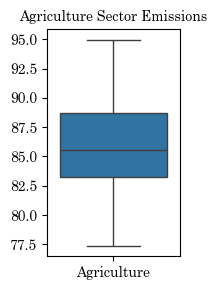

In [64]:
# Agriculture 

# display(sector_emissions_exLULUCF_perc.loc[2023,"Agriculture"].round(1))
agriculture_max = sector_emissions["Agriculture"].max()
agriculture_min = sector_emissions["Agriculture"].min()
agriculture_perc_1990_2023 = (sector_indexed.loc[2023,"Agriculture"]-100).round(1)
print(f"Max agriculture emissions: {agriculture_max}")
print(f"Min agriculture emissions: {agriculture_min}")
print(f"Agriculture emissions percentage change between 1990 and 2023: {agriculture_perc_1990_2023}%")

fig,ax = plt.subplots(figsize = (2,3))
sns.boxplot(sector_emissions[["Agriculture"]])
ax.set_title("Agriculture Sector Emissions", fontsize = 10)

plt.tight_layout()

In [65]:
# Fugitives

fugitives_perc_1990_2023 = (sector_indexed.loc[2023,"Fugitives"]- 100).round(1)

fugitives_perc_1990_2023

18.5

In [66]:
# Industrial processes
industrial_perc_1990_2023 = (sector_indexed.loc[2023,"Industrial Processes"]- 100).round(1)

industrial_perc_1990_2023

30.4

Year
1990    23.46
1991    23.38
1992    23.12
1993    22.93
1994    22.16
Name: Waste, dtype: float64

Year
1990    100.000000
1991     99.658994
1992     98.550725
1993     97.740835
1994     94.458653
Name: Waste, dtype: float64

<Axes: ylabel='Waste'>

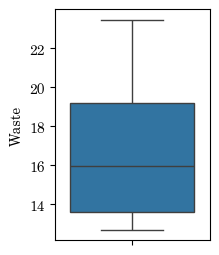

In [67]:
# Waste
display(sector_emissions.loc[:,"Waste"].head())
display(sector_indexed.loc[:,"Waste"].head())
fig,ax = plt.subplots(figsize = (2,3))
sns.boxplot(sector_emissions.loc[:,"Waste"])

In [68]:
(emissions.loc[2020, ["Transport"]] - emissions.loc[1990, ["Transport"]])/emissions.loc[1990, ["Transport"]] * 100

Transport    51.833143
dtype: float64

In [69]:
sector_indexed.loc[2020]

Electricity             132.826372
Agriculture              81.476411
Stationary Energy       150.642285
Transport               151.833143
Fugitives               133.614488
Industrial Processes    127.001195
Waste                    57.672634
LULUCF                  -34.346777
Name: 2020, dtype: float64

## Energy Transition Progress

How has Australia’s electricity generation mix evolved, and what is the share of renewables today?

### Create energy mix DataFrame

In [72]:
# Creating the Bioenergy, Coal and Solar columns
energy_mix = (energy_mix_df.assign(Bioenergy = energy_mix_df["Biomass (Bagasse, Wood)"] + energy_mix_df["Biogas"],
                                Coal = energy_mix_df["Black Coal"] + energy_mix_df["Brown Coal"],
                                Solar = energy_mix_df["Large-scale Solar PV"] + energy_mix_df["Small-scale solar PV"]
                               ))

energy_mix = energy_mix.reindex(sorted(energy_mix.columns), axis = 1)

energy_mix.head()

,Bioenergy,Biogas,"Biomass (Bagasse, Wood)",Black Coal,Brown Coal,Coal,Geothermal,Hydro,Large-scale Solar PV,Natural Gas,Oil Products,Other,Small-scale solar PV,Solar,Total Electricity,Total Non-Renewable,Total Renewable,Wind
Year,,,,,,,,,,,,,,,,,,
1990,750.0,0.0,750.0,87573.0,33594.0,121167.0,0.0,14880.0,0.0,14359.0,3552.0,0.0,0.0,0.0,154708.0,139078.0,15630.0,0.0
1991,769.0,0.0,769.0,89511.0,36048.0,125559.0,0.0,16103.0,0.0,10772.0,3396.0,0.0,0.0,0.0,156599.0,139727.0,16872.0,0.0
1992,670.0,0.0,670.0,94325.1,34559.0,128884.1,0.0,15768.0,0.0,11633.0,2362.0,0.0,10.9,10.9,159328.0,142879.1,16448.9,0.0
1993,670.0,0.0,670.0,97872.7,33248.0,131120.7,0.0,16953.0,0.0,12295.0,2421.0,0.0,13.3,13.3,163473.0,145836.7,17636.3,0.0
1994,670.0,0.0,670.0,100544.1,34890.0,135434.1,0.0,16649.0,0.0,12199.0,2320.0,0.0,15.9,15.9,167292.0,149953.1,17338.9,4.0


### Renewables vs Non Renewables

#### Create Renewable vs Non Renewable DataFrame

In [75]:
# Creating the Renewable vs Non Renewable DataFrame

renewable_vs_fossil = (energy_mix.loc[:,["Total Non-Renewable","Total Renewable","Total Electricity"]]
                       .assign(Renewable_Share = (100*energy_mix["Total Renewable"]/energy_mix["Total Electricity"]).round(1),
                              Fossil_Fuel_Share = (100*energy_mix["Total Non-Renewable"]/energy_mix["Total Electricity"]).round(1)
                              ) 
                      )

renewable_vs_fossil.head()

,Total Non-Renewable,Total Renewable,Total Electricity,Renewable_Share,Fossil_Fuel_Share
Year,,,,,
1990,139078.0,15630.0,154708.0,10.1,89.9
1991,139727.0,16872.0,156599.0,10.8,89.2
1992,142879.1,16448.9,159328.0,10.3,89.7
1993,145836.7,17636.3,163473.0,10.8,89.2
1994,149953.1,17338.9,167292.0,10.4,89.6


#### Renewable vs. Fossil Fuel Generation Over Time

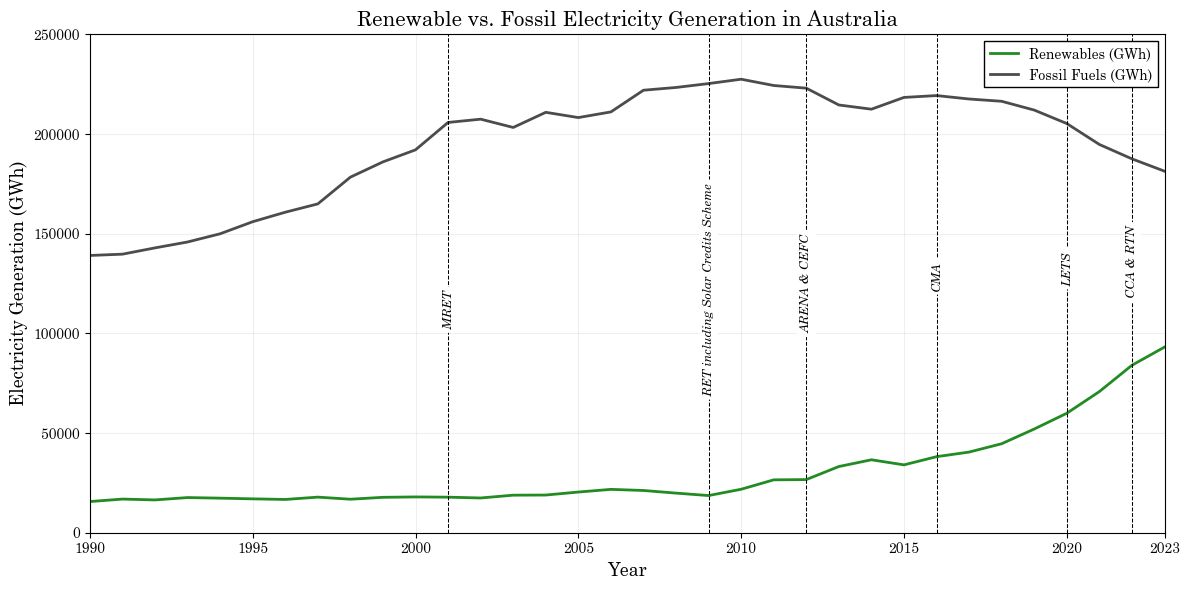

In [77]:
# Define the labels and linestyle
labels = ["Renewables (GWh)","Fossil Fuels (GWh)", ]


# Create the graph
fig, ax = plt.subplots(figsize = (12,6))

# Plot the graph of Renewables vs Fossil Electricity
for i, x in enumerate(colours_dict2.keys()):
    ax.plot(renewable_vs_fossil.index,
            renewable_vs_fossil[x],
            color = colours_dict2[x],
            label = labels[i],
            lw  = 2.0,
            # path_effects = [path_effects.Stroke(linewidth = 2, foreground = "black"),path_effects.SimpleLineShadow(),path_effects.Normal()]
            )


for year, policy in zip(renewable_policies["Year"], renewable_policies["Abbreviation"]):  
    ax.vlines(year, ymin = 0, ymax =250000,color = "black", ls = "--", lw = 0.75)
    annotation_yval = renewable_vs_fossil.loc[year, ["Total Non-Renewable"	,"Total Renewable"]].mean()
    ax.annotate(policy, xy = (year, annotation_yval), ha = "center",va= "center", rotation = 90, fontsize = 9, style = "italic",wrap = True,
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "None", alpha = 1))



#Format the graph
ax.set_title("Renewable vs. Fossil Electricity Generation in Australia", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Electricity Generation (GWh)", fontsize = 13)

ax.legend(loc = "upper right",fancybox = False, edgecolor = "black", framealpha = 1)

plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1990,2023)
ax.set_ylim(0,250000)
ax.grid(alpha = 0.2)

plt.tight_layout()


#### Renewable vs. Fossil Fuel Share (%) Over Time

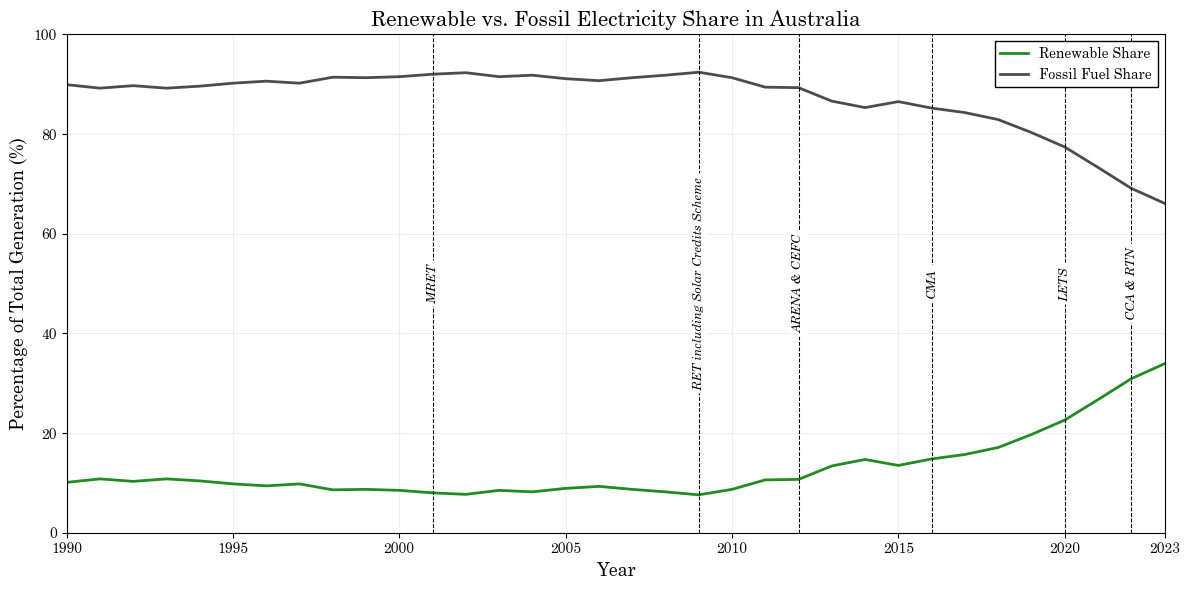

In [79]:

# Define the labels and linestyle
labels = ["Renewable Share","Fossil Fuel Share"]


# Create the graph
fig, ax = plt.subplots(figsize = (12,6))

# Plot the graph of Renewables vs Fossil Electricity
for i, x in enumerate(colours_dict3.keys()):
    ax.plot(renewable_vs_fossil.index,
            renewable_vs_fossil[x],
            color = colours_dict3[x],
            label = labels[i],
            lw  = 2.0,
           )
for year, policy in zip(renewable_policies["Year"], renewable_policies["Abbreviation"]):  
    ax.vlines(year, ymin = 0, ymax =100,color = "black", ls = "--", lw = 0.75)
    # annotation_yval = renewable_vs_fossil.loc[year, ["Total Non-Renewable"	,"Total Renewable"]].mean()
    ax.annotate(policy, xy = (year, 50), ha = "center",va= "center", rotation = 90, fontsize = 9, style = "italic",wrap = True,
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "None", alpha = 1))


#Format the graph
ax.set_title("Renewable vs. Fossil Electricity Share in Australia", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Percentage of Total Generation (%)", fontsize = 13)


ax.legend(loc = "upper right",fancybox = False, edgecolor = "black", framealpha = 1)

ax.set_ylim(0,100)
ax.set_xlim(1990,2023)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.grid(alpha = 0.2)

plt.tight_layout()


#### Renewable vs Fossil Share 2023

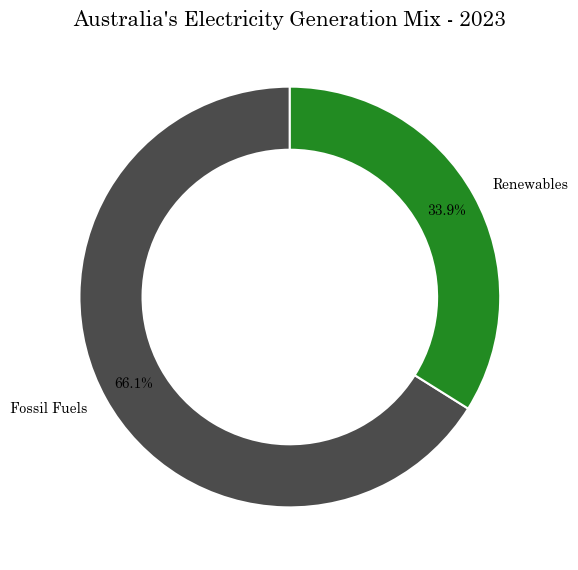

In [81]:
renewable_vs_fossil_2023 = renewable_vs_fossil.loc[2023,["Fossil_Fuel_Share","Renewable_Share"]]

labels = [ "Fossil Fuels","Renewables"]
colors = [colours_dict3[i] for i in renewable_vs_fossil_2023.index]

fig, ax = plt.subplots(figsize = (6,6))

ax.pie(renewable_vs_fossil_2023,
       startangle = 90,
       colors = colors,
       labels = labels,
       autopct = "%.1f%%",
       pctdistance = 0.85,
       wedgeprops = dict(width = 0.3, edgecolor = "white", lw = 1.5),
       textprops = dict(color = "black", fontweight = "light")
       
      )

#Format the graph
ax.set_title("Australia's Electricity Generation Mix - 2023", fontsize = 15)

plt.tight_layout()

#### Renewable vs Fossil Report Figures

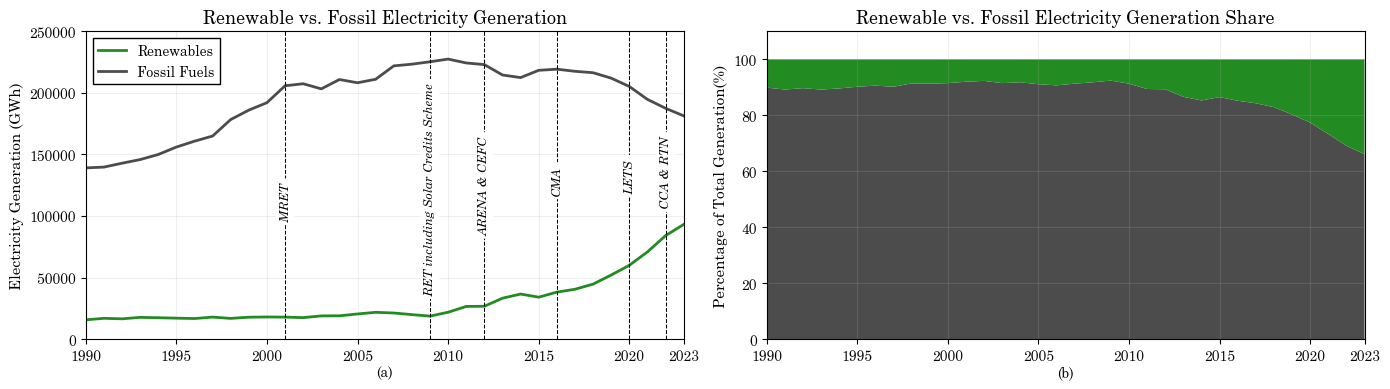

In [83]:
# Define the labels and linestyle
labels = ["Renewables", "Fossil Fuels"]


# Create the graph
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (14,4), sharex = True)

# Plot the graph of Renewables vs Fossil Electricity
for i, x in enumerate(colours_dict2.keys()):
    ax1.plot(renewable_vs_fossil.index,
            renewable_vs_fossil[x],
            color = colours_dict2[x],
            label = labels[i],
            lw  = 2.0,
            # path_effects = [path_effects.Stroke(linewidth = 2, foreground = "black"),path_effects.SimpleLineShadow(),path_effects.Normal()]
            )


for year, policy in zip(renewable_policies["Year"], renewable_policies["Abbreviation"]):  
    ax1.vlines(year, ymin = 0, ymax =250000,color = "black", ls = "--", lw = 0.75)
    annotation_yval = renewable_vs_fossil.loc[year, ["Total Non-Renewable"	,"Total Renewable"]].mean()
    ax1.annotate(policy, xy = (year, annotation_yval), ha = "center",va= "center", rotation = 90, fontsize = 9, style = "italic",wrap = True,
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "None", alpha = 1))



#Format the graph
ax1.set_title("Renewable vs. Fossil Electricity Generation", fontsize = 13)
# ax1.set_xlabel("Year", fontsize = 11)
ax1.set_ylabel("Electricity Generation (GWh)", fontsize = 11)

ax1.legend(loc = "upper left",fancybox = False, edgecolor = "black", framealpha = 1)

ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax1.set_xlim(1990,2023)
ax1.set_ylim(0,250000)
ax1.grid(alpha = 0.2)


# plt.savefig("renewable_vs_fossil_share_5.png", bbox_inches = "tight")


ax2.stackplot(renewable_vs_fossil.index,
             renewable_vs_fossil["Fossil_Fuel_Share"],
             renewable_vs_fossil["Renewable_Share"], 
             colors = ["#4C4C4C","#228B22"]
            )
# ax2.vlines(2009, ymin = 0, ymax =110,color = "black", ls = "--", lw = 0.75)
ax2.set_title("Renewable vs. Fossil Electricity Generation Share", fontsize = 13)
ax2.set_ylabel("Percentage of Total Generation(%)", fontsize = 11)
ax2.set_xlim(1990,2023)
ax2.set_ylim(0,110)
ax2.grid(alpha = 0.2)


ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center")

# fig.text(0.5,-0.02,"Figure 7: Renewable and fossil electricity generation trends 1990-2023",
#          fontsize = 11,  
#          fontstyle = "italic",
#          ha = "center",
#          va = "center")

plt.tight_layout()

plt.savefig("imgs/renewable_fossil_generation_share.png", bbox_inches = "tight")


#### Renewable vs Fossil Fuel Analysis

In [85]:
renewable_vs_fossil.head()

,Total Non-Renewable,Total Renewable,Total Electricity,Renewable_Share,Fossil_Fuel_Share
Year,,,,,
1990,139078.0,15630.0,154708.0,10.1,89.9
1991,139727.0,16872.0,156599.0,10.8,89.2
1992,142879.1,16448.9,159328.0,10.3,89.7
1993,145836.7,17636.3,163473.0,10.8,89.2
1994,149953.1,17338.9,167292.0,10.4,89.6


In [86]:
renewable_1990 = (renewable_vs_fossil.loc[1990,"Total Renewable"])
renewable_1990_perc = renewable_vs_fossil.loc[1990, "Renewable_Share"]
renewable_2023 = (renewable_vs_fossil.loc[2023,"Total Renewable"])
renewable_2023_perc = renewable_vs_fossil.loc[2023, "Renewable_Share"]
fossil_1990 = (renewable_vs_fossil.loc[1990,"Total Non-Renewable"])
fossil_1990_perc = renewable_vs_fossil.loc[1990,"Fossil_Fuel_Share"]
fossil_2023 = (renewable_vs_fossil.loc[2023,"Total Non-Renewable"])
fossil_2023_perc = renewable_vs_fossil.loc[2023,"Fossil_Fuel_Share"]

renewable_1990_2023 = renewable_2023 - renewable_1990
renewable_1990_2023_perc = (renewable_2023_perc - renewable_1990_perc)

fossil_1990_2023 = fossil_2023 - fossil_1990
fossil_1990_2023_perc = (fossil_2023_perc - fossil_1990_perc)

total_electricity_generation_1990 = (renewable_vs_fossil.loc[1990, "Total Electricity"])
total_electricity_generation_2023 = (renewable_vs_fossil.loc[2023, "Total Electricity"])
total_electricity_generation_1990_2023 = total_electricity_generation_2023 - total_electricity_generation_1990
total_electricity_generation_1990_2023_perc = 100*(total_electricity_generation_1990_2023/total_electricity_generation_1990)

print(f"Renewable electricity generation 1990: {renewable_1990.round()} GWh")
print(f"Renewable electricity percentage share 1990: {renewable_1990_perc.round(1)}%")
print(f"Renewable electricity generation 2023: {renewable_2023.round()} GWh")
print(f"Renewable electricity percentage share 2023: {renewable_2023_perc.round(1)}%")

print(f"Fossil electricity generation 1990: {fossil_1990.round()} GWh")
print(f"Fossil electricity percentage share 1990: {fossil_1990_perc.round(1)}%")
print(f"Fossil electricity generation 2023: {fossil_2023.round()} GWh")
print(f"Fossil electricity percentage share 2023: {fossil_2023_perc.round(1)}%")

print(f"Renewable electricity generation increase between 1990 to 2023: {renewable_1990_2023.round()} GWh")
print(f"Renewable electricity generation share percentage change between 1990 to 2023: {renewable_1990_2023_perc.round(1)}%")


print(f"Fossil electricity generation increase between 1990 to 2023: {fossil_1990_2023.round()} GWh")
print(f"Fossil electricity generation share percentage change between 1990 to 2023: {fossil_1990_2023_perc.round(1)}%")

print(f"Total Electricity generated in 1990: {total_electricity_generation_1990.round()} GWh")
print(f"Total Electricity generated in 2023: {total_electricity_generation_2023.round()} GWh")
print(f"Total Electricity generation change between 1990 to 2023: {total_electricity_generation_1990_2023.round()} GWh")
print(f"Total Electricity generation percentage change between 1990 to 2023: {total_electricity_generation_1990_2023_perc.round(1)}%")

Renewable electricity generation 1990: 15630.0 GWh
Renewable electricity percentage share 1990: 10.1%
Renewable electricity generation 2023: 93112.0 GWh
Renewable electricity percentage share 2023: 33.9%
Fossil electricity generation 1990: 139078.0 GWh
Fossil electricity percentage share 1990: 89.9%
Fossil electricity generation 2023: 181363.0 GWh
Fossil electricity percentage share 2023: 66.1%
Renewable electricity generation increase between 1990 to 2023: 77482.0 GWh
Renewable electricity generation share percentage change between 1990 to 2023: 23.8%
Fossil electricity generation increase between 1990 to 2023: 42285.0 GWh
Fossil electricity generation share percentage change between 1990 to 2023: -23.8%
Total Electricity generated in 1990: 154708.0 GWh
Total Electricity generated in 2023: 274475.0 GWh
Total Electricity generation change between 1990 to 2023: 119767.0 GWh
Total Electricity generation percentage change between 1990 to 2023: 77.4%


### Evolution of Australia's Electricity Generation Mix

#### Create Generation Mix DataFrame

In [89]:
generation_mix = (energy_mix[["Bioenergy", 
                  "Coal",
                  "Geothermal",
                  "Hydro",
                  "Natural Gas",
                  "Oil Products",
                  "Other",
                  "Solar", 
                  "Wind"]]
                 )

generation_mix.head()

,Bioenergy,Coal,Geothermal,Hydro,Natural Gas,Oil Products,Other,Solar,Wind
Year,,,,,,,,,
1990,750.0,121167.0,0.0,14880.0,14359.0,3552.0,0.0,0.0,0.0
1991,769.0,125559.0,0.0,16103.0,10772.0,3396.0,0.0,0.0,0.0
1992,670.0,128884.1,0.0,15768.0,11633.0,2362.0,0.0,10.9,0.0
1993,670.0,131120.7,0.0,16953.0,12295.0,2421.0,0.0,13.3,0.0
1994,670.0,135434.1,0.0,16649.0,12199.0,2320.0,0.0,15.9,4.0


#### Evolution of Australia's Electricity Generation Mix (1990-2023)

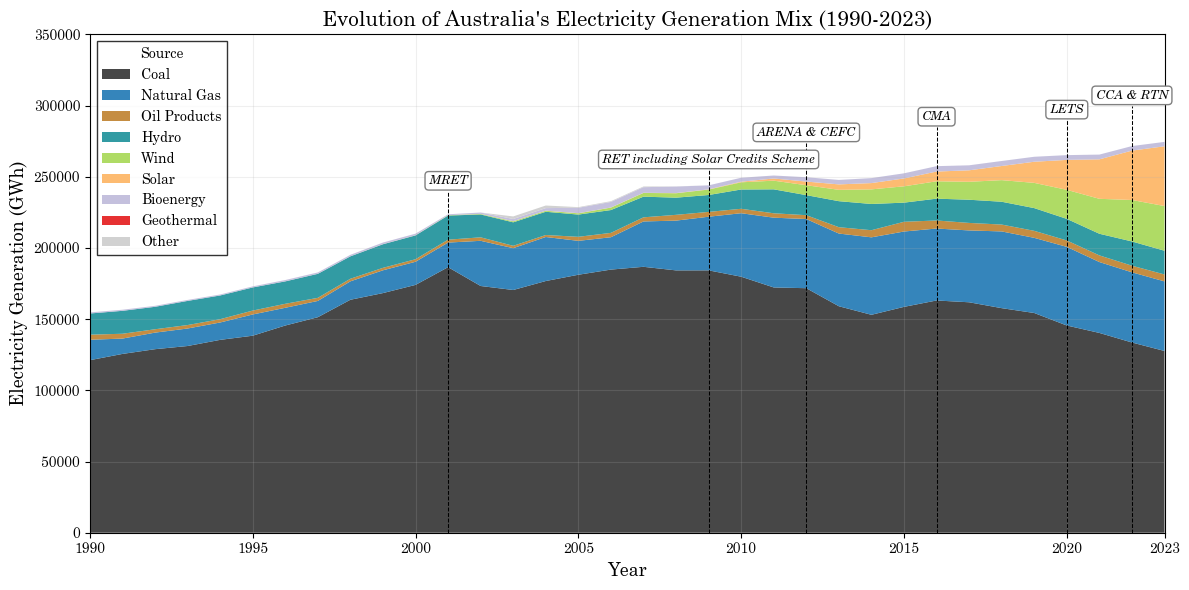

In [91]:

# Create colour palette dictionary

gen_label = list(gen_colours_dict.keys())
gen_colours = [gen_colours_dict[key]for key in gen_label]

# Plot stacked area chart
fig, ax = plt.subplots(figsize = (12,6))

ax.stackplot(generation_mix.index,
             [generation_mix[x] for x in gen_colours_dict.keys()],
             labels = gen_label,
             colors = gen_colours,
             alpha = .9,
    )

stem_heights = [240000, 255000, 274000,285000, 290000, 300000]

for year, policy, heights in zip(renewable_policies["Year"], renewable_policies["Abbreviation"], stem_heights):
    markerline, stemlines, baseline = plt.stem(year, heights, linefmt = "k--", markerfmt ="None" , basefmt = "None")
    plt.setp(stemlines, lw = 0.75)
    ax.annotate(policy, xy = (year, heights+ 11000), ha = "center",va= "top",rotation = 0, fontsize = 9, style = "italic",
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "grey", alpha = 1))

# Format chart
ax.set_title("Evolution of Australia's Electricity Generation Mix (1990-2023)", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Electricity Generation (GWh)", fontsize = 13)

ax.legend(title = "Source", loc = "upper left", fancybox = False, edgecolor = "black")

plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.grid(alpha = 0.2)

ax.set_ylim(0,350000)
ax.set_xlim(1990,2023)

plt.tight_layout()



#### 2023 Electricity Generation Mix landscape

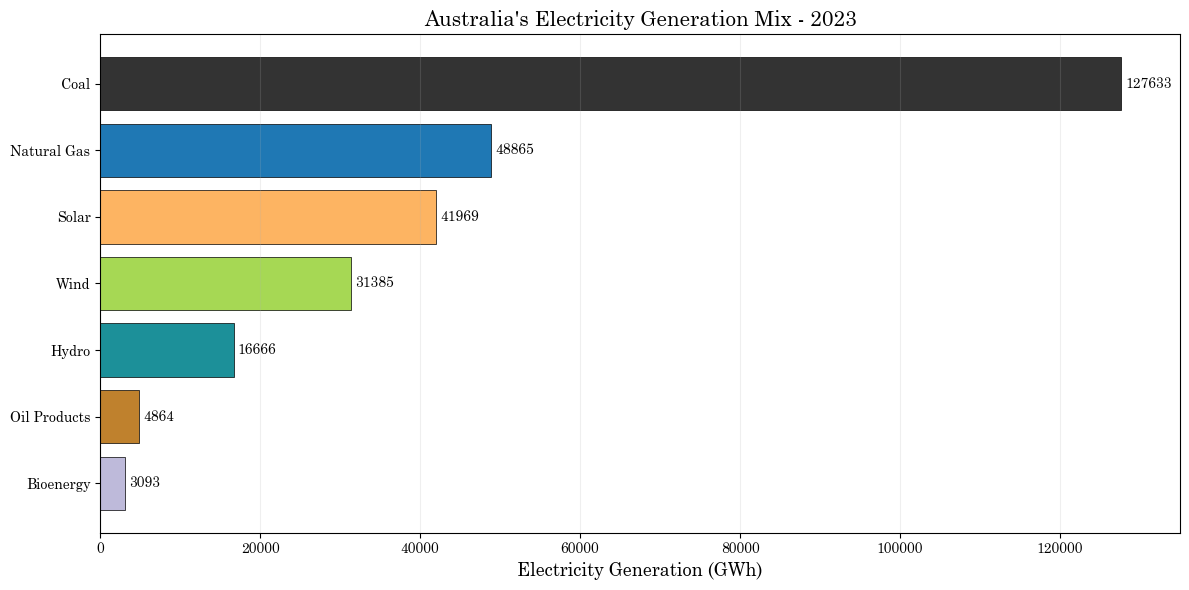

In [93]:
generation_mix_2023 = (generation_mix.T.loc[(generation_mix.loc[[2023]] >0).any(),[2023]]
                       .reset_index()
                       .rename(columns = {"index":"Source", 2023:"Electricity Generation"})
                       .sort_values(by = "Electricity Generation", ascending = True)
                      )

colours = [gen_colours_dict[i] for i in generation_mix_2023["Source"]]

fig,ax = plt.subplots(figsize = (12,6))

generation_bar = ax.barh(generation_mix_2023["Source"],
                         generation_mix_2023["Electricity Generation"], 
                         color = colours, 
                         edgecolor = "black", 
                         linewidth = 0.5
                        )

ax.bar_label(generation_bar, fmt = "%1.0f", label_type = "edge", c = "black", padding = 3
            )
#Format the graph
ax.set_title("Australia's Electricity Generation Mix - 2023", fontsize = 15)
ax.set_xlabel("Electricity Generation (GWh)", fontsize = 13)
ax.set_xlim(0, 135000)

ax.grid(axis = "x",alpha = 0.2)

plt.tight_layout()


#### Create Generation Mix by Share (Percentage) DataFrame

In [95]:
generation_perc = generation_mix.apply(lambda x: x*100/sum(x), axis = 1)
generation_perc.head()

,Bioenergy,Coal,Geothermal,Hydro,Natural Gas,Oil Products,Other,Solar,Wind
Year,,,,,,,,,
1990,0.484784,78.319802,0.0,9.618119,9.281356,2.295938,0.0,0.000000,0.000000
1991,0.491063,80.178673,0.0,10.282952,6.878716,2.168596,0.0,0.000000,0.000000
1992,0.420516,80.892310,0.0,9.896566,7.301290,1.482476,0.0,0.006841,0.000000
1993,0.409854,80.209392,0.0,10.370520,7.521120,1.480979,0.0,0.008136,0.000000
1994,0.400497,80.956710,0.0,9.952060,7.292040,1.386797,0.0,0.009504,0.002391


#### Generation Mix by Share: Stacked Area Chart

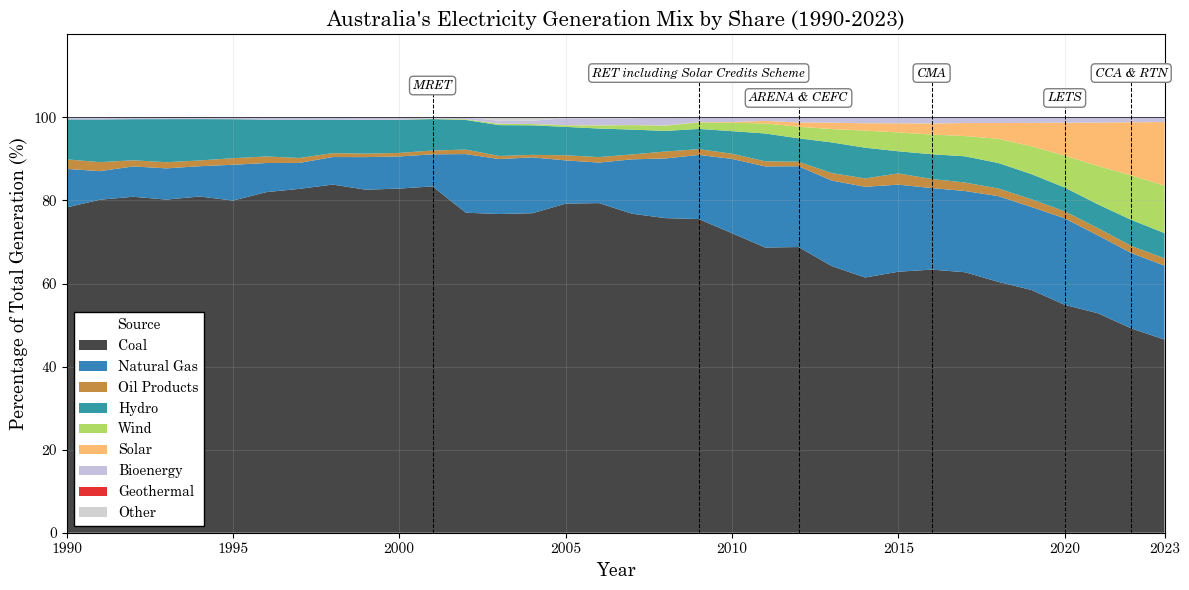

In [97]:
# Create the graph
fig, ax = plt.subplots(figsize = (12,6))

# Plot 100% stacked area chart
ax.stackplot(generation_perc.index,
            [generation_perc[x] for x in gen_colours_dict.keys()],
             labels = gen_label,
             colors = gen_colours,
             alpha = .9
             )

stem_heights = [108, 111, 105,111, 105, 111]

for year, policy, heights in zip(renewable_policies["Year"], renewable_policies["Abbreviation"], stem_heights):
    markerline, stemlines, baseline = plt.stem(year, heights, linefmt = "k--", markerfmt = "None", basefmt = "None")
    plt.setp(stemlines, lw = 0.75)
    ax.annotate(policy, xy = (year, heights+1), ha = "center",va= "top", rotation = 0, fontsize = 9, style = "italic",wrap = True,
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "grey", alpha = 1))


ax.axhline(100, color = "black", lw = .5)

# Format the chart
ax.set_title("Australia's Electricity Generation Mix by Share (1990-2023)", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Percentage of Total Generation (%)", fontsize = 13)

ax.legend(loc = "lower left", title = "Source", fancybox = False, edgecolor = "black", framealpha = 1)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
plt.yticks([0., 20., 40., 60., 80., 100.])
ax.set_xlim(1990,2023)
ax.set_ylim(top = 120)
ax.grid(alpha = 0.2)

plt.tight_layout()


#### Generation Mix by Share: Stacked Bar Chart

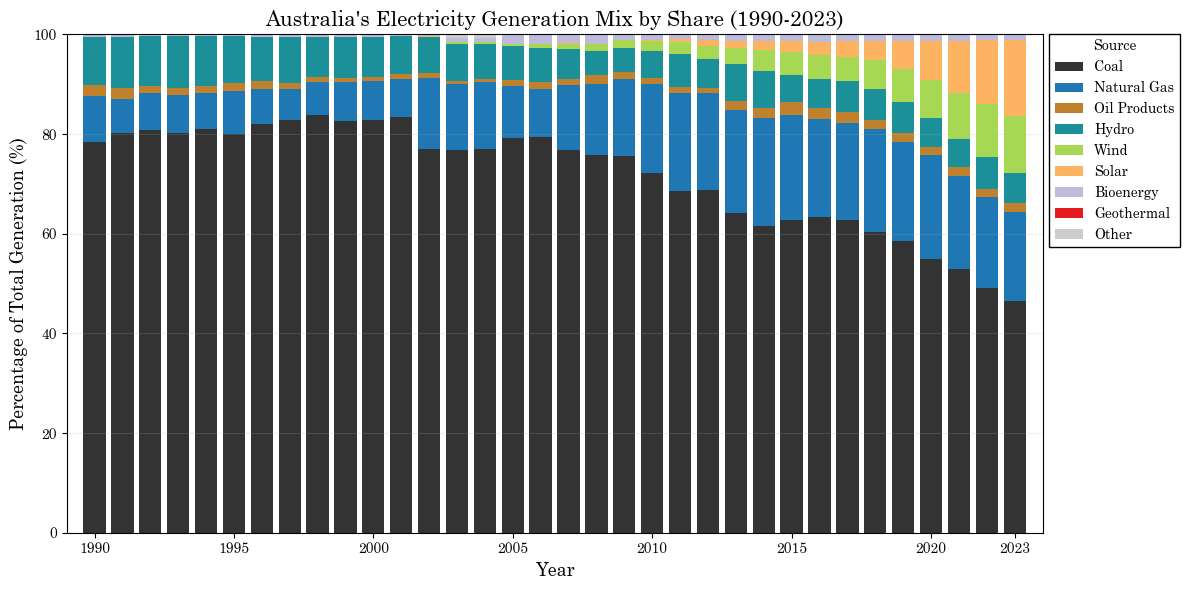

In [99]:
# Create the graph
fig,ax = plt.subplots(figsize = (12,6))

bottom = [0]*len(generation_perc.index)

# Plot 100% Stacked Bar Chart
for i, label in enumerate(gen_label):
    ax.bar(generation_perc.index,
           generation_perc[label],
           bottom = bottom,
           color = gen_colours[i],
           label = gen_label[i]
          )
    bottom = [b+s for b, s in zip(bottom, generation_perc[label])]

# Format the chart
ax.set_title("Australia's Electricity Generation Mix by Share (1990-2023)", fontsize = 15)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Percentage of Total Generation (%)", fontsize = 13)

ax.legend(bbox_to_anchor = (1.0,1.015), title = "Source", fancybox = False, edgecolor = "black", framealpha = 1)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.set_xlim(1989,2024)
ax.set_ylim(top = 100)

ax.grid(axis = "y", alpha = 0.2)

plt.tight_layout()


#### Australia's Generation Mix by Share 2023

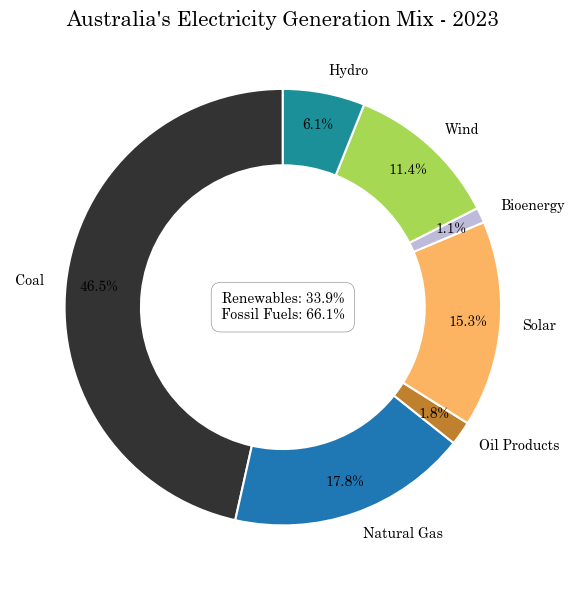

In [101]:
generation_perc_2023 = generation_perc.query("Year == 2023")

generation_perc_2023 = generation_perc_2023.loc[:,(generation_perc_2023 != 0).any(axis = 0)]
generation_perc_2023 = generation_perc_2023[["Coal", "Natural Gas","Oil Products", "Solar","Bioenergy", "Wind", "Hydro"]]

colours = [gen_colours_dict[i] for i in generation_perc_2023.columns]

fig, ax = plt.subplots(figsize = (6,6))

ax.pie(generation_perc_2023.values[0],
       labels = generation_perc_2023.columns,
       autopct = "%0.1f%%",
       startangle = 90, 
       colors = colours, 
       pctdistance = 0.85,
       wedgeprops = dict(width=0.35,linewidth = 1.5, edgecolor= "white"),
      )
ax.annotate("Renewables: 33.9%\nFossil Fuels: 66.1%", xy = (0,0), xytext = (0,0), ha = "center", va = "center", 
             bbox = dict(boxstyle = "round,pad=0.7", fc = "1", edgecolor = "grey",lw = 0.4, alpha = 1))


#Format the graph
ax.set_title("Australia's Electricity Generation Mix - 2023", fontsize = 15)

plt.tight_layout()

#### Generation Mix Report Figures

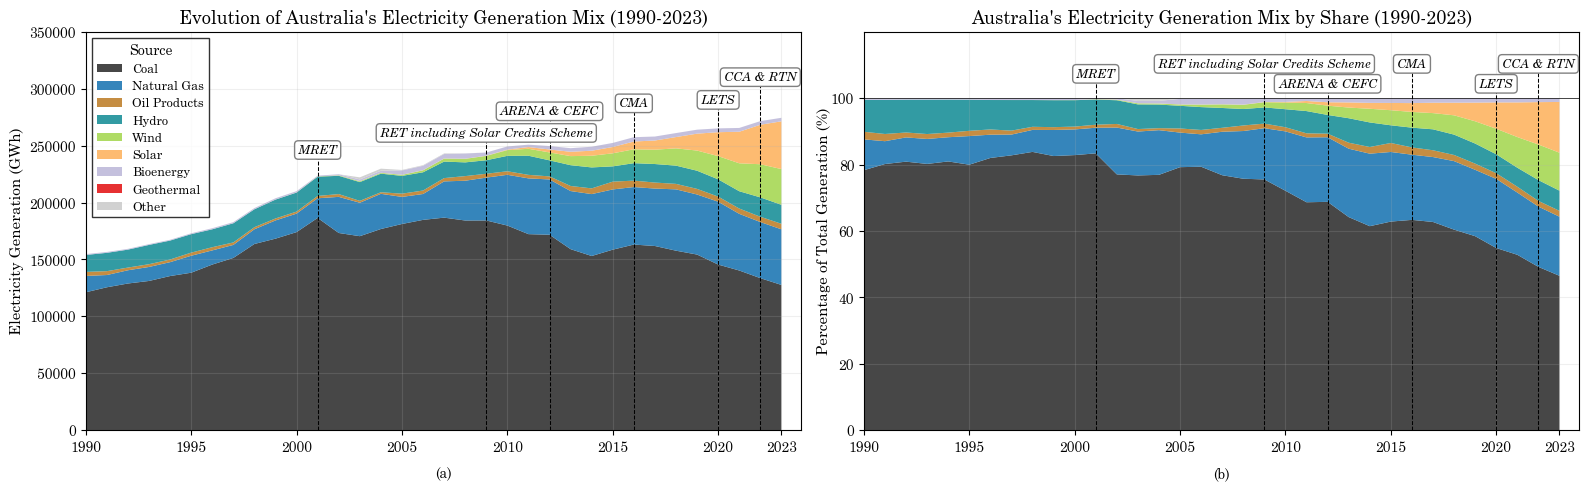

In [103]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
fig.subplots_adjust(wspace = 0)


policies = ["MRET", "RET", "Carbon Pricing "]

# Create colour palette dictionary

gen_label = list(gen_colours_dict.keys())
gen_colours = [gen_colours_dict[key]for key in gen_label]

# Plot stacked area chart

ax1.stackplot(generation_mix.index,
             [generation_mix[x] for x in gen_colours_dict.keys()],
             labels = gen_label,
             colors = gen_colours,
             alpha = .9,
             # edgecolor = "black",
             # linewidth = 0.1,
             # ls = "-"
    )

stem_heights = [240000, 255000, 274000,281000, 284000, 304000]

for year, policy, heights in zip(renewable_policies["Year"], renewable_policies["Abbreviation"], stem_heights):
    markerline, stemlines, baseline = ax1.stem(year, heights, linefmt = "k--", markerfmt ="None" , basefmt = "None")
    plt.setp(stemlines, lw = 0.75)
    ax1.annotate(policy, xy = (year, heights+ 11000), ha = "center",va= "top",rotation = 0, fontsize = 9, style = "italic",
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "grey", alpha = 1))

# Format chart
ax1.set_title("Evolution of Australia's Electricity Generation Mix (1990-2023)", fontsize = 13)
# ax1.set_xlabel("Year", fontsize = 11)
ax1.set_ylabel("Electricity Generation (GWh)", fontsize = 11)

ax1.legend(title = "Source", loc = "upper left", fancybox = False, edgecolor = "black", fontsize = 9)

ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax1.grid(alpha = 0.2)

ax1.set_ylim(0,350000)
ax1.set_xlim(1990,2023.91)



# Plot 100% stacked area chart
ax2.stackplot(generation_perc.index,
            [generation_perc[x] for x in gen_colours_dict.keys()],
             labels = gen_label,
             colors = gen_colours,
             alpha = .9
             )

stem_heights = [108, 111, 105,111, 105, 111]

for year, policy, heights in zip(renewable_policies["Year"], renewable_policies["Abbreviation"], stem_heights):
    markerline, stemlines, baseline = ax2.stem(year, heights, linefmt = "k--", markerfmt = "None", basefmt = "None")
    plt.setp(stemlines, lw = 0.75)
    ax2.annotate(policy, xy = (year, heights+1), ha = "center",va= "top", rotation = 0, fontsize = 9, style = "italic",wrap = True,
                bbox = dict(boxstyle = "round,pad=0.3", fc = "1", edgecolor = "grey", alpha = 1))


ax2.axhline(100, color = "black", lw = .5)

# Format the chart
ax2.set_title("Australia's Electricity Generation Mix by Share (1990-2023)", fontsize = 13)
# ax2.set_xlabel("Year", fontsize = 11)
ax2.set_ylabel("Percentage of Total Generation (%)", fontsize = 11, labelpad = 0)

# ax2.legend(loc = "lower left", title = "Source", fancybox = False, edgecolor = "black", framealpha = 1)
ax2.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax2.set_yticks([0., 20., 40., 60., 80., 100.])
ax2.set_xlim(1990,2023.91)
ax2.set_ylim(top = 120)
ax2.grid(alpha = 0.2)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center")


plt.tight_layout()

plt.savefig("imgs/gen_mix_evolution.png", bbox_inches = "tight")

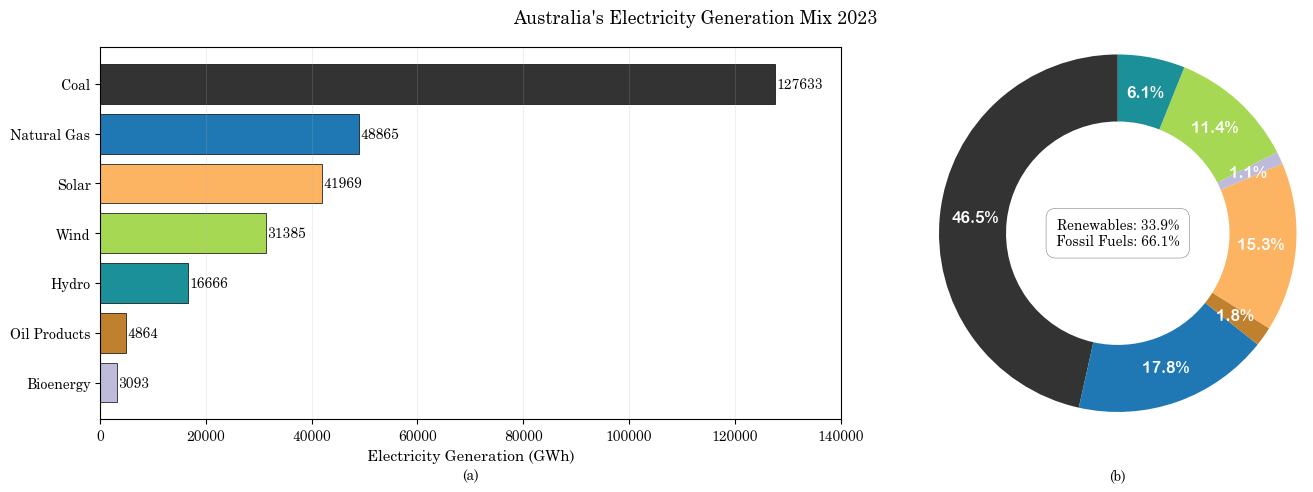

In [104]:
fig = plt.figure(figsize = (14,5))
gs = gridspec.GridSpec(nrows = 1, ncols = 12,figure = fig)

ax1 = fig.add_subplot(gs[0,:7])
ax2 = fig.add_subplot(gs[0,7:])


generation_mix_2023 = (generation_mix.T.loc[(generation_mix.loc[[2023]] >0).any(),[2023]]
                       .reset_index()
                       .rename(columns = {"index":"Source", 2023:"Electricity Generation"})
                       .sort_values(by = "Electricity Generation", ascending = True)
                      )

colours = [gen_colours_dict[i] for i in generation_mix_2023["Source"]]


generation_bar = ax1.barh(generation_mix_2023["Source"],
                         generation_mix_2023["Electricity Generation"], 
                         color = colours, 
                         edgecolor = "black", 
                         linewidth = 0.5
                        )

ax1.bar_label(generation_bar, fmt = "%1.0f", label_type = "edge", c = "black", padding = 1
             # font = "Crimson Pro"
            )

#Format the graph

ax1.set_xlabel("Electricity Generation (GWh)", fontsize = 11)
ax1.set_xlim(0, 140000)

ax1.grid(axis = "x",alpha = 0.2)

generation_perc_2023 = generation_perc.query("Year == 2023")

generation_perc_2023 = generation_perc_2023.loc[:,(generation_perc_2023 != 0).any(axis = 0)]
generation_perc_2023 = generation_perc_2023[["Coal", "Natural Gas","Oil Products", "Solar","Bioenergy", "Wind", "Hydro"]]

colours = [gen_colours_dict[i] for i in generation_perc_2023.columns]


ax2.pie(generation_perc_2023.values[0],
       # labels = generation_perc_2023.columns,
                        radius = 1.2,
                        autopct = "%0.1f%%",
                        startangle = 90, 
                        colors = colours,
                        pctdistance = 0.80,
                        textprops= {"color":"white", "fontweight":"bold", "font":"arial rounded mt bold", "fontsize":11.5},
                        wedgeprops = dict(width=0.45,linewidth = 0, edgecolor= "white"))
# _,_,autotexts
# for autotext in autotexts:
#     autotext.set_color("white")
#     autotext.set_fontweight("bold")
    
ax2.annotate("Renewables: 33.9%\nFossil Fuels: 66.1%", xy = (0,0), xytext = (0,0), ha = "center", va = "center", 
             bbox = dict(boxstyle = "round,pad=0.7", fc = "1", edgecolor = "grey",lw = 0.4, alpha = 1))


#Format the graph
# ax2.set_title("Australia's Electricity Generation Mix - 2023", fontsize = 13)

plt.suptitle("Australia's Electricity Generation Mix 2023", fontsize = 13)

ax1.text(0.5,-0.16,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.16,"(b)",transform=ax2.transAxes,ha = "center")

plt.tight_layout()

plt.savefig("imgs/generation_mix_2023.png", 
            bbox_inches = "tight"
           )

#### Generation Mix Analysis

In [106]:
generation_mix.head()

,Bioenergy,Coal,Geothermal,Hydro,Natural Gas,Oil Products,Other,Solar,Wind
Year,,,,,,,,,
1990,750.0,121167.0,0.0,14880.0,14359.0,3552.0,0.0,0.0,0.0
1991,769.0,125559.0,0.0,16103.0,10772.0,3396.0,0.0,0.0,0.0
1992,670.0,128884.1,0.0,15768.0,11633.0,2362.0,0.0,10.9,0.0
1993,670.0,131120.7,0.0,16953.0,12295.0,2421.0,0.0,13.3,0.0
1994,670.0,135434.1,0.0,16649.0,12199.0,2320.0,0.0,15.9,4.0


##### Total Historical Electricity Generation by source (1990-2023)

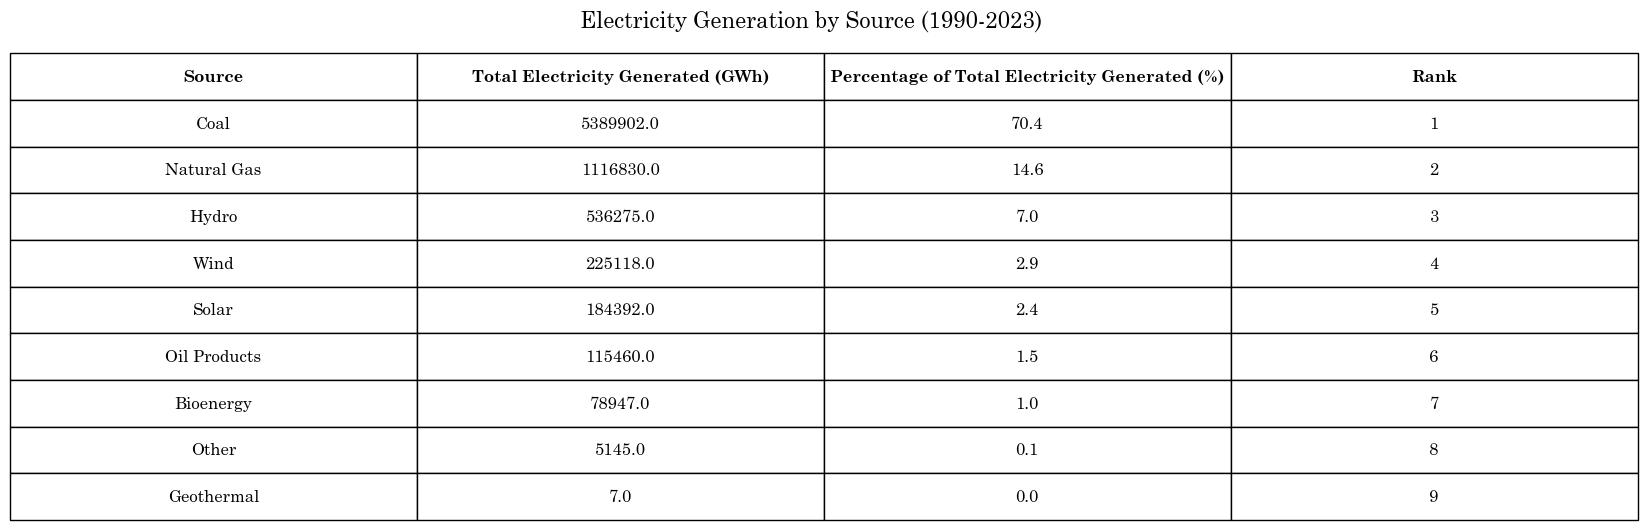

In [108]:
generation_mix_sum = pd.DataFrame(generation_mix.sum(axis = 0).round().sort_values(ascending = False))
generation_mix_sum = generation_mix_sum.rename(columns = {0:"Total Electricity Generated (GWh)"})
generation_mix_sum["Percentage of Total Electricity Generated (%)"] = round(100*(generation_mix_sum["Total Electricity Generated (GWh)"]/(generation_mix_sum.sum().values[0])),1)
generation_mix_sum["Rank"] = (generation_mix_sum["Total Electricity Generated (GWh)"].rank(ascending = False)).astype("Int64")

# Convert generation_mix_sum dataframe to a table
generation_mix_sum_table = generation_mix_sum.reset_index().rename(columns= {"index": "Source"})

# # Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5)) # Adjust figsize as needed

# Hide the axes
ax.axis("off")
ax.axis("tight")
plt.suptitle("Electricity Generation by Source (1990-2023)", fontsize = 16, va = "top", ha = "center", x = .5, y = 1.05)

# Create the table
table = ax.table(cellText=generation_mix_sum_table.values,
                 colLabels=generation_mix_sum_table.columns,
                 loc="center",
                 cellLoc="center")

# Adjust cell properties 
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.1,2.8)

# Make header bold
for (r,c), cell in table.get_celld().items():
    if r == 0:
        cell.set_text_props(fontweight = "bold")

# plt.tight_layout()
# Save the table as an image
plt.savefig("imgs/electricity_generation_summary_table.png", bbox_inches="tight")

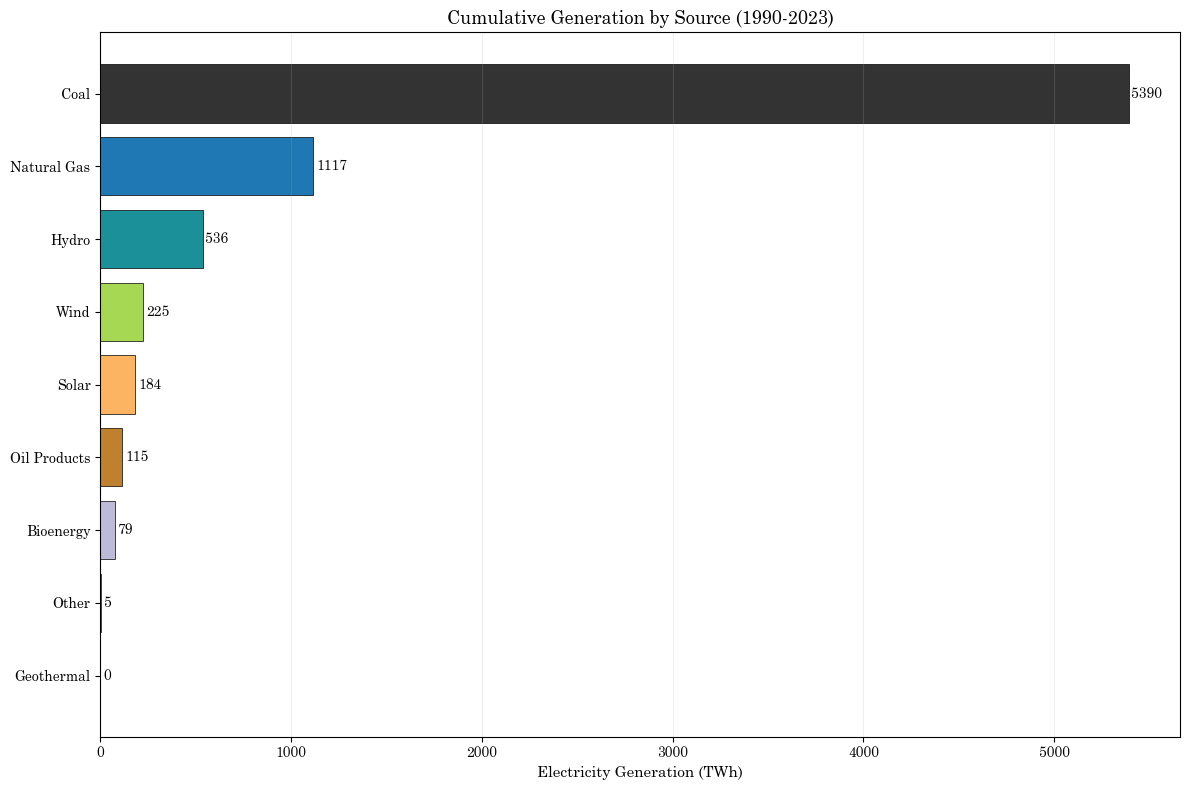

In [109]:
fig,ax = plt.subplots(figsize = (12,8))
generation_mix_sum_bar = ax.barh(generation_mix_sum.index[::-1],
        generation_mix_sum["Total Electricity Generated (GWh)"][::-1]/1000,
        color = [gen_colours_dict[i] for i in generation_mix_sum.index[::-1]],
        edgecolor = "black", 
        linewidth = 0.5
       )
ax.bar_label(generation_mix_sum_bar, fmt = "%1.0f", label_type = "edge", c = "black", padding = 2
            )
ax.set_title("Cumulative Generation by Source (1990-2023)", fontsize = 13)
ax.set_xlabel("Electricity Generation (TWh)", fontsize = 11)
ax.grid(axis ="x", alpha = 0.2)
plt.tight_layout()

##### Plots of Electricity Generation and Percentage share for each Source (1990-2023)

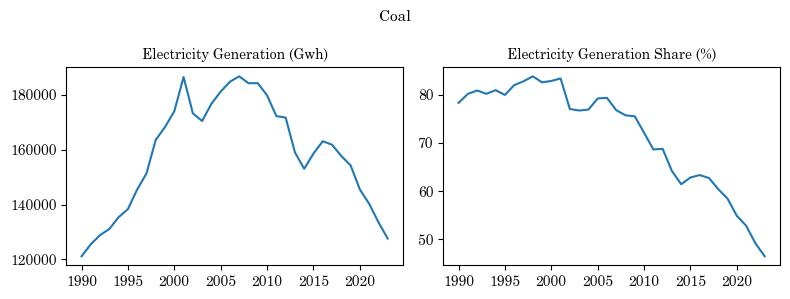

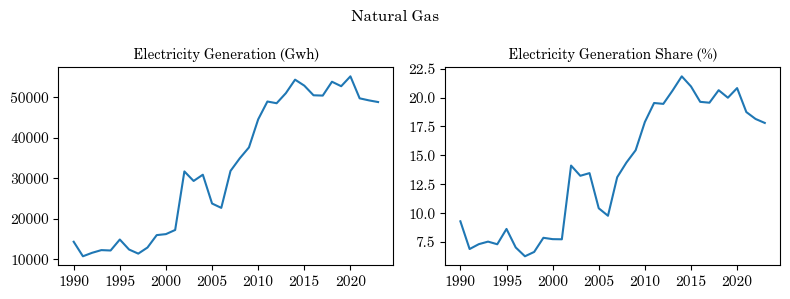

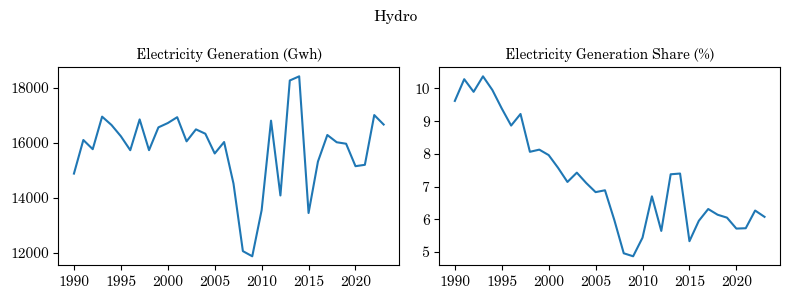

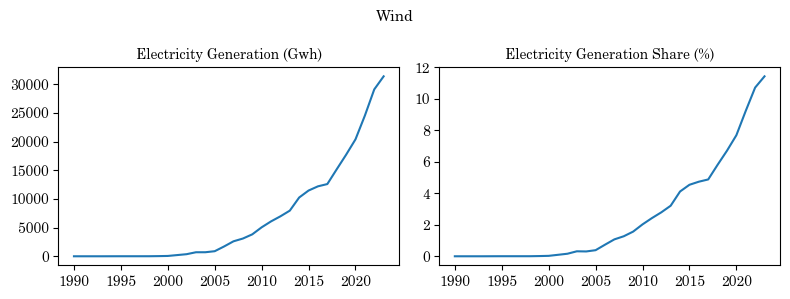

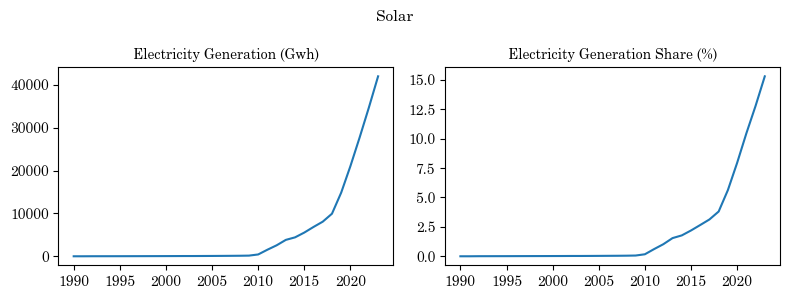

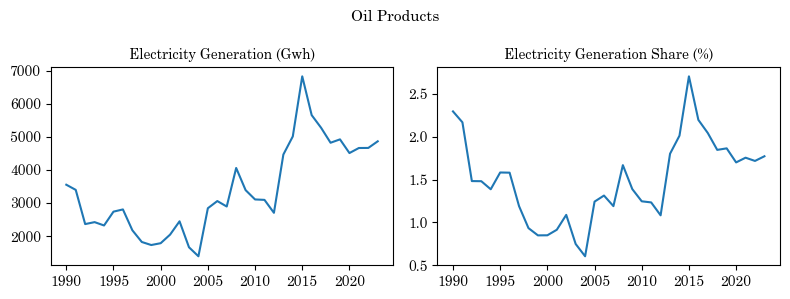

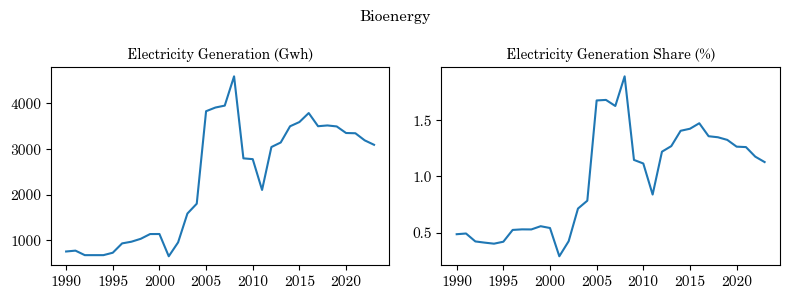

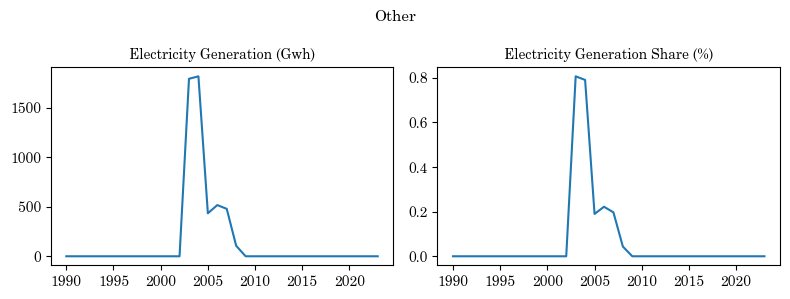

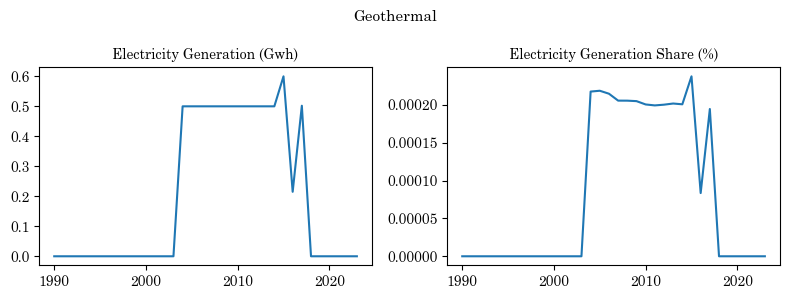

In [111]:
for i in generation_mix_sum.index:
    fig,(ax1,ax2) = plt.subplots(1,2, figsize = (8,3))
    ax1.plot(generation_mix[i])
    ax2.plot(generation_perc[i])
    fig.suptitle(f"{i}", fontsize = 11)
    ax1.set_title("Electricity Generation (Gwh)", fontsize = 10)
    ax2.set_title("Electricity Generation Share (%)", fontsize = 10)
    plt.tight_layout()

    plt.show()

##### Generation Statistics DataFrame

In [113]:
generation_rank = generation_mix_sum["Rank"]
generation_hist_perc = generation_mix_sum["Percentage of Total Electricity Generated (%)"]
generation_1990 = generation_mix.loc[1990]
generation_2023 = generation_mix.loc[2023]
generation_max = generation_mix.max()
generation_max_year = generation_mix.idxmax()
generation_min = generation_mix.min()
generation_min_year = generation_mix.idxmin()
generation_1990_2023 = generation_2023 - generation_1990
generation_1990_2023_perc = 100*(generation_1990_2023/generation_1990)
generation_1990_max_year = generation_max - generation_1990
generation_1990_max_year_perc =100*(generation_1990_max_year/generation_1990)
generation_max_year_2023 = generation_2023-generation_max
generation_max_year_2023_perc = 100*(generation_max_year_2023/generation_max)

generation_avg = generation_mix.mean()

generation_share_1990 = generation_perc.loc[1990]
generation_share_2023 = generation_perc.loc[2023]
generation_share_max = generation_perc.max()
generation_share_max_year = generation_perc.idxmax()
generation_share_min = generation_perc.min()
generation_share_min_year = generation_perc.idxmin()
generation_share_1990_2023 = generation_share_2023 - generation_share_1990
generation_share_1990_2023_perc = 100*(generation_share_1990_2023/generation_share_1990)
generation_share_1990_max_year = generation_share_max - generation_share_1990
generation_share_1990_max_year_perc =100*(generation_share_1990_max_year/generation_share_1990)
generation_share_max_year_2023 = generation_share_2023-generation_share_max
generation_share_max_year_2023_perc = 100*(generation_share_max_year_2023/generation_share_max)

generation_share_avg = generation_perc.mean()


generation_mix_stats = pd.DataFrame({
    "Historical rank" : generation_rank,
    "Historical %" : generation_hist_perc,
    "1990": generation_1990.round(),
    "2023": generation_2023.round(),
    "Max" : generation_max.round(),
    "Max Year": generation_max_year.round(),
    "Min": generation_min.round(),
    "Min Year": generation_min_year.round(),
    "1990 to 2023 ": generation_1990_2023.round(),
    "1990 to 2023 % change": generation_1990_2023_perc.round(1),
    "1990 to max year" : generation_1990_max_year.round(),
    "1990 to max year %" : generation_1990_max_year_perc.round(1),
    "Max year to 2023" : generation_max_year_2023.round(),
    "Max year to 2023 %" : generation_max_year_2023_perc.round(1),
    "Average generation": generation_avg.round(),

    "1990 share": generation_share_1990.round(1),
    "2023 share": generation_share_2023.round(1),
    "Max share" : generation_share_max.round(1),
    "Max share Year": generation_share_max_year.round(),
    "Min share": generation_share_min.round(1),
    "Min share Year": generation_share_min_year.round(),
    "1990 to 2023 share ": generation_share_1990_2023.round(1),
    "1990 to 2023 % share change": generation_share_1990_2023_perc.round(1),
    "1990 to max share year" : generation_share_1990_max_year.round(1),
    "1990 to max share year %" : generation_share_1990_max_year_perc.round(1),
    "Max share year to 2023" : generation_share_max_year_2023.round(1),
    "Max share year to 2023 %" : generation_share_max_year_2023_perc.round(1),
    "Average generation share": generation_share_avg.round(1)
})

generation_mix_stats = generation_mix_stats.T

generation_mix_stats

,Bioenergy,Coal,Geothermal,Hydro,Natural Gas,Oil Products,Other,Solar,Wind
Historical rank,7,1,9,3,2,6,8,5,4
Historical %,1.0,70.4,0.0,7.0,14.6,1.5,0.1,2.4,2.9
1990,750.0,121167.0,0.0,14880.0,14359.0,3552.0,0.0,0.0,0.0
2023,3093.0,127633.0,0.0,16666.0,48865.0,4864.0,0.0,41969.0,31385.0
Max,4596.0,186744.0,1.0,18421.0,55216.0,6828.0,1817.0,41969.0,31385.0
Max Year,2008,2007,2015,2014,2020,2015,2004,2023,2023
Min,645.0,121167.0,0.0,11869.0,10772.0,1389.0,0.0,0.0,0.0
Min Year,2001,1990,1990,2009,1991,2004,1990,1990,1990
1990 to 2023,2343.0,6466.0,0.0,1786.0,34506.0,1312.0,0.0,41969.0,31385.0
1990 to 2023 % change,312.4,5.3,NaN,12.0,240.3,36.9,NaN,inf,inf


###### Further Hydro Analysis

In [115]:
display(generation_mix["Hydro"].head())
display(generation_perc["Hydro"].head())

Year
1990    14880.0
1991    16103.0
1992    15768.0
1993    16953.0
1994    16649.0
Name: Hydro, dtype: float64

Year
1990     9.618119
1991    10.282952
1992     9.896566
1993    10.370520
1994     9.952060
Name: Hydro, dtype: float64

 Hydro percentage change in generation between 1990 and 2009: -20.2%


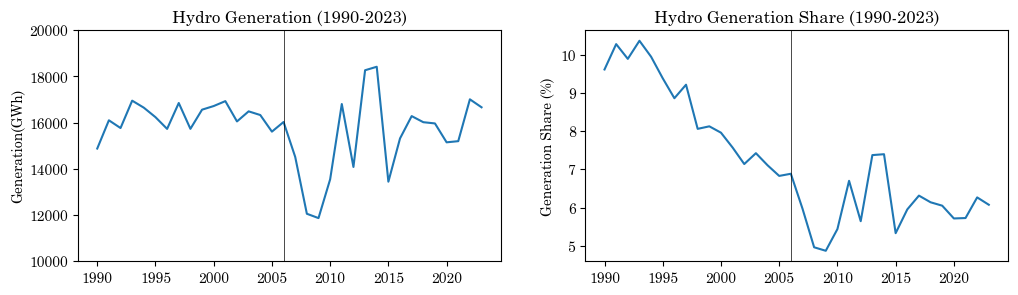

In [116]:
fig,(ax1,ax2)= plt.subplots(1,2, figsize = (12,3))
ax1.plot(generation_mix["Hydro"])
ax1.axvline(2006, c = "black",lw = 0.5)
ax1.set_title("Hydro Generation (1990-2023)")
ax1.set_ylabel("Generation(GWh)")
ax1.set_ylim(10_000,20_000)


ax2.plot(generation_perc["Hydro"])
ax2.axvline(2006, c = "black",lw = 0.5)
ax2.set_title("Hydro Generation Share (1990-2023)")
ax2.set_ylabel("Generation Share (%)")

# Calculate hydro percentage change between 1990 and 2009
hydro_decline_1990_2009 = 100*(generation_mix.loc[2009,"Hydro"] - generation_mix.loc[1990,"Hydro"])/generation_mix.loc[1990,"Hydro"]

print(f" Hydro percentage change in generation between 1990 and 2009: {hydro_decline_1990_2009.round(1)}%")



##### Comparing Hydropower Generation to Wind and Solar Electricity Generation

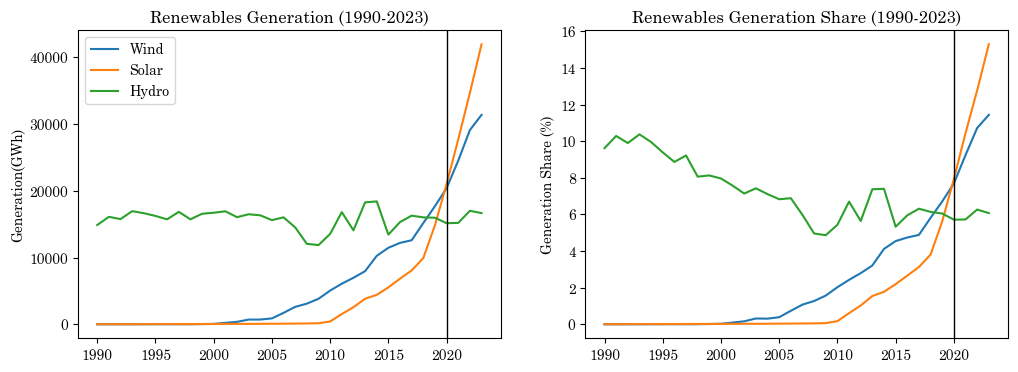

In [118]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

ax1.plot(generation_mix[["Wind", "Solar", "Hydro"]],
        label = generation_mix[["Wind", "Solar", "Hydro"]].columns
       )
ax1.set_title("Renewables Generation (1990-2023)")
ax1.set_ylabel("Generation(GWh)")
ax1.legend()

ax2.plot(generation_perc[["Wind", "Solar", "Hydro"]],
        label = generation_perc[["Wind", "Solar", "Hydro"]].columns
       )
ax2.set_title("Renewables Generation Share (1990-2023)")
ax2.set_ylabel("Generation Share (%)")

ax1.axvline(2020, lw = 1, c = "k")
ax2.axvline(2020, lw = 1, c = "k")


It has been noted that Hydro's electricity generation has been fairly stable through Australia's history (1990 to 2023) whereas Wind and Solar generation has been increasing.
Thus for further analysis, the focus will be on Wind and Solar electricity generation.

#### Growth of Wind and Solar

##### Create the Wind and Solar Dataframe

In [122]:

wind_solar = energy_mix[["Wind", "Solar"]]

wind_solar.head()

,Wind,Solar
Year,,
1990,0.0,0.0
1991,0.0,0.0
1992,0.0,10.9
1993,0.0,13.3
1994,4.0,15.9


##### Growth of Wind and Solar Generation: Multi-line chart

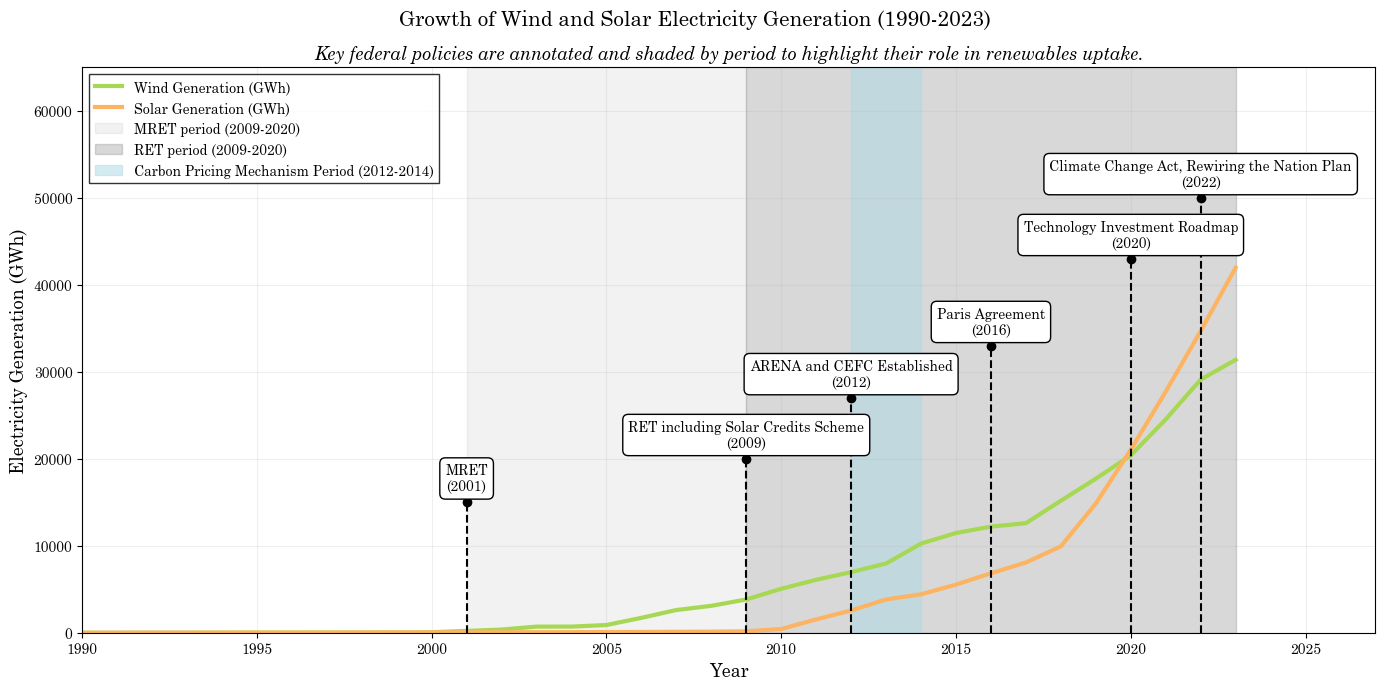

In [124]:
r_height = [15000,20000,27000,33000,43000,50000,57000]
# Create the plot
fig,ax = plt.subplots(figsize = (14,7))

# Plot wind and solar using the colour dictionary
for i in wind_solar.columns:
    if i in gen_colours_dict.keys():
        ax.plot(wind_solar.index,
                wind_solar[i],
                color = gen_colours_dict[i],
                label = f"{i} Generation (GWh)",
                lw = 3.0
               )
# Draw stemlines and annotate with policies
for year, policy, height in zip(r_year, r_policy, r_height):
    markerlines, stemline, baseline = plt.stem(year, height, linefmt = "k--", basefmt = "None", markerfmt = "o")  
    ax.annotate(f"{policy}\n({year})", xy = (year, height+1000), ha = "center", va = "bottom",fontsize = 10,  
                bbox = dict(boxstyle = "round, pad=0.4", fc = "1")
               )
# Shading
ax.axvspan(2001, 2009, color = "grey",alpha = 0.1, label = "MRET period (2009-2020)")
ax.axvspan(2009, 2023, color = "grey",alpha = 0.3, label = "RET period (2009-2020)")
ax.axvspan(2012, 2014, color = "#ADD8E6",alpha = 0.5, label = "Carbon Pricing Mechanism Period (2012-2014)")

# Format the graph
plt.suptitle("Growth of Wind and Solar Electricity Generation (1990-2023)", fontsize = 15)
ax.set_title("Key federal policies are annotated and shaded by period to highlight their role in renewables uptake.", fontsize = 13, style = "italic")
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Electricity Generation (GWh)", fontsize = 13)

ax.legend(loc = "upper left", fancybox = False, edgecolor = "black")
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020.,2025.])

ax.set_ylim(0,65000)
ax.set_xlim(1990,2027)
ax.grid(alpha = 0.2)

plt.tight_layout()

plt.savefig("imgs/wind_solar_1990_2023.png", 
            bbox_inches = "tight"
           )

##### Wind and Solar Year on Year Growth

In [126]:
# Calculate the yoy growth in wind and solar generation
wind_solar_yoy = wind_solar.diff().fillna(0)

wind_solar_yoy.head()

,Wind,Solar
Year,,
1990,0.0,0.0
1991,0.0,0.0
1992,0.0,10.9
1993,0.0,2.4
1994,4.0,2.6


In [127]:
# Filter the dataset to the time period highlighting significant growth

wind_solar_2000_2023 = wind_solar_yoy.query("Year >= 2000")

wind_solar_2000_2023.head()

,Wind,Solar
Year,,
2000,30.0,5.8
2001,152.0,6.5
2002,154.0,8.3
2003,339.1,0.0
2004,1.9,9.8


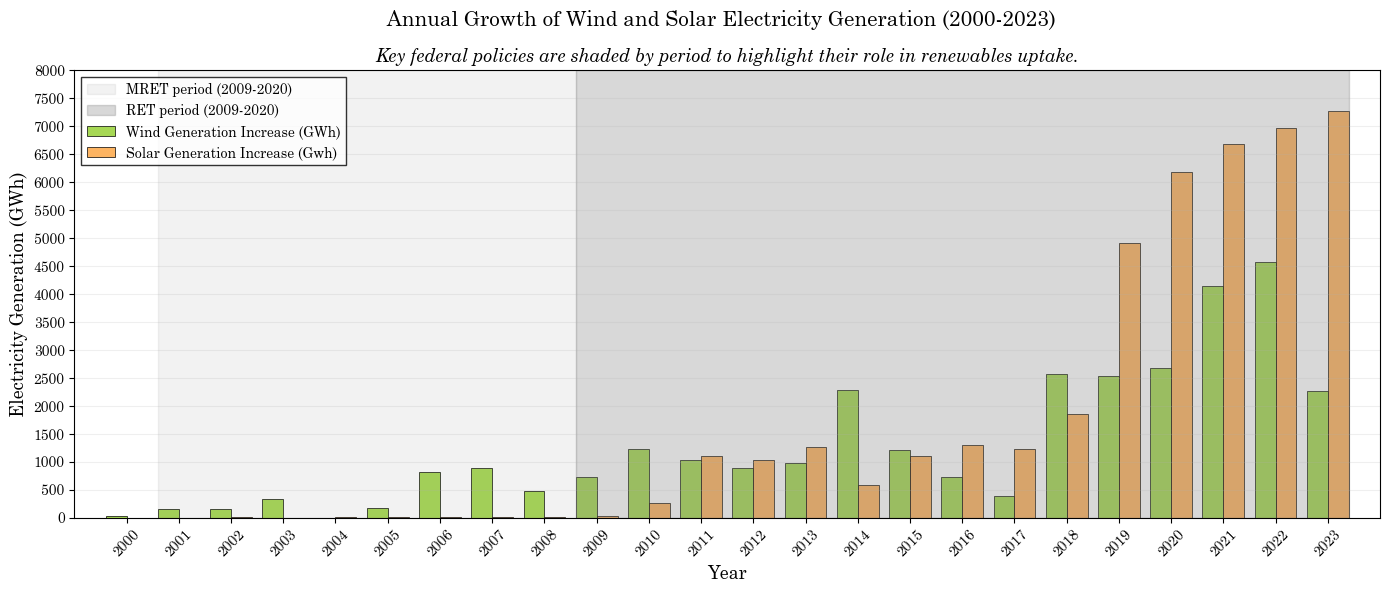

In [128]:
# Create the graph 

fig, ax = plt.subplots(figsize = (14,6))

width = 0.4
x = np.arange(len(wind_solar_2000_2023.index))


# Plot the graph
wind_bar = ax.bar(x - width/2,
                  wind_solar_2000_2023["Wind"],
                  width = width,
                  label = "Wind Generation Increase (GWh)",
                  color = gen_colours_dict["Wind"],
                  edgecolor = "black",
                  linewidth = .5
       )

solar_bar = ax.bar(x + width/2,
                   wind_solar_2000_2023["Solar"],
                   width = width,
                   label = "Solar Generation Increase (Gwh)",
                   color = gen_colours_dict["Solar"],  
                   edgecolor = "black",
                   linewidth = .5
       )
ax.axvspan(0.6, 8.6, color = "grey",alpha = 0.1, label = "MRET period (2009-2020)")
ax.axvspan(8.6, 23.4, color = "grey",alpha = 0.3, label = "RET period (2009-2020)")

# Format the graph
plt.suptitle("         Annual Growth of Wind and Solar Electricity Generation (2000-2023)", fontsize = 15)
ax.set_title("Key federal policies are shaded by period to highlight their role in renewables uptake.", fontsize = 13, style = "italic")

ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Electricity Generation (GWh)", fontsize = 13)

ax.set_xlim(-1,24)
ax.set_xticks(x)
ax.set_yticks(np.arange(0,8500,500))
ax.set_xticklabels(wind_solar_2000_2023.index, rotation = 45)


ax.legend(loc = "upper left", fancybox = False, edgecolor = "black")
ax.grid(axis = "y",alpha = 0.2)


plt.tight_layout()

plt.savefig("imgs/wind_solar_2000_2023.png", bbox_inches = "tight")


##### Large-scale versus Small-scale Solar 

In [130]:
energy_mix_df[["Large-scale Solar PV","Small-scale solar PV"]].head()

,Large-scale Solar PV,Small-scale solar PV
Year,,
1990,0.0,0.0
1991,0.0,0.0
1992,0.0,10.9
1993,0.0,13.3
1994,0.0,15.9


In [131]:
# Calculate total solar electricity generation between 1990-2023
total_solar = energy_mix_df[["Large-scale Solar PV","Small-scale solar PV"]].sum().sum()

total_solar.round(2)

184391.84

In [132]:
# Calculate percentage of total solar electricity generation that large scale solar accounted for between 1990 to 2023
large_scale_solar_perc = 100*energy_mix_df["Large-scale Solar PV"].sum()/total_solar

large_scale_solar_perc.round(1)

27.9

In [133]:
# Calculate percentage of total solar electricity generation that large scale solar accounted for between 1990 to 2023
small_scale_solar_perc = 100*energy_mix_df["Small-scale solar PV"].sum()/total_solar

small_scale_solar_perc.round(1)

72.1

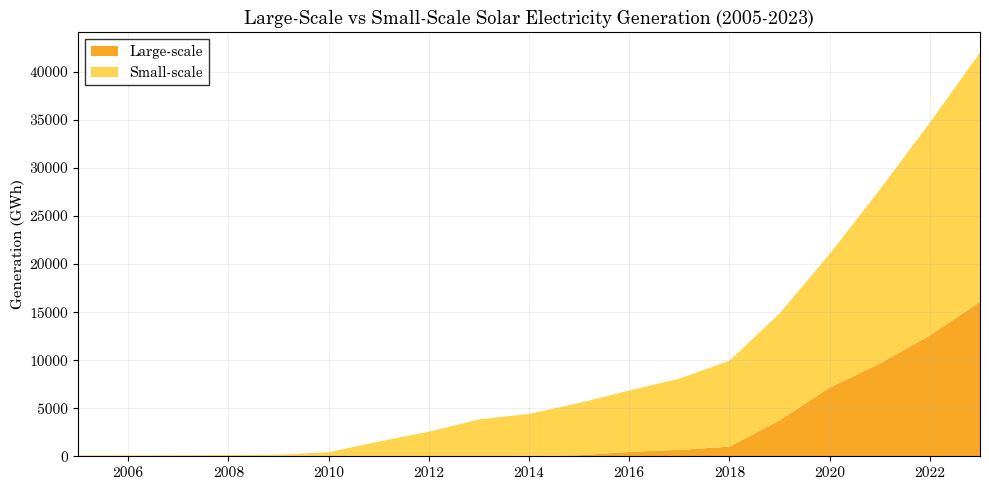

In [134]:
fig,ax = plt.subplots(figsize = (10,5))

ax.stackplot(energy_mix_df.index,energy_mix_df["Large-scale Solar PV"],
             energy_mix_df["Small-scale solar PV"],
             labels = ["Large-scale","Small-scale"], 
             colors = ["#F9A825","#FFD54F"]
            )

ax.set_title("Large-Scale vs Small-Scale Solar Electricity Generation (2005-2023)", fontsize = 13)
ax.set_ylabel("Generation (GWh)", fontsize = 11)

ax.legend(loc = "upper left", fancybox = False, edgecolor = "black")

ax.set_xlim(2005,2023)
# ax.set_ylim(0,45000)

ax.grid(alpha = 0.2)

plt.tight_layout()

plt.savefig("imgs/large_vs_small_scale_solar.png", bbox_inches = "tight")

## Economic Growth vs. Emissions

Is there evidence of decoupling between economic growth and emissions?

In [136]:
emissions.head()

,Electricity,Agriculture,Stationary Energy,Transport,Fugitives,Industrial Processes,Waste,LULUCF,Total Emissions
Year,,,,,,,,,
1990,129.53,94.96,66.17,61.37,40.31,25.11,23.46,178.27,619.18
1991,131.68,94.38,66.95,60.80,39.66,24.31,23.38,157.77,598.93
1992,134.54,91.51,67.47,61.81,41.60,24.89,23.12,113.48,558.42
1993,135.46,88.87,69.37,63.38,40.43,24.64,22.93,92.16,537.24
1994,137.03,88.78,69.35,64.87,38.25,24.89,22.16,81.79,527.12


In [137]:
economics.head()

,Population,GDP,Energy Consumption,Energy Consumption Per Capita,Energy Intensity,Energy Productivity
Year,,,,,,
1990,17065128,925958,3945.9,231.226,4261.424,234.663
1991,17284036,922422,3949.9,228.529,4282.096,233.530
1992,17478635,926367,3982.7,227.861,4299.268,232.598
1993,17634808,963840,4081.8,231.463,4234.935,236.131
1994,17805468,1002198,4181.9,234.866,4172.728,239.651


In [138]:
# Merge the economics and emissions dataframe
merged_df = economics.merge(emissions, how  = "left", left_on= "Year", right_on= "Year")

econ_df = merged_df.loc[:,["Population", "GDP", "Total Emissions"]]

econ_df.head()

,Population,GDP,Total Emissions
Year,,,
1990,17065128,925958,619.18
1991,17284036,922422,598.93
1992,17478635,926367,558.42
1993,17634808,963840,537.24
1994,17805468,1002198,527.12


### GDP Chain Volume Measures vs. Total CO2 Emissions

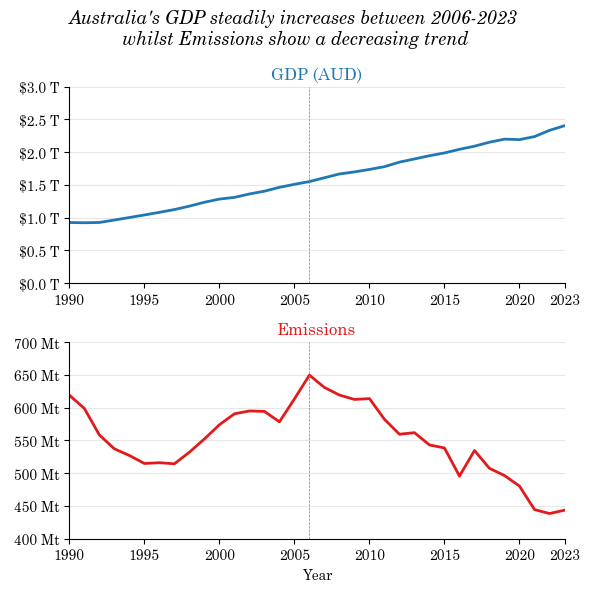

In [140]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (6,6), sharex = False) 

# Plot
ax1.plot(econ_df["GDP"]/1_000_000,
       label = "GDP", 
       color = "#1f78b4",
       lw = 2)

ax2.plot(econ_df["Total Emissions"],
         label = "CO2 Emissions", 
         color = "#e31a1c",
         lw = 2
        )

# Maximum emissions line
ax1.axvline(2006, c = "grey", ls = "--", lw = 0.5)
ax2.axvline(2006, c = "grey", ls = "--", lw = 0.5)

# Format
# plt.suptitle("GDP (Chain Volume) vs. Total CO$_2$ Emissions (1990-2023)",  y = 1.0, fontsize = 13)
plt.suptitle("Australia's GDP steadily increases between 2006-2023 \nwhilst Emissions show a decreasing trend",  y =0.98,  fontsize = 13, fontstyle = "italic")
# The 2006-2023 time period shows a steady increase in Australia's GDP, whilst Emissions follow a decreasing trend. 
# Emissions follow a decreasing trend whislt GDP continues to rise.

ax1.set_title("GDP (AUD)", color = "#1f78b4")
ax1.set_xlim(1990,2023)
ax1.set_ylim(0,3)
ax1.yaxis.set_major_formatter("${x} T")
ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
# ax1.grid(axis = "x",alpha = 0.3)
ax1.grid(axis = "y",alpha = 0.3)
ax1.spines[["top", "right"]].set_visible(False)


ax2.set_title("Emissions" ,color = "#e31a1c")
ax2.set_xlabel("Year", fontsize = 10)

ax2.set_xlim(1990,2023)
ax2.set_ylim(400,700)
ax2.yaxis.set_major_formatter("{x: 1.0f} Mt")
ax2.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
# ax2.grid(axis = "x",alpha = 0.3)
ax2.grid(axis = "y",alpha = 0.3)
ax2.spines[["top", "right"]].set_visible(False)

plt.tight_layout()

# plt.savefig("imgs/gdp_vs_emissions.png")

### GDP (Chain Volume Measures) Per Capita vs Emissions per Capita

In [142]:

# Calculate GDP and Emissions Per Capita
econ_df["GDP Per Capita"] = (econ_df["GDP"]*1e6)/econ_df["Population"]
econ_df["Emissions Per Capita"] = (econ_df["Total Emissions"]* 1e6)/econ_df["Population"]


econ_df.tail()

,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita
Year,,,,,
2019,25334826,2198775,496.49,86788.636322,19.597135
2020,25649248,2191416,480.33,85437.826481,18.726865
2021,25685412,2237695,444.52,87119.295575,17.306322
2022,26014399,2333221,438.40,89689.598441,16.852206
2023,26658948,2403614,443.57,90161.622282,16.638691


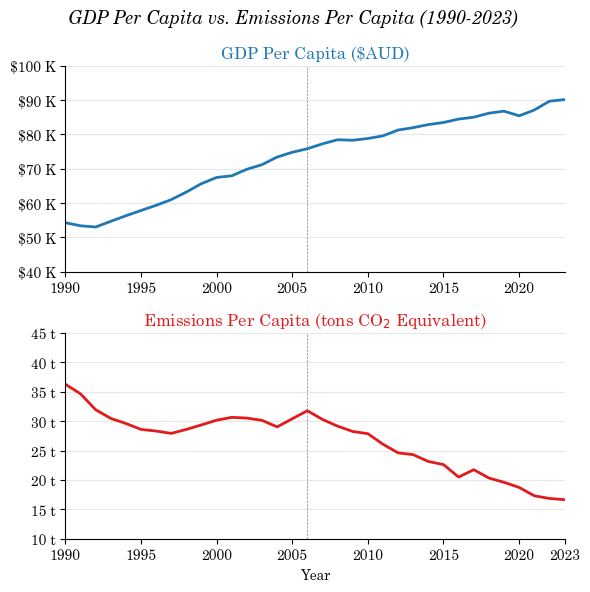

In [143]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (6,6), sharex = False) 

# Plot
ax1.plot(econ_df["GDP Per Capita"]/1000,
       label = "GDP Per Capita", 
       color = "#1f78b4",
       lw = 2)

ax2.plot(econ_df["Emissions Per Capita"],
         label = "Emissions Per Capita", 
         color = "#e31a1c",
         lw = 2
        )

# Maximum emissions per capita line
ax1.axvline(2006, c = "grey", ls = "--", lw = 0.5)
ax2.axvline(2006, c = "grey", ls = "--", lw = 0.5)

# Format
plt.suptitle("GDP Per Capita vs. Emissions Per Capita (1990-2023) ",  y = 0.98, fontsize = 13, fontstyle = "italic", ha = "center")

ax1.set_title("GDP Per Capita ($AUD)", color = "#1f78b4")
ax1.set_xlim(1990,2023)
ax1.set_ylim(40,100)
ax1.grid(axis = "y",alpha = 0.3)
ax1.yaxis.set_major_formatter("${x:1.0f} K")
ax1.spines[["top", "right"]].set_visible(False)


ax2.set_title("Emissions Per Capita (tons CO$_2$ Equivalent)", color = "#e31a1c")
ax2.set_xlabel("Year", fontsize = 10)

ax2.set_xlim(1990,2023)
ax2.set_ylim(10,45)
ax2.grid(axis = "y",alpha = 0.3)
ax2.yaxis.set_major_formatter("{x: 1.0f} t")
ax2.spines[["top", "right"]].set_visible(False)

plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])

plt.tight_layout()

# plt.savefig("imgs/gdp_vs_emissions_per_capita.png")

### GDP, GDP Per Capita, Emissions, Emissions Per Capita Report Figure

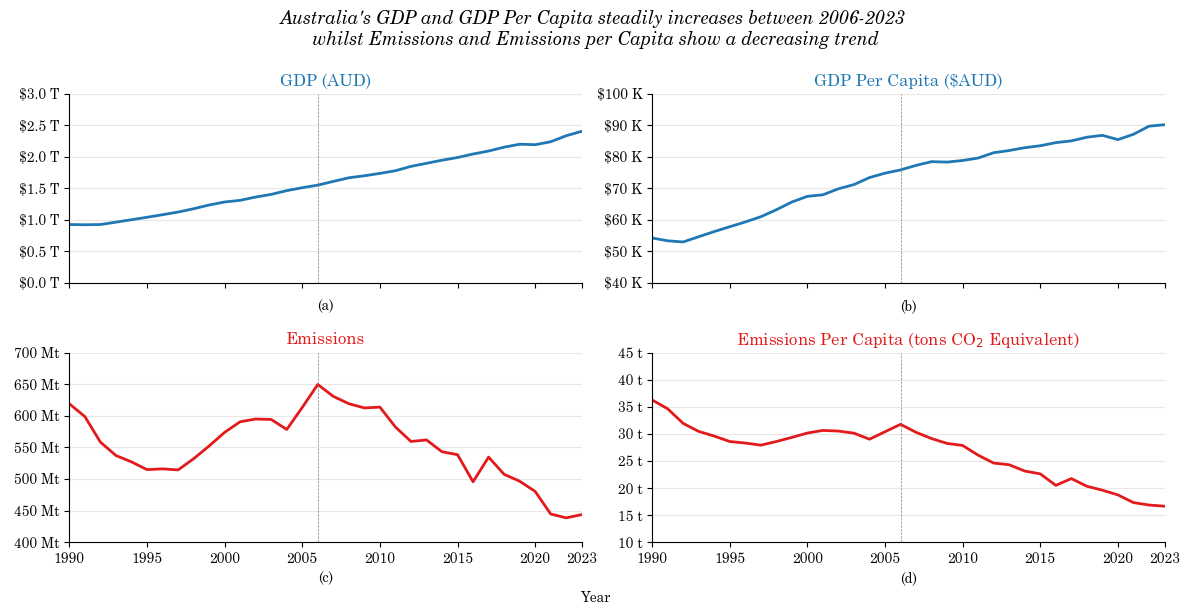

In [145]:
# Create figure
fig, ((ax1, ax3),(ax2,ax4)) = plt.subplots(2,2,figsize = (12,6), sharex = True) 

# Plot
ax1.plot(econ_df["GDP"]/1_000_000,
       label = "GDP", 
       color = "#1f78b4",
       lw = 2)

ax2.plot(econ_df["Total Emissions"],
         label = "CO2 Emissions", 
         color = "#e31a1c",
         lw = 2
        )

# Maximum emissions line
ax1.axvline(2006, c = "grey", ls = "--", lw = 0.5)
ax2.axvline(2006, c = "grey", ls = "--", lw = 0.5)

# Format
plt.suptitle("Australia's GDP and GDP Per Capita steadily increases between 2006-2023 \nwhilst Emissions and Emissions per Capita show a decreasing trend",  y =0.99,  fontsize = 13, fontstyle = "italic")

ax1.set_title("GDP (AUD)", color = "#1f78b4")
ax1.set_xlim(1990,2023)
ax1.set_ylim(0,3)
ax1.yaxis.set_major_formatter("${x} T")
ax1.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
# ax1.grid(axis = "x",alpha = 0.3)
ax1.grid(axis = "y",alpha = 0.3)
ax1.spines[["top", "right"]].set_visible(False)


ax2.set_title("Emissions" ,color = "#e31a1c")

ax2.set_xlim(1990,2023)
ax2.set_ylim(400,700)
ax2.yaxis.set_major_formatter("{x: 1.0f} Mt")
ax2.set_xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
# ax2.grid(axis = "x",alpha = 0.3)
ax2.grid(axis = "y",alpha = 0.3)
ax2.spines[["top", "right"]].set_visible(False)



# Plot
ax3.plot(econ_df["GDP Per Capita"]/1000,
       label = "GDP Per Capita", 
       color = "#1f78b4",
       lw = 2)

ax4.plot(econ_df["Emissions Per Capita"],
         label = "Emissions Per Capita", 
         color = "#e31a1c",
         lw = 2
        )

# Maximum emissions per capita line
ax3.axvline(2006, c = "grey", ls = "--", lw = 0.5)
ax4.axvline(2006, c = "grey", ls = "--", lw = 0.5)

# Format

ax3.set_title("GDP Per Capita ($AUD)", color = "#1f78b4")
ax3.set_xlim(1990,2023)
ax3.set_ylim(40,100)
ax3.grid(axis = "y",alpha = 0.3)
ax3.yaxis.set_major_formatter("${x:1.0f} K")
ax3.spines[["top", "right"]].set_visible(False)


ax4.set_title("Emissions Per Capita (tons CO$_2$ Equivalent)", color = "#e31a1c")


ax4.set_xlim(1990,2023)
ax4.set_ylim(10,45)
ax4.grid(axis = "y",alpha = 0.3)
ax4.set_yticks(np.arange(10,50,5))
ax4.yaxis.set_major_formatter("{x: 1.0f} t")
ax4.spines[["top", "right"]].set_visible(False)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center", va = "center")
ax3.text(0.5,-0.12,"(b)",transform=ax3.transAxes,ha = "center", va = "center")
ax2.text(0.5,-0.19,"(c)",transform=ax2.transAxes,ha = "center", va = "center")
ax4.text(0.5,-0.19,"(d)",transform=ax4.transAxes,ha = "center", va = "center")

fig.text(0.5,0.01, "Year", ha = "center", va = "center",fontsize = 10)
# fig.text(0.5,-0.03,"Figure 12: Relationship between Australia's economic growth and greenhouse gas emissions 1990-2023",
#          fontsize = 11,  
#          fontstyle = "italic",
#          ha = "center",
#          va = "center")
plt.tight_layout()

plt.savefig("imgs/economic_emissions.png",bbox_inches = "tight")

### Summary Chart: % Change bar chart

In [147]:
summary_df = econ_df.loc[[1990,2023], ["GDP", "Total Emissions", "GDP Per Capita", "Emissions Per Capita"]].T

summary_df["% Change (1990-2023)"] = (100*(summary_df[2023]-summary_df[1990])/summary_df[1990]).round(1)

summary_df= summary_df.round(2)
summary_df

Year,1990,2023,% Change (1990-2023)
GDP,925958.00,2403614.00,159.6
Total Emissions,619.18,443.57,-28.4
GDP Per Capita,54260.24,90161.62,66.2
Emissions Per Capita,36.28,16.64,-54.1


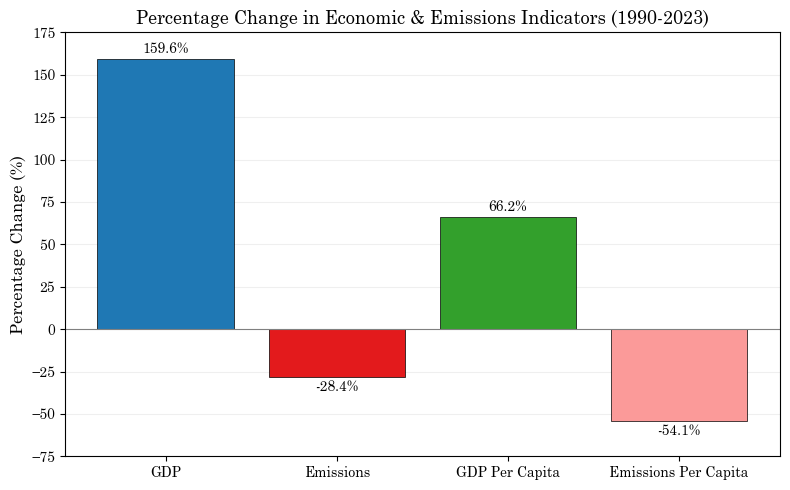

In [148]:
# Create figure
fig, ax = plt.subplots(figsize = (8,5))

# Plot chart
bar_chart = ax.bar(summary_df.index,summary_df["% Change (1990-2023)"],
                   label = ["GDP", "Emissions", "GDP Per Capita", "Emissions Per Capita"],
                   color = ["#1f78b4", "#e31a1c", "#33a02c", "#fb9a99"],
                   edgecolor = "black",
                   linewidth = .5
                  )

# Format the chart
ax.axhline(0, color = "grey", lw = 0.8)

ax.set_title("Percentage Change in Economic & Emissions Indicators (1990-2023)", fontsize = 13)
ax.set_ylabel("Percentage Change (%)", fontsize = 12)

ax.bar_label(bar_chart, fmt = lambda x: f"{x}%", label_type = "edge", padding =2)
ax.set_ylim(-75, 175)
plt.xticks(ax.get_xticks(), labels = ["GDP", "Emissions", "GDP Per Capita", "Emissions Per Capita"])
ax.yaxis.set_major_locator(mticker.MultipleLocator(25))
ax.grid(which = "major", axis = "y", alpha = 0.2)

ax.set_axisbelow(True)

plt.tight_layout()

plt.savefig("imgs/economics_summary.png", bbox_inches = "tight")

### Chain Volume GDP vs Total Emissions Scatter Plot

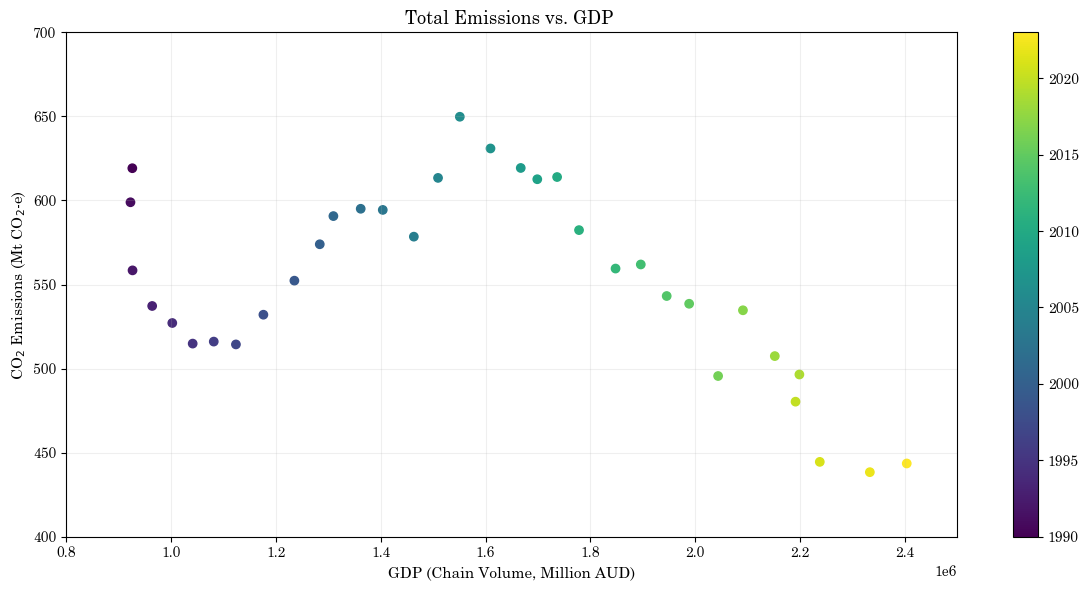

In [150]:
# Create the Figure
fig, ax = plt.subplots(figsize = (12,6)) 

# Plot
fig = ax.scatter(x = econ_df["GDP"],
           y = econ_df["Total Emissions"],
           c = econ_df.index,
           cmap = "viridis",
          )

# Format the chart
ax.set_title("Total Emissions vs. GDP ", fontsize = 13)
ax.set_xlabel("GDP (Chain Volume, Million AUD)", fontsize = 11)
ax.set_ylabel("CO$_2$ Emissions (Mt CO$_2$-e)", fontsize = 11)

ax.set_xlim(8*10e4,2.5*10e5)
ax.set_ylim(400, 700)

ax.grid(alpha = 0.2)

cbar = plt.colorbar(fig)

plt.tight_layout()

plt.savefig("imgs/appendix_emissions_vs_gdp.png", bbox_inches = "tight")

### GDP Chain Volume & Emissions Indexed to 1990

In [152]:
econ_df.head()

,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita
Year,,,,,
1990,17065128,925958,619.18,54260.243463,36.283349
1991,17284036,922422,598.93,53368.437788,34.652207
1992,17478635,926367,558.42,52999.962526,31.948719
1993,17634808,963840,537.24,54655.542606,30.464749
1994,17805468,1002198,527.12,56285.967884,29.604389


In [153]:
# Filter DataFrame to find values for GDP and CO2 Emissions in  1990
gdp_1990 = econ_df.loc[1990,"GDP"]

emissions_1990 = econ_df.loc[1990,"Total Emissions"]

# Create new columns
econ_df["GDP Indexed (1990 = 100)"] = (econ_df["GDP"]/gdp_1990)*100
econ_df["Emissions Indexed (1990 = 100)"] = (econ_df["Total Emissions"]/emissions_1990)*100

econ_df.head()

,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita,GDP Indexed (1990 = 100),Emissions Indexed (1990 = 100)
Year,,,,,,,
1990,17065128,925958,619.18,54260.243463,36.283349,100.000000,100.000000
1991,17284036,922422,598.93,53368.437788,34.652207,99.618125,96.729546
1992,17478635,926367,558.42,52999.962526,31.948719,100.044170,90.187022
1993,17634808,963840,537.24,54655.542606,30.464749,104.091114,86.766368
1994,17805468,1002198,527.12,56285.967884,29.604389,108.233635,85.131949


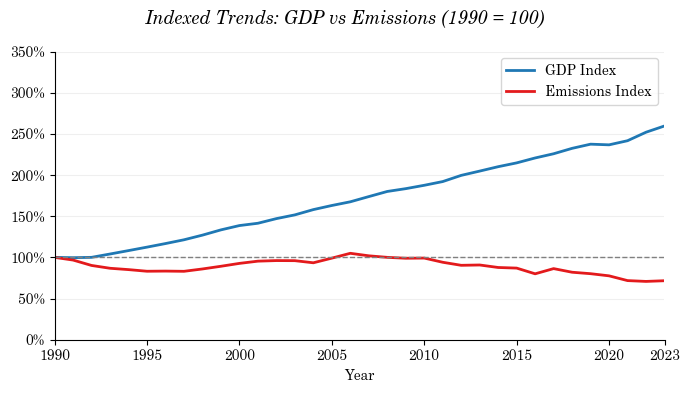

In [154]:
# Create figure
fig, ax = plt.subplots(figsize = (7,4))

# Plot charts
ax.plot(econ_df.index,
        econ_df["GDP Indexed (1990 = 100)"],
        label = "GDP Index", 
        color =  "#1f78b4",
        lw = 2
       )
ax.plot(econ_df.index,
        econ_df["Emissions Indexed (1990 = 100)"],
        label = "Emissions Index",
        color = "#e31a1c",
        lw = 2
       )
# Horizontal line at 100 marker
ax.axhline(100, color = "grey", ls = "--", lw = 1 )

#Format

# Format the chart
plt.suptitle("Indexed Trends: GDP vs Emissions (1990 = 100)", fontsize = 13, fontstyle = "italic", y = 0.97)
ax.set_xlabel("Year", fontsize = 10)
# ax.set_ylabel("Index", fontsize = 13)

ax.legend()

ax.set_xlim(1990,2023)
ax.set_ylim(0,350)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])

ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax =100))

ax.grid(axis = "y", alpha = 0.2)

ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()


### Emissions Intensity Chart (Emissions per unit GDP)

In [156]:
# Calculate emissions intensity and create new column

econ_df["Emission Intensity"] = 1000 * econ_df["Total Emissions"] /econ_df["GDP"]

econ_df.head()

,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita,GDP Indexed (1990 = 100),Emissions Indexed (1990 = 100),Emission Intensity
Year,,,,,,,,
1990,17065128,925958,619.18,54260.243463,36.283349,100.000000,100.000000,0.668691
1991,17284036,922422,598.93,53368.437788,34.652207,99.618125,96.729546,0.649302
1992,17478635,926367,558.42,52999.962526,31.948719,100.044170,90.187022,0.602806
1993,17634808,963840,537.24,54655.542606,30.464749,104.091114,86.766368,0.557395
1994,17805468,1002198,527.12,56285.967884,29.604389,108.233635,85.131949,0.525964


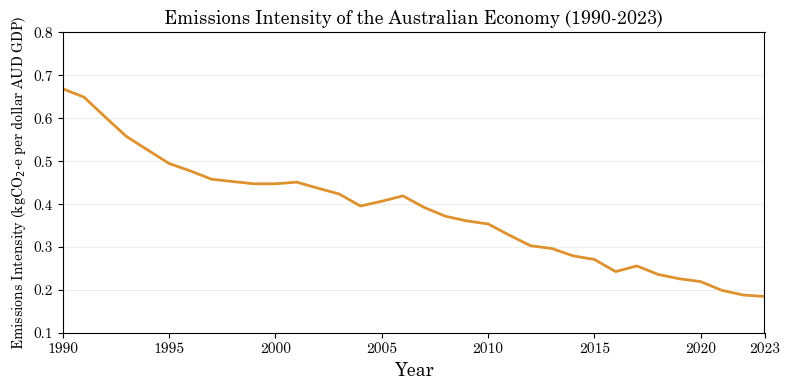

In [157]:
# Create figure
fig,ax = plt.subplots(figsize = (8,4))

# Plot
ax.plot(econ_df.index,
        econ_df["Emission Intensity"], 
        color = "#DF912E",
        lw = 2
       )

#Format

ax.set_title("Emissions Intensity of the Australian Economy (1990-2023)", fontsize = 13)
ax.set_xlabel("Year", fontsize = 13)
ax.set_ylabel("Emissions Intensity (kgCO$_2$-e per dollar AUD GDP)", fontsize = 10)


ax.set_xlim(1990,2023)
ax.set_ylim(0.1,.8)
plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])
ax.grid(axis = "y", alpha = 0.2)

plt.tight_layout()


### Indexed Trends and Emissions Intensity Chart (Emissions per unit GDP) Report Figure

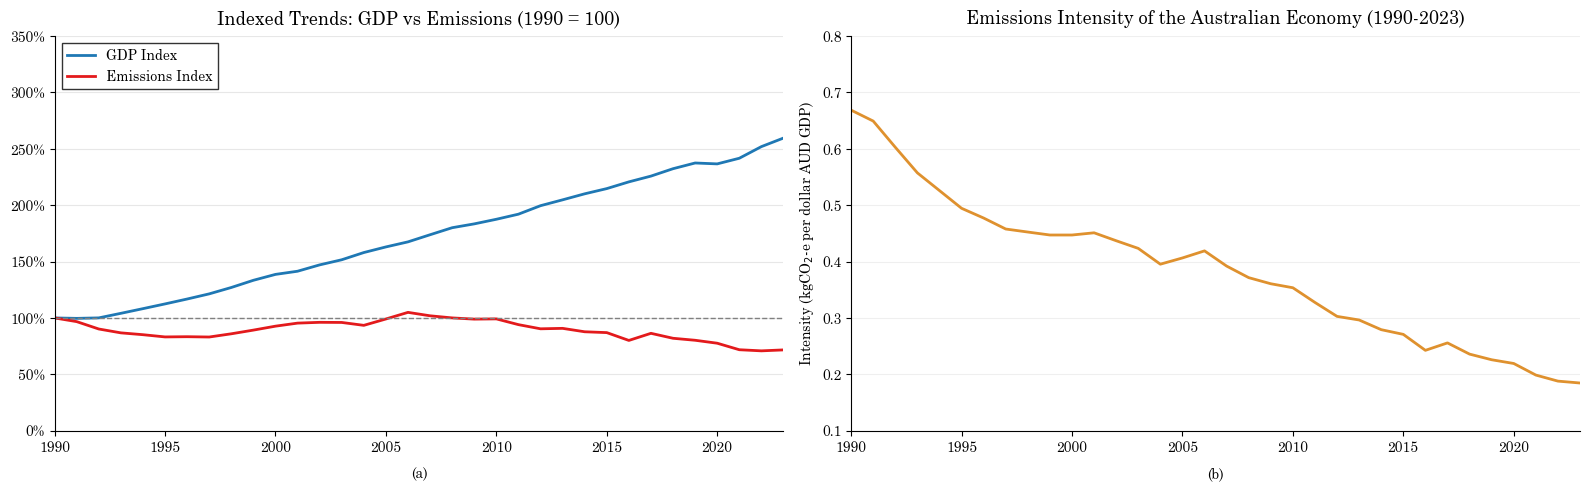

In [159]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (16,5))
# Plot charts
ax1.plot(econ_df.index,
        econ_df["GDP Indexed (1990 = 100)"],
        label = "GDP Index", 
        color =  "#1f78b4",
        lw = 2
       )
ax1.plot(econ_df.index,
        econ_df["Emissions Indexed (1990 = 100)"],
        label = "Emissions Index",
        color = "#e31a1c",
        lw = 2
       )
# Horizontal line at 100 marker
ax1.axhline(100, color = "grey", ls = "--", lw = 1 )

#Format

# Format the chart
ax1.set_title("Indexed Trends: GDP vs Emissions (1990 = 100)", fontsize = 13, y = 1.01,
              # fontstyle = "italic"
             )

# ax.set_ylabel("Index", fontsize = 13)

ax1.legend(loc = "upper left", fancybox = False, edgecolor = "black")

ax1.set_xlim(1990,2023)
ax1.set_ylim(0,350)
# plt.xticks([1990., 1995., 2000., 2005., 2010., 2015., 2020., 2023.])

ax1.yaxis.set_major_formatter(mticker.PercentFormatter(xmax =100))
# ax.yaxis.set_major_locator(mticker.MultipleLocator(50))

ax1.grid(axis = "y", alpha = 0.3)

ax1.spines[["top", "right"]].set_visible(False)


#Plot
ax2.plot(econ_df.index,
        econ_df["Emission Intensity"], 
        color = "#DF912E",
        lw = 2
       )
#B14224
#C37428

#Format

ax2.set_title("Emissions Intensity of the Australian Economy (1990-2023)", fontsize = 13, y = 1.01,
              # fontstyle = "italic"
             )

ax2.set_ylabel("Intensity (kgCO$_2$-e per dollar AUD GDP)", fontsize = 10)


ax2.set_xlim(1990,2023)
ax2.set_ylim(0.1,.8)
ax2.grid(axis = "y", alpha = 0.2)
ax2.spines[["top", "right"]].set_visible(False)

ax1.text(0.5,-0.12,"(a)",transform=ax1.transAxes,ha = "center")
ax2.text(0.5,-0.12,"(b)",transform=ax2.transAxes,ha = "center")

# fig.text(0.5,-0.02,"Figure 14: Indexed GDP vs emissions and emissions intensity 1990-2023 ",
#          fontsize = 11,  
#          fontstyle = "italic",
#          ha = "center",
#          va = "center")


plt.tight_layout()

plt.savefig("imgs/index_emissions_intensity.png",bbox_inches = "tight")

### Economics Analysis

#### Australian Population (1990-2023)

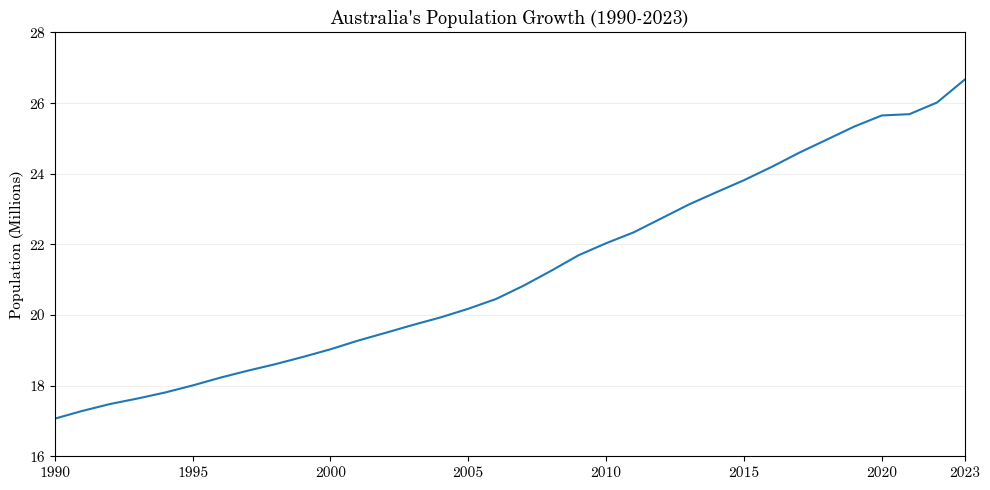

In [162]:
# Create figure
fig,ax = plt.subplots(figsize = (10,5))

#Plot
ax.plot(econ_df.index,
        econ_df["Population"]/1_000_000, 
       )
ax.set_title("Australia's Population Growth (1990-2023)", fontsize = 13)
ax.set_ylabel("Population (Millions)",fontsize = 11)

ax.set_xlim(1990,2023)
ax.set_ylim(16, 28)
plt.xticks([1990,1995,2000,2005,2010,2015,2020,2023])
ax.grid(axis ="y", alpha = 0.2)

plt.tight_layout()

plt.savefig("imgs/appendix_population_growth.png", bbox_inches = "tight")

#### Economic indicators

In [164]:
print("1990 Stats:")
display(econ_df.loc[[1990]])
print("2023 Stats:")
display(econ_df.loc[[2023]])

1990 Stats:


,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita,GDP Indexed (1990 = 100),Emissions Indexed (1990 = 100),Emission Intensity
Year,,,,,,,,
1990,17065128,925958,619.18,54260.243463,36.283349,100.0,100.0,0.668691


2023 Stats:


,Population,GDP,Total Emissions,GDP Per Capita,Emissions Per Capita,GDP Indexed (1990 = 100),Emissions Indexed (1990 = 100),Emission Intensity
Year,,,,,,,,
2023,26658948,2403614,443.57,90161.622282,16.638691,259.58132,71.638296,0.184543


In [165]:
# Calculate emissions intensity percentage change between 1990 and 2023
emissions_intensity_1990_2023 = 100* (econ_df.loc[1990, "Emission Intensity"] - econ_df.loc[2023, "Emission Intensity"])/econ_df.loc[1990, "Emission Intensity"]

emissions_intensity_1990_2023.round(1)

72.4

## Net Zero Alignment

Based on current trends, is Australia on track to meet its 2050 net zero target?


[According to Australia's Nationally Determined Contribution 2022](https://unfccc.int/sites/default/files/NDC/2022-06/Australias%20NDC%20June%202022%20Update%20%283%29.pdf): <br>

- Table 1.1.2
    - The emissions budget for the 2021 to 2030 period corresponds to a value of 4381 million tonnes CO$_2$-e
<br>
- Table 1.4.7
    - The emissions budget for the 2030 target was calculated using a straight-line trajectory which takes a linear decrease from 2020 to 2030.
    -  This trajectory begins from Australia’s 2020 target (5% below 2000 levels), and finishes at 43% below 2005 levels in 2030.
    -  The area under the trajectory for the period 2021–2030 is the emissions budget for the 2030 target.


In [168]:
# Create emissions_df dataframe

emissions_df = emissions[["Total Emissions"]]
emissions_df.head()

,Total Emissions
Year,
1990,619.18
1991,598.93
1992,558.42
1993,537.24
1994,527.12


### Calculating Target Pathway 

In [170]:
# Emissions budget for the 2021 to 2030 period = 4381 million tonnes co2eq
total_2021_2030_budget = 4381

# Filter to obtain emission values for 2000, 2005 and 2023
emissions_2000 = emissions_df.loc[2000].values[0]
emissions_2005 = emissions_df.loc[2005].values[0]
emissions_2023 = emissions_df.loc[2023].values[0]

# Calculate Target values

# 2020 target = 5% below 2000 levels
# 2030 target = 43% below 2005 levels
# 2050 target = net zero

target_2020 = emissions_2000*(1-0.05)
target_2030 = emissions_2005*(1-0.43)
target_2050 = 0

# Calculate the 2021 to 2030 emissions budget pathway
budget_years = np.arange(2020,2031)
budget = np.linspace(target_2020, target_2030, len(budget_years))

# Calculate 2030 emissions target pathway
years_pre_2030 = np.arange(2023, 2031)
target_path_to_2030 = np.linspace(emissions_2023, target_2030, len(years_pre_2030))

# Calculate 2050 emissions target pathway
years_post_2030 = np.arange(2030, 2051)
target_path_to_2050 = np.linspace(target_2030, target_2050, len(years_post_2030))

# Join 2030 and 2050 pathways into one df
# Account for duplicate 2030 value
target_years = np.concatenate([years_pre_2030[:-1], years_post_2030])
target_path = np.concatenate([target_path_to_2030[:-1],target_path_to_2050])




## Create and Business as usual (BAU) linear regression forecast

In [172]:
# Calculate Business as usual emissions forecast using linear regression

# Filter for more recent years

emissions_df_2010 = emissions_df.query("Year >= 2010")

X = emissions_df_2010.index.values.reshape(-1,1)
y = emissions_df_2010["Total Emissions"]

bau_model = LinearRegression().fit(X,y)

forecast_years = np.arange(2023, 2061).reshape(-1,1)
forecast_bau = bau_model.predict(forecast_years)

### Predict when Australia will achieve Net Zero

In [174]:
# Calculate when Australia willl reach net zero
gradient = bau_model.coef_[0]
y_intercept = bau_model.intercept_
net_zero_year  = - y_intercept/gradient

print(f"Australia will achieve net zero by: {net_zero_year.round()}")

Australia will achieve net zero by: 2058.0


### Budget Analysis

In [176]:
# Create a Target vs Projected Emissions dataframe

emissions_analysis = pd.DataFrame(data = target_path[1:], index = target_years[1:], columns = ["Target Emissions"])

# Add the Projected Column

emissions_analysis["Projected Emissions"] = forecast_bau[1:28]
emissions_analysis.index.rename("Year", inplace = True)

emissions_analysis.head()

,Target Emissions,Projected Emissions
Year,,
2024,430.152771,423.351758
2025,416.735543,410.841516
2026,403.318314,398.331275
2027,389.901086,385.821033
2028,376.483857,373.310791


#### 2021-2030

In [178]:
# 2021 to 2030 Budget Analysis

budget_used_2021_2030 = emissions_df.query("Year >= 2021").sum().values[0]
perc_budget_used_2021_2030 = 100*(budget_used_2021_2030/total_2021_2030_budget)

remaining_2021_2030_budget = total_2021_2030_budget-budget_used_2021_2030
remaining_2021_2030_budget_perc = 100*(remaining_2021_2030_budget/total_2021_2030_budget)

print(f"Budget used between 2021 to 2030: {budget_used_2021_2030} million tonnes CO2eq")
print(f"Budget used between 2021 to 2023: {perc_budget_used_2021_2030.round(1)}%")
print(f"Remaining 2021 to 2030 emissions budget: {remaining_2021_2030_budget} million tonnes CO2eq")
print(f"Remaining 2021 to 2030 emissions budget percent: {remaining_2021_2030_budget_perc.round(1)}%")


Budget used between 2021 to 2030: 1326.49 million tonnes CO2eq
Budget used between 2021 to 2023: 30.3%
Remaining 2021 to 2030 emissions budget: 3054.51 million tonnes CO2eq
Remaining 2021 to 2030 emissions budget percent: 69.7%


In [179]:
forecast_2024_2030 = emissions_analysis.loc[2024:2030,"Projected Emissions"].sum()
forecast_2021_2030_budget_remaining = total_2021_2030_budget - (budget_used_2021_2030 + forecast_2024_2030)
forecast_2021_2030_budget_remaining_perc = 100*(forecast_2021_2030_budget_remaining/total_2021_2030_budget)


print(f"The projected total emissions betweeen 2024 to 2030: {forecast_2024_2030.round(2)}")
print(f"2021 to 2030 Budget remaining based on forecast: {forecast_2021_2030_budget_remaining.round(2)}")
print(f"2021 to 2030 Budget percent remaining based on forecast: {forecast_2021_2030_budget_remaining_perc.round(1)}")

# emissions_df.loc[2021:2023,"Total Emissions"].sum() + emissions_analysis.loc[2024:2030,"Projected Emissions"].sum()

The projected total emissions betweeen 2024 to 2030: 2700.75
2021 to 2030 Budget remaining based on forecast: 353.76
2021 to 2030 Budget percent remaining based on forecast: 8.1


## Net Zero Alignment Report Figure

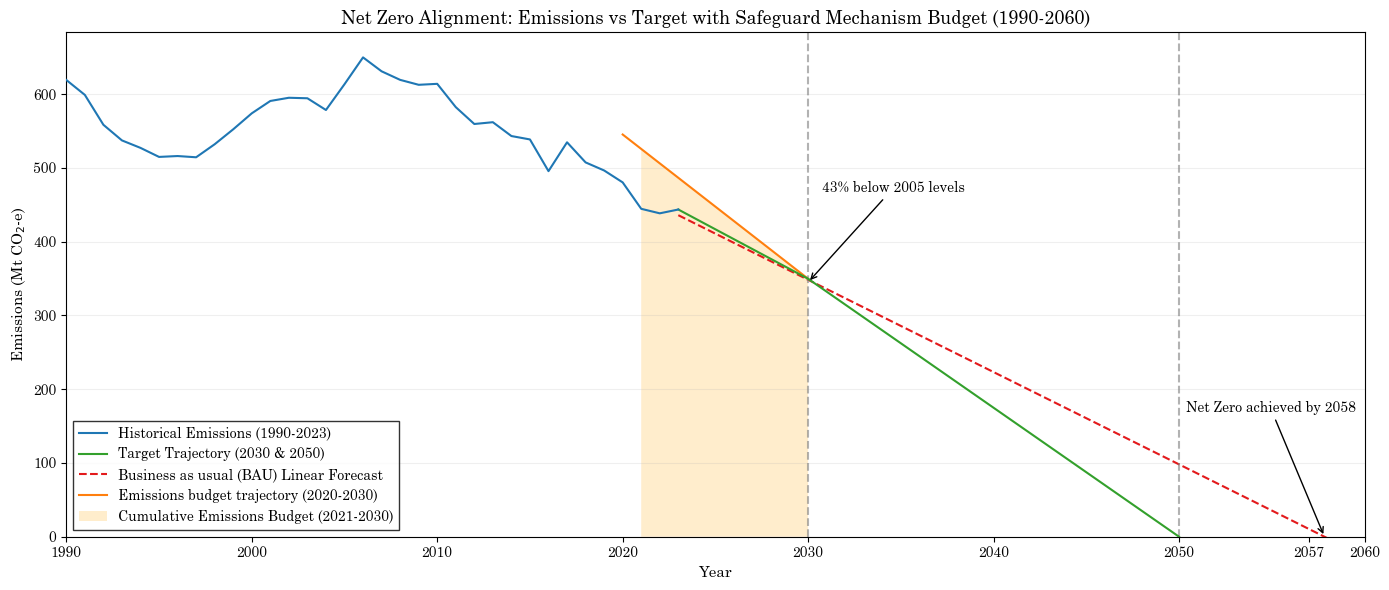

In [181]:
# Plot
fig, ax = plt.subplots(figsize = (14, 6))

# Plotting Historial Emissions
ax.plot(emissions_df.index, emissions_df["Total Emissions"], label = "Historical Emissions (1990-2023)", zorder =4)

# Plot Target Emissions
ax.plot(target_years, target_path, label = "Target Trajectory (2030 & 2050)", color = "#33a02c", zorder =3 )

# Plot Staus Quo Forecast
ax.plot(forecast_years, forecast_bau, label= "Business as usual (BAU) Linear Forecast", color = "#e31a1c", ls = "--", zorder = 2)

# Plot Emissions Budget line start
ax.plot(budget_years, budget,label = "Emissions budget trajectory (2020-2030)")

# Plot Emissions budget
ax.fill_between(x = budget_years[1:], y1 = budget[1:], label = "Cumulative Emissions Budget (2021-2030)", alpha = 0.2, color = "orange", ec = "None", zorder = 0)



# Annotations
ax.axvline(2030, ls = "--", color = "grey", alpha = 0.6)
ax.axvline(2050, ls = "--", color = "grey", alpha = 0.6)

# Format
ax.set_title("Net Zero Alignment: Emissions vs Target with Safeguard Mechanism Budget (1990-2060)", fontsize = 13)
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Emissions (Mt CO$_2$-e)", fontsize = 11)
ax.set_xlim(1990,2060)
ax.set_ylim(0)

ax.legend(frameon = True, fancybox = False, edgecolor = "black")

ax.grid(axis = "y", alpha = 0.2)

ax.annotate("43% below 2005 levels", 
            xy = (2030, 345), xytext = (10, 65),
textcoords = "offset points", arrowprops = dict(arrowstyle = "->"), fontsize = 10,
           )

ax.annotate("Net Zero achieved by 2058", 
            xy = (net_zero_year, 0), xytext = (-100, 90),textcoords = "offset points", arrowprops = dict(arrowstyle = "->"), fontsize = 10,

           )

plt.xticks([1990.,2000,2010,2020,2030,2040,2050,2057,2060])


plt.tight_layout()

plt.savefig("imgs/net_zero_alignment.png",bbox_inches = "tight")

### Emissions Forecast vs Target Trajectory

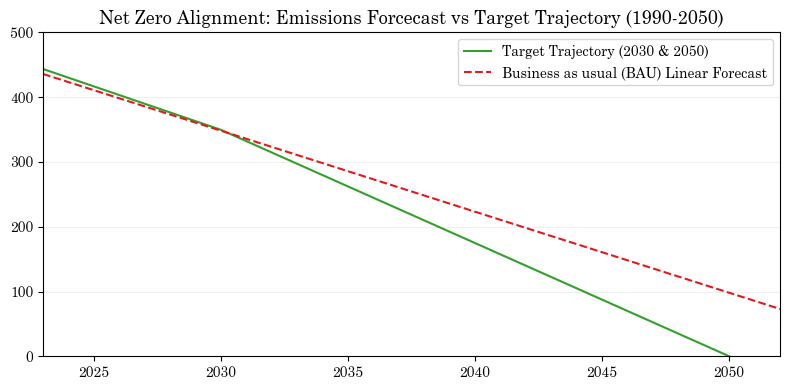

In [183]:
fig, ax = plt.subplots(figsize = (8,4))

# Plot Target Emissions
ax.plot(target_years, target_path, label = "Target Trajectory (2030 & 2050)", color = "#33a02c")

# Plot Staus Quo Forecast
ax.plot(forecast_years, forecast_bau, label= "Business as usual (BAU) Linear Forecast", color = "#e31a1c", ls = "--")

# Format
ax.set_title("Net Zero Alignment: Emissions Forcecast vs Target Trajectory (1990-2050)", fontsize = 13)

ax.set_xlim(2023, 2052)
ax.set_ylim(0, 500)

ax.grid(axis = "y",alpha = 0.2)
ax.legend()

plt.tight_layout()

### Net Zero Pathway and BAU Forecast cumulative emissions vs remaining Global Fair Share Budget

[According to the Climate Change Authority, Australia's 2013 to 2050 emissions budget is approximately 10.1 Gt](https://www.climatechangeauthority.gov.au/sites/default/files/Targets%20and%20Progress%20Review%20Final%20Report_Chapter%208.pdf)

In [186]:
# Create cumulated_emissions DataFrame

cumulated_emissions = emissions_analysis.cumsum()

cumulated_emissions

,Target Emissions,Projected Emissions
Year,,
2024,430.152771,423.351758
2025,846.888314,834.193275
2026,1250.206629,1232.524549
2027,1640.107714,1618.345582
2028,2016.591571,1991.656374
2029,2379.658200,2352.456923
2030,2729.307600,2700.747231
2031,3061.474530,3036.527297
2032,3376.158990,3359.797121


In [187]:
emissions_budget_2013_2050 = 10.1* 1e3

total_emissions_2013_2023 = emissions_df.query("Year >= 2013 & Year <=2023").sum().values[0]
total_emissions_2013_2023_perc = 100*(total_emissions_2013_2023/emissions_budget_2013_2050)

remaining_budget = emissions_budget_2013_2050 - total_emissions_2013_2023
remaining_budget_perc = 100*(remaining_budget/emissions_budget_2013_2050)

print(f"Total emissions between 2013 to 2023: {total_emissions_2013_2023} MtCO2eq")
print(f"Percentage emissions budget used between 2013 to 2023: {total_emissions_2013_2023_perc.round(1)}% ")
print(f"Remaining budget for 2024 to 2050 period: {remaining_budget} MtCO2eq")
print(f"Remaining budget percentage: {remaining_budget_perc.round(1)}%")

Total emissions between 2013 to 2023: 5484.69 MtCO2eq
Percentage emissions budget used between 2013 to 2023: 54.3% 
Remaining budget for 2024 to 2050 period: 4615.31 MtCO2eq
Remaining budget percentage: 45.7%


In [188]:
# Calculate budget overshoot
round((cumulated_emissions.loc[2050]-remaining_budget),2)

Target Emissions       1435.67
Projected Emissions    2424.09
Name: 2050, dtype: float64

In [189]:
# Calculate budget overshoot percentage
100*(cumulated_emissions.loc[2050]-remaining_budget)/emissions_budget_2013_2050

Target Emissions       14.214524
Projected Emissions    24.000917
Name: 2050, dtype: float64

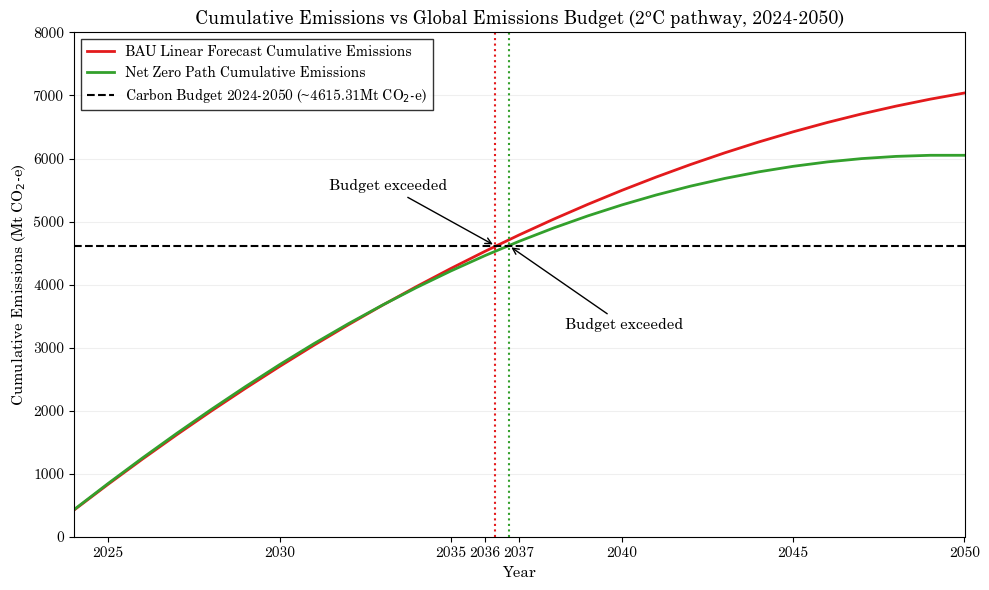

In [190]:

# Create figure
fig, ax = plt.subplots(figsize = (10,6))

# Plot graph
ax.plot(cumulated_emissions.index,
        cumulated_emissions["Projected Emissions"],
        label = "BAU Linear Forecast Cumulative Emissions", 
        c = "#e31a1c", 
        lw = 2
       )

ax.plot(cumulated_emissions.index,
        cumulated_emissions["Target Emissions"], 
        label = "Net Zero Path Cumulative Emissions",
        c = "#33a02c", 
        lw = 2
       )
# Budget line
ax.axhline(remaining_budget,label = f"Carbon Budget 2024-2050 (~{remaining_budget}Mt CO$_2$-e)", 
           c = "black", ls = "--" )

ax.axvline(2036.3, c = "#e31a1c", ls = ":")
ax.axvline(2036.7, c = "#33a02c", ls = ":")


ax.annotate(f"Budget exceeded", 
            xy = (2036.3, remaining_budget), xytext = (-120, 40),
textcoords = "offset points", arrowprops = dict(arrowstyle = "->"), fontsize = 11,
)

ax.annotate(f"Budget exceeded", 
            xy = (2036.7, remaining_budget), xytext = (40, -60),
textcoords = "offset points", arrowprops = dict(arrowstyle = "->"), fontsize = 11,

)

# Format

ax.set_title("Cumulative Emissions vs Global Emissions Budget (2\u00b0C pathway, 2024-2050)", fontsize = 13)
ax.set_xlabel("Year", fontsize = 11)
ax.set_ylabel("Cumulative Emissions (Mt CO$_2$-e)", fontsize = 11)
ax.legend(loc = "upper left",frameon = True, fancybox = False, edgecolor = "black")

ax.set_xlim(2024,2050)
ax.set_ylim(0,8000)

plt.xticks([2025,2030,2035,2036,2037,2040,2045,2050])
plt.grid(axis = "y",alpha = 0.2)

plt.tight_layout()

plt.savefig("imgs/cumulative_budget.png",bbox_inches = "tight")

## References

- ABC News. (2007, December 3). *Rudd signs Kyoto ratification document*. https://www.abc.net.au/news/2007-12-03/rudd-signs-kyoto-ratification-document/976234
- ABC News. (2014, July 10). *Carbon tax: A timeline of its tortuous history in Australia*. https://www.abc.net.au/news/2014-07-10/carbon-tax-timeline/5569118
- Clean Energy Finance Corporation. (Miller, M., 2018). *Climate finance and financial markets in Australia: The CEFC and ARENA*. 
https://www.cefc.com.au/media/402005/mmiller_alj_v92_pt10.pdf
- Clean Energy Regulator. (2025, August 1). *Safeguard Mechanism*. https://cer.gov.au/schemes/safeguard-mechanism
- Clean Energy Regulator. (2025, June 30). *Small-scale Renewable Energy Scheme*. https://cer.gov.au/schemes/renewable-energy-target/small-scale-renewable-energy-scheme
- Climate Change Authority. (2014). *Targets and Progress Review: Final Report* - Chapter 8 (Australia’s emissions budget to 2050). https://www.climatechangeauthority.gov.au/sites/default/files/Targets%20and%20Progress%20Review%20Final%20Report_Chapter%208.pdf
- Climate Change Authority. (2017, December). *Review of the Emissions Reduction Fund*. https://www.climatechangeauthority.gov.au/sites/default/files/ERF%20Review%20Report.pdf
- Department of Climate Change, Energy, the Environment and Water (DCCEEW). (2024). *Australia’s Emissions Projections 2024* (chart data). https://www.dcceew.gov.au/climate-change/publications/australias-emissions-projections-2024
- Department of Climate Change, Energy, the Environment and Water (DCCEEW). (2024). *Australian Energy Update 2024* (Australian Energy Statistics; Table O FY; Table B). https://www.energy.gov.au/publications/australian-energy-update-2024  (License: CC BY 4.0)
- Department of Climate Change, Energy, the Environment and Water. (2025, October 7). *Rewiring the Nation*. 
https://www.dcceew.gov.au/energy/renewable/rewiring-the-nation
- Department of Climate Change, Energy, the Environment and Water. (2025, June 18). *Safeguard Mechanism*. 
https://www.dcceew.gov.au/climate-change/emissions-reporting/national-greenhouse-energy-reporting-scheme/safeguard-mechanism
- Department of Climate Change, Energy, the Environment and Water. (2025, September 24). *International climate action*. 
https://www.dcceew.gov.au/climate-change/international-climate-action
- Department of Climate Change, Energy, the Environment and Water. (2025, October 2). *Capacity Investment Scheme*. 
https://www.dcceew.gov.au/energy/renewable/capacity-investment-scheme
- Department of Climate Change, Energy, the Environment and Water. (2019). *Climate Solutions Package*. 
https://www.dcceew.gov.au/sites/default/files/documents/climate-solutions-package.pdf
- Department of Industry, Science, Energy and Resources. (2020). *Technology Investment Roadmap: First Low Emissions Technology Statement - 2020*. Department of Industry, Science, Energy and Resources. https://www.dcceew.gov.au/sites/default/files/documents/first-low-emissions-technology-statement-2020.pdf
- Energy.gov.au (Department of Climate Change, Energy, the Environment and Water). (2024, August 28). *Australian Energy Update 2024*. 
https://www.energy.gov.au/publications/australian-energy-update-2024
- Government of Australia. (2022). *Australia’s Nationally Determined Contribution - 2022 Update* (UNFCCC submission), esp. Tables 1.1.2 and 1.4.7. https://unfccc.int/sites/default/files/NDC/2022-06/Australias%20NDC%20June%202022%20Update%20%283%29.pdf
- International Energy Agency. (2022, February 18). *National Energy Productivity Plan*. https://www.iea.org/policies/1240-national-energy-productivity-plan
- Parliament of Australia. (2011). *Bills search results: Clean Energy Bill 2011*. https://www.aph.gov.au/Parliamentary_Business/Bills_Legislation/Bills_Search_Results/Result?bId=r4653
- Parliament of Australia. (2022). *Bills search results: Climate Change Bill 2022*. https://www.aph.gov.au/Parliamentary_Business/Bills_Legislation/Bills_Search_Results/Result?bId=r6885 
- Parliament of Australia, Senate Environment and Communications References Committee. (n.d.). *Australia’s greenhouse performance and strategy (Part a)*. https://www.aph.gov.au/Parliamentary_Business/Committees/Senate/Environment_and_Communications/Completed_inquiries/1999-02/gobalwarm/report/c04
- Parliament of Australia, Senate Environment and Communications References Committee. (n.d.). *Chapter 2 - Climate change and the Kyoto Protocol*. https://www.aph.gov.au/Parliamentary_Business/Committees/Senate/Environment_and_Communications/Completed_inquiries/2002-04/kyoto/report/c02
- Parliament of Australia, Senate Environment and Communications References Committee. (n.d.). *Chapter 2 - The Energy White Paper*
https://www.aph.gov.au/Parliamentary_Business/Committees/Senate/Environment_and_Communications/Completed_inquiries/2004-07/energywhitepaper/report/c02
- United Nations Treaty Collection. (1997, December 11). *Kyoto Protocol to the United Nations Framework Convention on Climate Change*. https://treaties.un.org/pages/viewdetails.aspx?src=treaty&mtdsg_no=XXVII-7-a&chapter=27&clang=_en


